# 1. Data Quality and Preparation

In [1]:
import numpy as np
import pandas as pd

#### 1.1 Validate & Clean Datasets

In [2]:
# Load all CSVs
customers = pd.read_csv("Datasets/customers.csv", low_memory=False)
loans = pd.read_csv("Datasets/loans.csv", low_memory=False)
applications = pd.read_csv("Datasets/applications.csv", low_memory=False)
transactions = pd.read_csv("Datasets/transactions.csv", low_memory=False)
defaults = pd.read_csv("Datasets/defaults.csv", low_memory=False)
branches = pd.read_csv("Datasets/branches.csv", low_memory=False)

datasets = { 
    "Customers": customers, 
    "Loans": loans, 
    "Applications": applications, 
    "Transactions": transactions, 
    "Defaults": defaults, 
    "Branches": branches 
}


#### 1.2 Check for missing values, duplicate entries, and inconsistent data.

In [3]:
for name, df in datasets.items():
    print(f"\n{name} missing values:\n", df.isnull().sum())
    print(f"{name} duplicates: {df.duplicated().sum()}")

    # Drop duplicates
    df.drop_duplicates(inplace=True)

    # Fill missing values
    for col in df.select_dtypes(include="number").columns:
        df[col].fillna(df[col].median(), inplace=True)
    for col in df.select_dtypes(include="object").columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
        


Customers missing values:
 Customer_ID                0
Full_Name                  0
Contact_Number             0
Email                      0
Address                    0
Age                        0
Gender                     0
Marital_Status             0
Employment_Status          0
Annual_Income              0
Credit_Score               0
Region                     0
Account_Tenure             0
Relationship_Manager_ID    0
dtype: int64
Customers duplicates: 0

Loans missing values:
 Loan_ID                     0
Customer_ID                 0
Loan_Amount                 0
Interest_Rate               0
Loan_Term                   0
Disbursal_Date              0
Repayment_Start_Date        0
Repayment_End_Date          0
Loan_Status                 0
Overdue_Amount              0
EMI_Amount                  0
Collateral_Details      30194
dtype: int64
Loans duplicates: 0

Applications missing values:
 Application_ID          0
Loan_ID             12600
Customer_ID             0
App

#### 1.3 Replace All Missing Values with Blank String

In [4]:
for name, df in datasets.items():
    # Replace all NaN values with empty string
    df.fillna("", inplace=True)
    print(f"\n{name} missing values after replacement:\n", df.isnull().sum())


Customers missing values after replacement:
 Customer_ID                0
Full_Name                  0
Contact_Number             0
Email                      0
Address                    0
Age                        0
Gender                     0
Marital_Status             0
Employment_Status          0
Annual_Income              0
Credit_Score               0
Region                     0
Account_Tenure             0
Relationship_Manager_ID    0
dtype: int64

Loans missing values after replacement:
 Loan_ID                 0
Customer_ID             0
Loan_Amount             0
Interest_Rate           0
Loan_Term               0
Disbursal_Date          0
Repayment_Start_Date    0
Repayment_End_Date      0
Loan_Status             0
Overdue_Amount          0
EMI_Amount              0
Collateral_Details      0
dtype: int64

Applications missing values after replacement:
 Application_ID      0
Loan_ID             0
Customer_ID         0
Application_Date    0
Approval_Date       0
Loan_Purp

#### 1.4 Standardize Date Formats and Remove Irrelevant Columns.

In [5]:
def standardize_dates(df):
    for col in df.columns:
        if "date" in col.lower():  # detect date-like columns
            df[col] = pd.to_datetime(df[col], errors="coerce")  # convert safely
    return df

# Apply to all datasets
customers    = standardize_dates(customers)
loans        = standardize_dates(loans)
applications = standardize_dates(applications)
transactions = standardize_dates(transactions)
defaults     = standardize_dates(defaults)
branches     = standardize_dates(branches)

# Define irrelevant columns for Customers
irrelevant_customer_cols = ["Full_Name", "Contact_Number", "Email", "Address"]

# Loop through each column and drop if it exists
for col in irrelevant_customer_cols:
    if col in customers.columns:
        customers.drop(columns=[col], inplace=True)

# Check remaining columns
print("Customers columns after cleanup:", customers.columns.tolist())


Customers columns after cleanup: ['Customer_ID', 'Age', 'Gender', 'Marital_Status', 'Employment_Status', 'Annual_Income', 'Credit_Score', 'Region', 'Account_Tenure', 'Relationship_Manager_ID']


#### 1.5 Handle Outliers in Numeric Columns like Loan_Amount, Interest_Rate, and Default_Amount.

In [6]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    # Cap values outside bounds
    df[col] = np.where(
                df[col] < lower, 
                lower,
                np.where(
                    df[col] > upper, 
                    upper, 
                    df[col]
                )
            )
    # df.describe()
    return df

# Apply to numeric columns
if "Loan_Amount" in loans.columns:
    loans = cap_outliers(loans, "Loan_Amount")

if "Interest_Rate" in loans.columns:
    loans = cap_outliers(loans, "Interest_Rate")

if "Default_Amount" in defaults.columns:
    defaults = cap_outliers(defaults, "Default_Amount")

print(loans[["Loan_Amount","Interest_Rate"]].describe())
print(defaults[["Default_Amount"]].describe())   


        Loan_Amount  Interest_Rate
count  9.000000e+04   90000.000000
mean   2.516259e+06      11.005393
std    1.429289e+06       2.307139
min    5.002600e+04       7.000000
25%    1.275705e+06       9.000000
50%    2.510076e+06      11.010000
75%    3.751702e+06      13.010000
max    4.999958e+06      15.000000
       Default_Amount
count     9000.000000
mean     52978.639667
std      27460.213066
min       5010.000000
25%      29486.500000
50%      53486.500000
75%      77012.000000
max      99997.000000


# 2. Descriptive Analysis
## Summarize and visualize key metrics:

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

#### 2.1 Distribution of Loan_Amount, EMI_Amount, and Credit_Score.

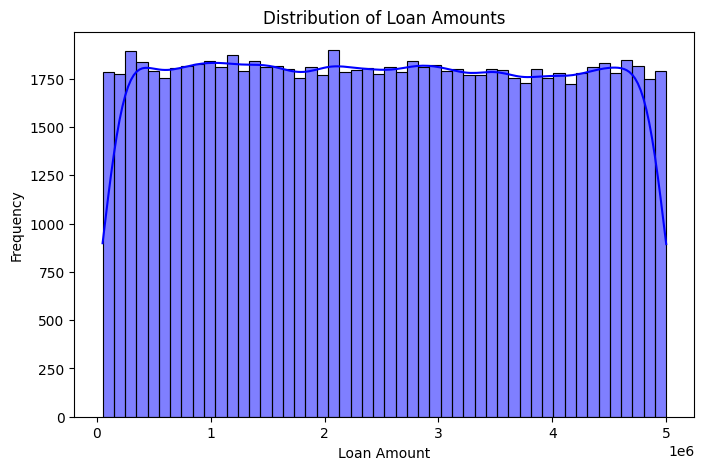

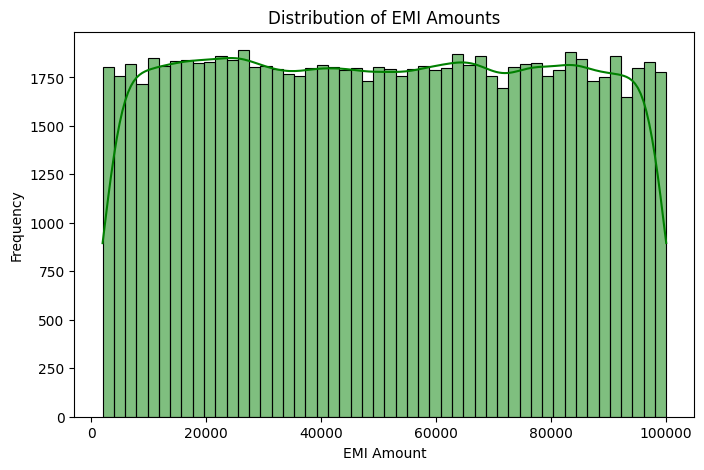

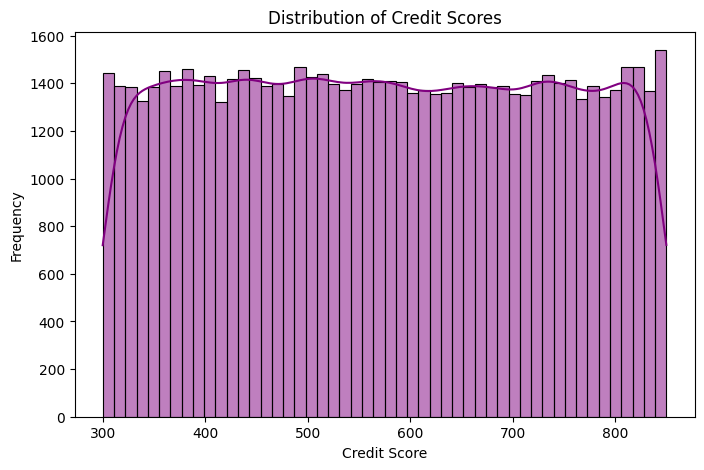

In [8]:
# Loan Amount Distribution
plt.figure(figsize=(8,5))
sns.histplot(loans["Loan_Amount"], bins=50, kde=True, color="blue")
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# EMI Amount Distribution
plt.figure(figsize=(8,5))
sns.histplot(loans["EMI_Amount"], bins=50, kde=True, color="green")
plt.title("Distribution of EMI Amounts")
plt.xlabel("EMI Amount")
plt.ylabel("Frequency")
plt.show()

# Credit Score Distribution
plt.figure(figsize=(8,5))
sns.histplot(customers["Credit_Score"], bins=50, kde=True, color="purple")
plt.title("Distribution of Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()


#### 2.2 Regional trends in loan disbursement and defaults.

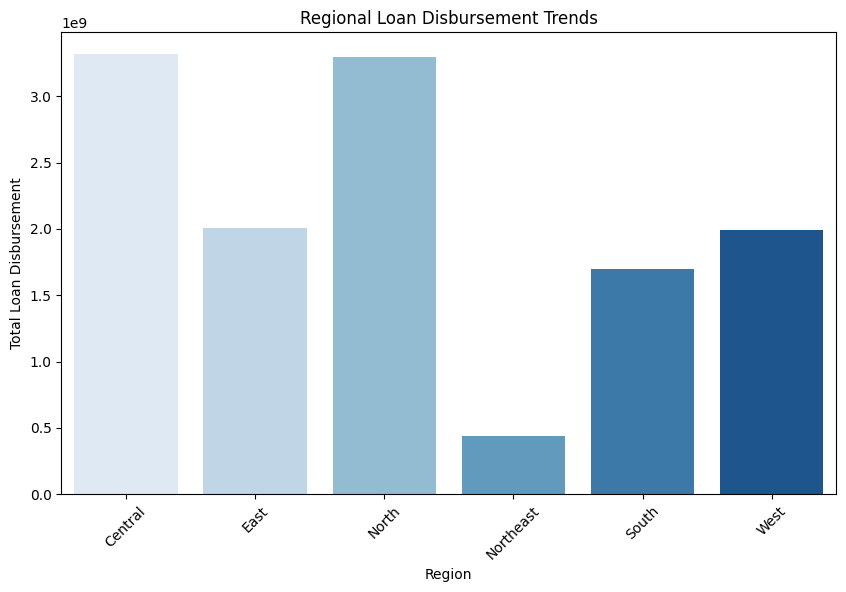

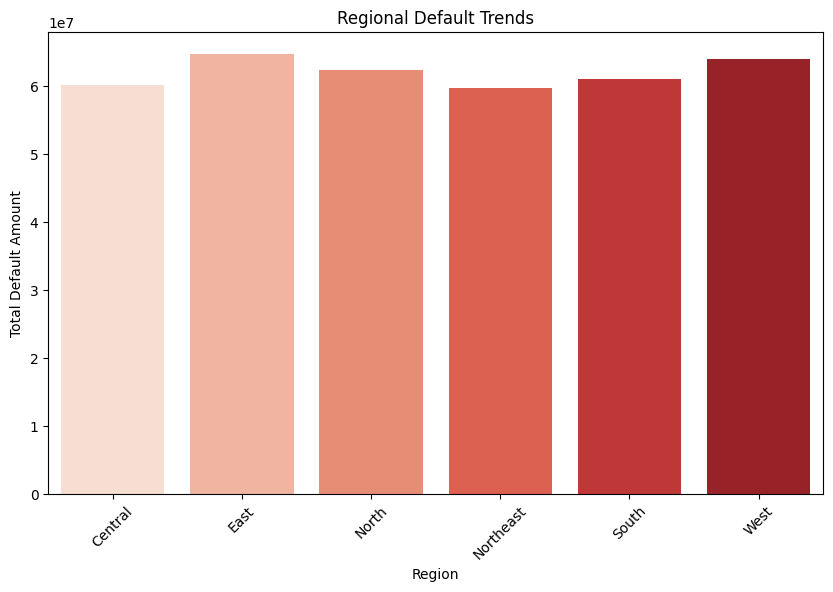

In [9]:
# Loan disbursement by region
regional_loans = branches.groupby("Region")["Loan_Disbursement_Amount"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="Region", y="Loan_Disbursement_Amount", data=regional_loans, hue="Region", palette="Blues")
plt.title("Regional Loan Disbursement Trends")
plt.xticks(rotation=45)
plt.ylabel("Total Loan Disbursement")
plt.show()

# Defaults by region
regional_defaults = customers.merge(defaults, on="Customer_ID").groupby("Region")["Default_Amount"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="Region", y="Default_Amount", data=regional_defaults, hue="Region", palette="Reds")
plt.title("Regional Default Trends")
plt.xticks(rotation=45)
plt.ylabel("Total Default Amount")
plt.show()


#### 2.3 Monthly Trends in Loan Approvals and Disbursements.

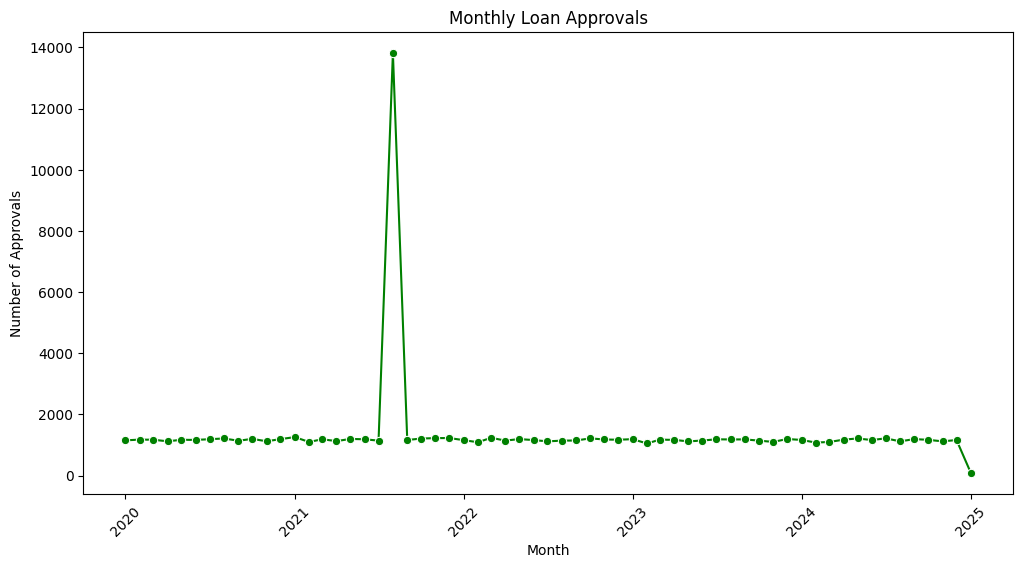

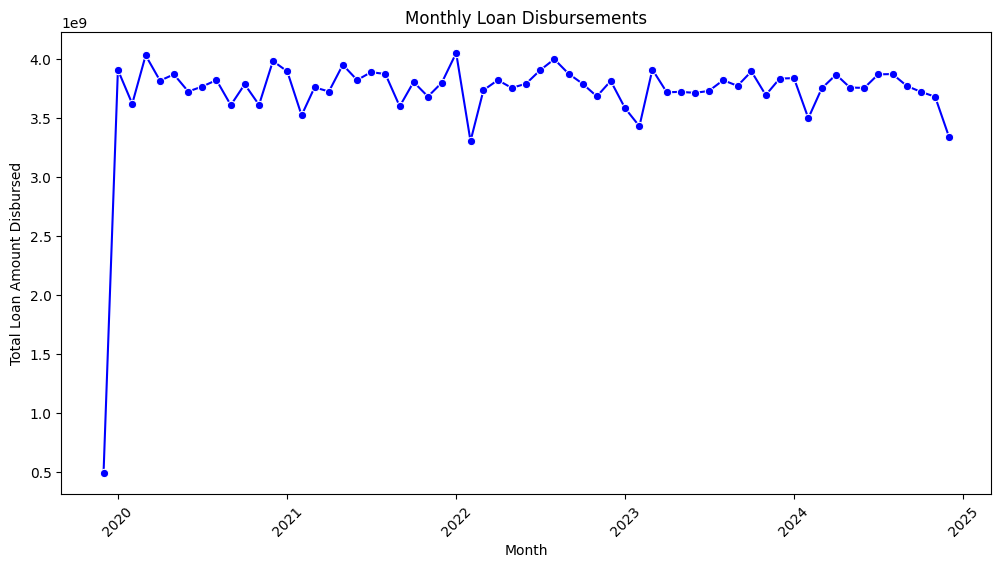

In [10]:
# Convert dates to datetime if not already
applications["Application_Date"] = pd.to_datetime(applications["Application_Date"], errors="coerce")
applications["Approval_Date"] = pd.to_datetime(applications["Approval_Date"], errors="coerce")
loans["Disbursal_Date"] = pd.to_datetime(loans["Disbursal_Date"], errors="coerce")

# Group by month period (Monthly approvals)
monthly_approvals = applications.groupby(applications["Approval_Date"].dt.to_period("M")).size().reset_index(name="Approvals")

# Convert Period to datetime (use start of month) 
monthly_approvals["Approval_Date"] = monthly_approvals["Approval_Date"].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(x="Approval_Date", y="Approvals", data=monthly_approvals, marker="o", color="green")
plt.title("Monthly Loan Approvals")
plt.xlabel("Month")
plt.ylabel("Number of Approvals")
plt.xticks(rotation=45)
plt.show()

# Group by month period (Monthly disbursements)
monthly_disbursements = loans.groupby(loans["Disbursal_Date"].dt.to_period("M"))["Loan_Amount"].sum().reset_index()

# Convert Period to datetime (use start of month) 
monthly_disbursements["Disbursal_Date"] = monthly_disbursements["Disbursal_Date"].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(x="Disbursal_Date", y="Loan_Amount", data=monthly_disbursements, marker="o", color="blue")
plt.title("Monthly Loan Disbursements")
plt.xlabel("Month")
plt.ylabel("Total Loan Amount Disbursed")
plt.xticks(rotation=45)
plt.show()


# 3. Default Risk Analysis

#### 3.1 Correlation Between Loan Attributes and Defaults:

               Loan_Amount  Interest_Rate  Credit_Score  Default_Flag
Loan_Amount       1.000000      -0.003201      0.000139     -0.003313
Interest_Rate    -0.003201       1.000000      0.002457     -0.003750
Credit_Score      0.000139       0.002457      1.000000     -0.001580
Default_Flag     -0.003313      -0.003750     -0.001580      1.000000


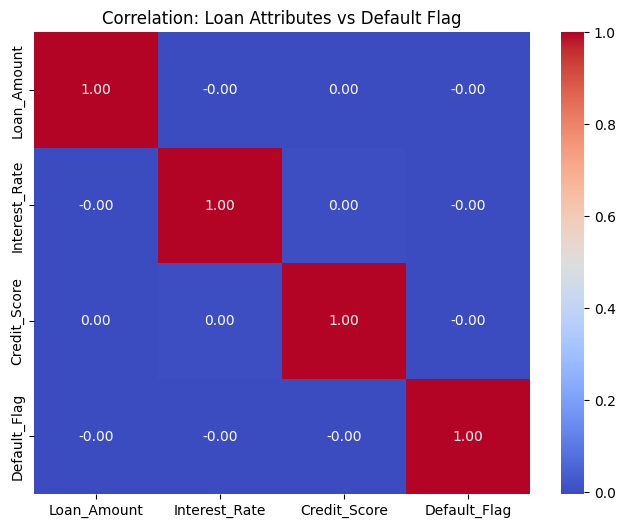

In [11]:
# Create Default_Flag by merging loans with defaults
loans_with_flag = loans.copy()
loans_with_flag["Default_Flag"] = loans_with_flag["Loan_ID"].isin(defaults["Loan_ID"]).astype(int)

# Select relevant columns
loan_corr_data = loans_with_flag[["Customer_ID", "Loan_Amount", "Interest_Rate", "Default_Flag"]].merge(
    customers[["Customer_ID", "Credit_Score"]],
    on="Customer_ID"
)

# Correlation matrix (numeric only) 
corr_matrix = loan_corr_data[["Loan_Amount", "Interest_Rate", "Credit_Score", "Default_Flag"]].corr() 
print(corr_matrix)

plt.figure(figsize=(8,6)) 
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f") 
plt.title("Correlation: Loan Attributes vs Default Flag") 
plt.show()


#### 3.2 Pairwise Correlation Analysis:

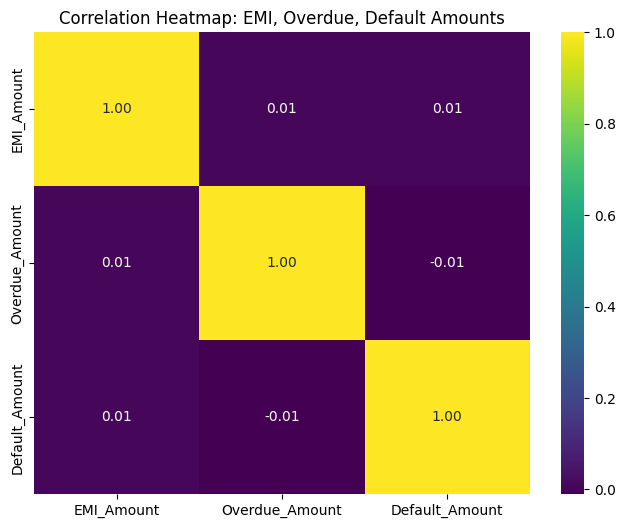

In [12]:
# Merge loans and defaults
loan_default_data = loans.merge(defaults, on="Loan_ID")

# Select relevant numeric columns
pairwise_data = loan_default_data[["EMI_Amount", "Overdue_Amount", "Default_Amount"]]

# Correlation matrix
pairwise_corr = pairwise_data.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pairwise_corr, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap: EMI, Overdue, Default Amounts")
plt.show()


#### 3.3 Correlation Between Branch Metrics and Defaults:

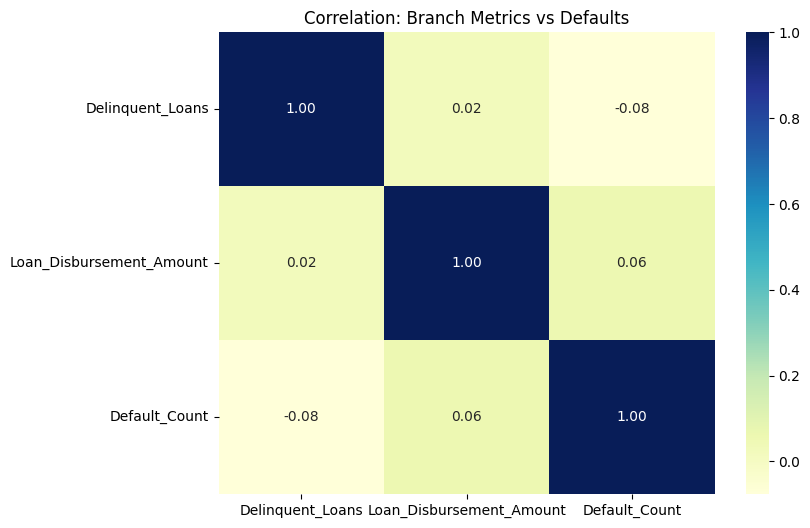

In [13]:
# Merge Loans + Defaults, keep Customer_ID from loans
loan_defaults = loans.merge(defaults, on="Loan_ID", how="inner", suffixes=("_loan", "_default"))

# Ensure we keep the Customer_ID from loans
loan_defaults = loan_defaults.rename(columns={"Customer_ID_loan": "Customer_ID"})

# Attach Customer Region
loan_defaults = loan_defaults.merge(
    customers[["Customer_ID", "Region"]],
    on="Customer_ID",
    how="left"
)

# Attach Branch Info using Region
branch_defaults = loan_defaults.merge(
    branches[["Branch_ID", "Region"]],
    on="Region",
    how="left"
)

# Group by Branch
branch_default_counts = branch_defaults.groupby("Branch_ID")["Default_ID"].count().reset_index()
branch_default_counts.rename(columns={"Default_ID":"Default_Count"}, inplace=True)

# Merge with branch metrics
branch_analysis = branches.merge(branch_default_counts, on="Branch_ID", how="left").fillna(0)

# Correlation matrix
branch_corr = branch_analysis[["Delinquent_Loans", "Loan_Disbursement_Amount", "Default_Count"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(branch_corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation: Branch Metrics vs Defaults")
plt.show()


# 4. Branch and Regional Performance

#### 4.1 Rank branches by loan disbursement volume, processing time efficiency, default rates and recovery rates

Top Branches by Loan Disbursement Volume:
   Branch_ID   Region  Loan_Disbursement_Amount
35      B036     East                 499562869
13      B014    North                 482327541
11      B012     West                 465469874
47      B048  Central                 464419943
34      B035  Central                 449109596
42      B043     East                 447832443
2       B003  Central                 445787808
49      B050    North                 442594434
9       B010     West                 435407779
36      B037    North                 420746720


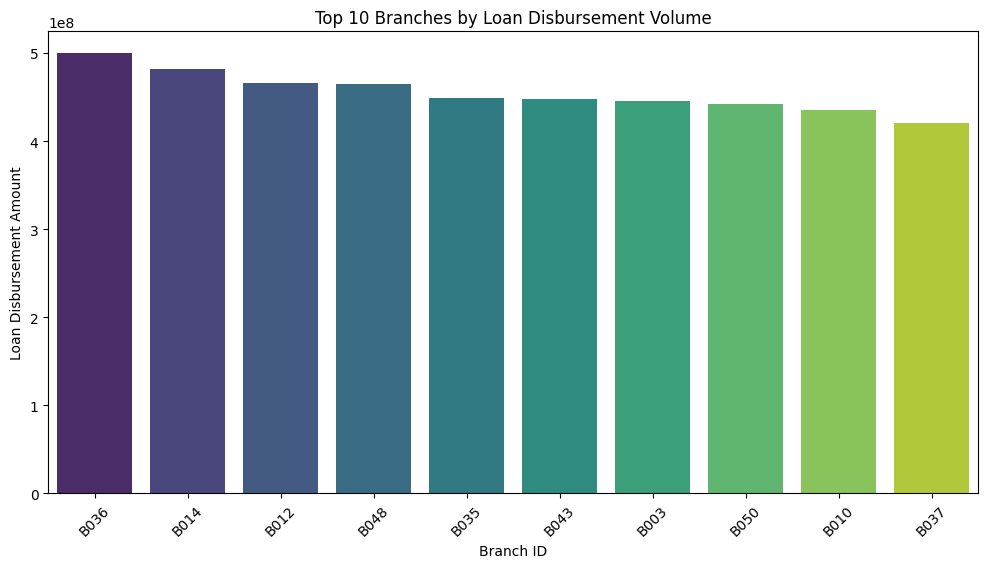


Top Branches by Processing Time Efficiency (Lower is Better):
   Branch_ID  Processing_Time
32      B033       120.570079
38      B039       120.570079
22      B023       120.570079
4       B005       120.570079
20      B021       120.570079
30      B031       120.570079
10      B011       120.570079
44      B045       120.570079
29      B030       125.631189
21      B022       125.631189


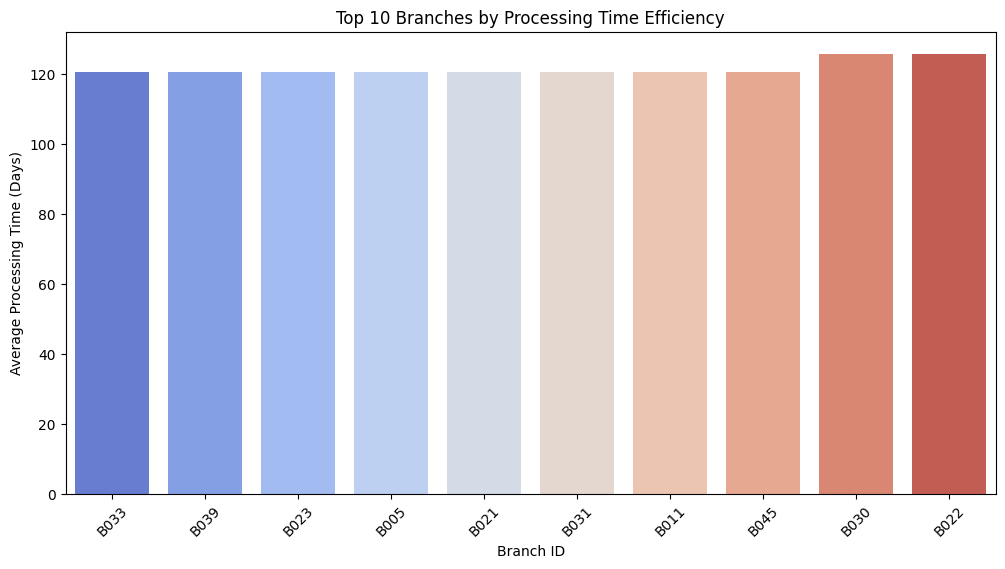


Branches by Default Rate (Higher is Worse):
   Branch_ID     Region  Default_Rate
2       B003    Central   1228.688525
7       B008    Central    657.456140
8       B009      North    600.000000
31      B032  Northeast    598.804781
43      B044    Central    585.546875
0       B001       West    562.365591
49      B050      North    438.390093
48      B049      North    408.069164
16      B017      North    349.629630
20      B021      South    333.052632


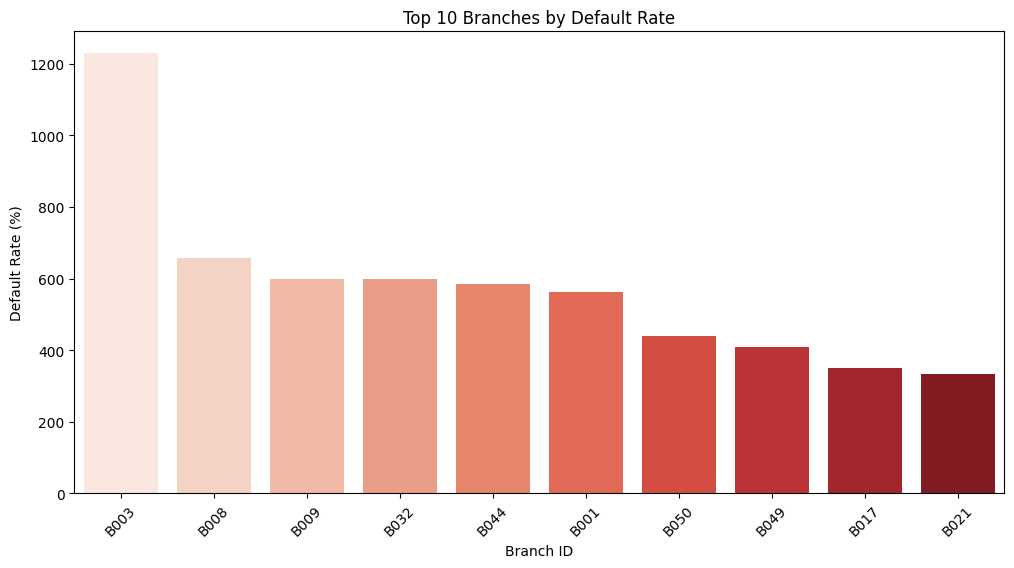


Top Branches by Recovery Rate (Higher is Better):
   Branch_ID  Recovery_Amount  Default_Amount  Recovery_Rate
44      B045         15766509      60965366.0      25.861419
4       B005         15766509      60965366.0      25.861419
38      B039         15766509      60965366.0      25.861419
32      B033         15766509      60965366.0      25.861419
30      B031         15766509      60965366.0      25.861419
10      B011         15766509      60965366.0      25.861419
22      B023         15766509      60965366.0      25.861419
20      B021         15766509      60965366.0      25.861419
25      B026         15563080      62378265.0      24.949524
16      B017         15563080      62378265.0      24.949524


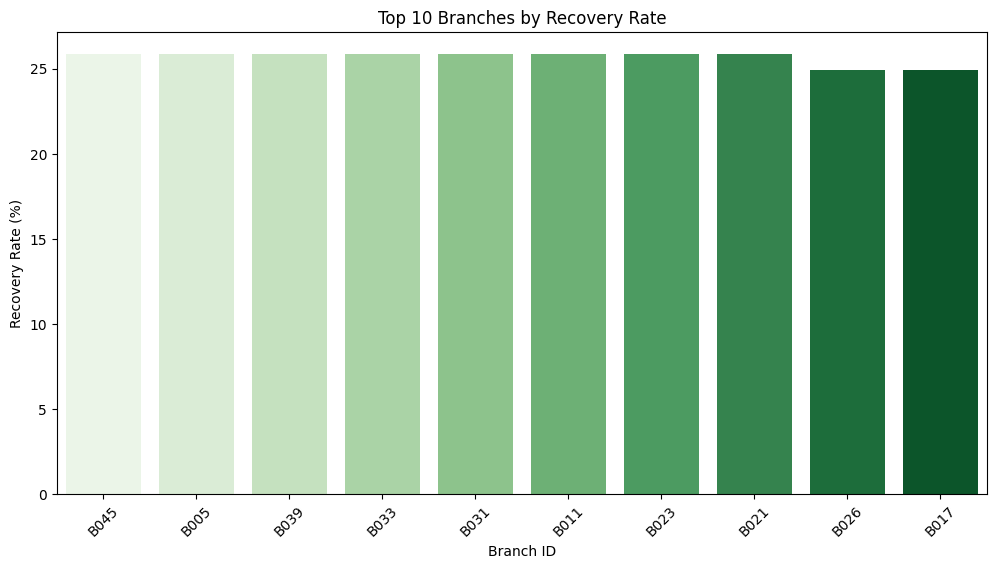

In [14]:
# 1. Rank by Loan Disbursement Volume
branch_disbursement = branches[["Branch_ID", "Region", "Loan_Disbursement_Amount"]].sort_values(
    by="Loan_Disbursement_Amount", ascending=False
)
print("Top Branches by Loan Disbursement Volume:")
print(branch_disbursement.head(10))

# Visualization
plt.figure(figsize=(12,6))
top_10_disbursement = branch_disbursement.head(10)
sns.barplot(x="Branch_ID", y="Loan_Disbursement_Amount", data=top_10_disbursement, hue="Branch_ID", palette="viridis", legend=False)
plt.title("Top 10 Branches by Loan Disbursement Volume")
plt.xlabel("Branch ID")
plt.ylabel("Loan Disbursement Amount")
plt.xticks(rotation=45)
plt.show()

# 2. Processing Time Efficiency
# Calculate average processing time (Application_Date to Approval_Date)
applications["Processing_Time"] = (applications["Approval_Date"] - applications["Application_Date"]).dt.days

# Merge with loans to get Branch info via Customer
# After first merge
app_with_branch = applications.merge(
    loans[["Loan_ID", "Customer_ID"]],
    on="Loan_ID",
    how="left"
)

# Decide which Customer_ID to use
# If applications' Customer_ID is correct:
app_with_branch = app_with_branch.rename(columns={"Customer_ID_x": "Customer_ID"})

# If loans' Customer_ID is correct:
# app_with_branch = app_with_branch.rename(columns={"Customer_ID_y": "Customer_ID"})

# Now merge with customers
app_with_branch = app_with_branch.merge(
    customers[["Customer_ID", "Region"]],
    on="Customer_ID",
    how="left"
).merge(
    branches[["Branch_ID", "Region"]],
    on="Region",
    how="left"
)

# Average processing time by branch
branch_processing = app_with_branch.groupby("Branch_ID")["Processing_Time"].mean().reset_index()
branch_processing = branch_processing.sort_values(by="Processing_Time", ascending=True)
print("\nTop Branches by Processing Time Efficiency (Lower is Better):")
print(branch_processing.head(10))

# Visualization
plt.figure(figsize=(12,6))
top_10_processing = branch_processing.head(10)
sns.barplot(x="Branch_ID", y="Processing_Time", data=top_10_processing, hue="Branch_ID", palette="coolwarm", legend=False)
plt.title("Top 10 Branches by Processing Time Efficiency")
plt.xlabel("Branch ID")
plt.ylabel("Average Processing Time (Days)")
plt.xticks(rotation=45)
plt.show()

# 3. Default Rates by Branch
# Use the branch_analysis from previous section
branch_analysis["Default_Rate"] = (branch_analysis["Default_Count"] / branch_analysis["Total_Active_Loans"]) * 100
branch_default_ranking = branch_analysis[["Branch_ID", "Region", "Default_Rate"]].sort_values(
    by="Default_Rate", ascending=False
)
print("\nBranches by Default Rate (Higher is Worse):")
print(branch_default_ranking.head(10))

# Visualization
plt.figure(figsize=(12,6))
top_10_default = branch_default_ranking.head(10)
sns.barplot(x="Branch_ID", y="Default_Rate", data=top_10_default, hue="Branch_ID", palette="Reds", legend=False)
plt.title("Top 10 Branches by Default Rate")
plt.xlabel("Branch ID")
plt.ylabel("Default Rate (%)")
plt.xticks(rotation=45)
plt.show()

# 4. Recovery Rates by Branch
# Calculate recovery rate from defaults
# After first merge
branch_recovery = defaults.merge(
    loans[["Loan_ID", "Customer_ID"]],
    on="Loan_ID",
    how="left"
)

# Decide which Customer_ID to use
# If defaults' Customer_ID is correct:
branch_recovery = branch_recovery.rename(columns={"Customer_ID_x": "Customer_ID"})

# If loans' Customer_ID is correct:
# branch_recovery = branch_recovery.rename(columns={"Customer_ID_y": "Customer_ID"})

# Now merge with customers
branch_recovery = branch_recovery.merge(
    customers[["Customer_ID", "Region"]],
    on="Customer_ID",
    how="left"
).merge(
    branches[["Branch_ID", "Region"]],
    on="Region",
    how="left"
)

branch_recovery_rate = branch_recovery.groupby("Branch_ID").agg({
    "Recovery_Amount": "sum",
    "Default_Amount": "sum"
}).reset_index()

branch_recovery_rate["Recovery_Rate"] = (
    branch_recovery_rate["Recovery_Amount"] / branch_recovery_rate["Default_Amount"]
) * 100

branch_recovery_rate = branch_recovery_rate.sort_values(by="Recovery_Rate", ascending=False)
print("\nTop Branches by Recovery Rate (Higher is Better):")
print(branch_recovery_rate.head(10))

# Visualization
plt.figure(figsize=(12,6))
top_10_recovery = branch_recovery_rate.head(10)
sns.barplot(x="Branch_ID", y="Recovery_Rate", data=top_10_recovery, hue="Branch_ID", palette="Greens", legend=False)
plt.title("Top 10 Branches by Recovery Rate")
plt.xlabel("Branch ID")
plt.ylabel("Recovery Rate (%)")
plt.xticks(rotation=45)
plt.show()

#### 4.2 Compare branch performance across regions

Regional Performance Summary:
      Region  Loan_Disbursement_Amount  Total_Active_Loans  Delinquent_Loans  Delinquency_Rate
0    Central                3316048302                8715               994         11.405622
1       East                2006676282                8929               756          8.466794
2      North                3296073904               11965              1504         12.569996
3  Northeast                 442827845                5174               487          9.412447
4      South                1694906506                9235               846          9.160801
5       West                1990828641                6861               441          6.427634


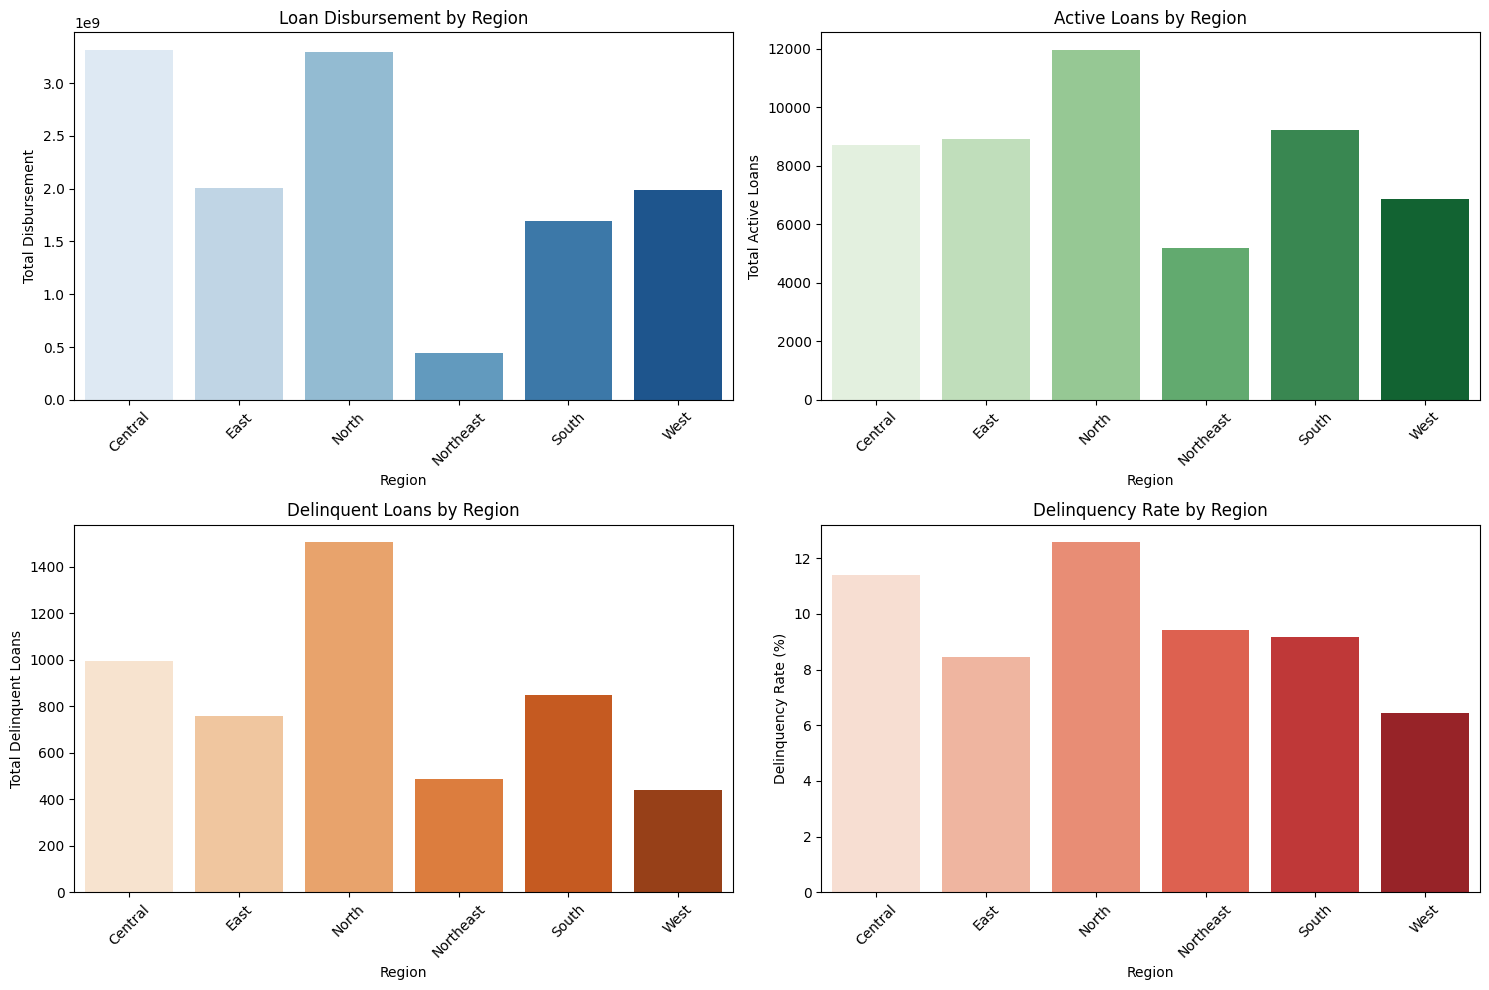

In [15]:
# Regional Performance Comparison
regional_performance = branches.groupby("Region").agg({
    "Loan_Disbursement_Amount": "sum",
    "Total_Active_Loans": "sum",
    "Delinquent_Loans": "sum"
}).reset_index()

regional_performance["Delinquency_Rate"] = (
    regional_performance["Delinquent_Loans"] / regional_performance["Total_Active_Loans"]
) * 100

print("Regional Performance Summary:")
print(regional_performance.to_string())

# Visualization - Multi-metric comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Disbursement by region
sns.barplot(x="Region", y="Loan_Disbursement_Amount", data=regional_performance, 
            hue="Region", palette="Blues", ax=axes[0,0], legend=False)
axes[0,0].set_title("Loan Disbursement by Region")
axes[0,0].set_xlabel("Region")
axes[0,0].set_ylabel("Total Disbursement")
axes[0,0].tick_params(axis='x', rotation=45)

# Active Loans by region
sns.barplot(x="Region", y="Total_Active_Loans", data=regional_performance, 
            hue="Region", palette="Greens", ax=axes[0,1], legend=False)
axes[0,1].set_title("Active Loans by Region")
axes[0,1].set_xlabel("Region")
axes[0,1].set_ylabel("Total Active Loans")
axes[0,1].tick_params(axis='x', rotation=45)

# Delinquent Loans by region
sns.barplot(x="Region", y="Delinquent_Loans", data=regional_performance, 
            hue="Region", palette="Oranges", ax=axes[1,0], legend=False)
axes[1,0].set_title("Delinquent Loans by Region")
axes[1,0].set_xlabel("Region")
axes[1,0].set_ylabel("Total Delinquent Loans")
axes[1,0].tick_params(axis='x', rotation=45)

# Delinquency Rate by region
sns.barplot(x="Region", y="Delinquency_Rate", data=regional_performance, 
            hue="Region", palette="Reds", ax=axes[1,1], legend=False)
axes[1,1].set_title("Delinquency Rate by Region")
axes[1,1].set_xlabel("Region")
axes[1,1].set_ylabel("Delinquency Rate (%)")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 5. Customer Segmentation

#### 5.1 Segment customers by income, credit score, and loan status

Customer Segmentation Summary:
   Income_Segment Credit_Segment  Customer_Count  Default_Count  \
0             Low           Poor            3465            256   
1             Low           Fair            1075             86   
2             Low           Good            1077             90   
3             Low      Excellent             582             39   
4          Medium           Poor            9893            825   
5          Medium           Fair            3238            264   
6          Medium           Good            3224            244   
7          Medium      Excellent            1664            113   
8            High           Poor           13423           1050   
9            High           Fair            4326            320   
10           High           Good            4409            359   
11           High      Excellent            2187            183   
12      Very High           Poor           33288           2593   
13      Very High           Fai

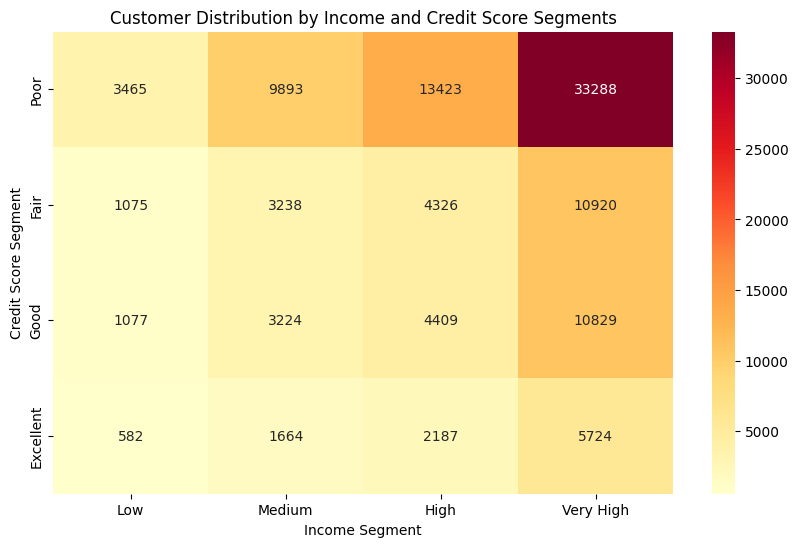

In [16]:
# Segment by Income
customers["Income_Segment"] = pd.cut(
    customers["Annual_Income"], 
    bins=[0, 300000, 600000, 1000000, float('inf')],
    labels=["Low", "Medium", "High", "Very High"]
)

# Segment by Credit Score
customers["Credit_Segment"] = pd.cut(
    customers["Credit_Score"], 
    bins=[0, 600, 700, 800, 900],
    labels=["Poor", "Fair", "Good", "Excellent"]
)

# Merge with loans to get loan status
customer_loans = customers.merge(loans, on="Customer_ID", how="left")
customer_loans["Has_Default"] = customer_loans["Loan_ID"].isin(defaults["Loan_ID"]).astype(int)

# Segmentation summary
segment_summary = customer_loans.groupby(
    ["Income_Segment", "Credit_Segment"], observed=False
).agg({
    "Customer_ID": "count",
    "Has_Default": "sum",
    "Loan_Amount": "sum"
}).reset_index()

segment_summary.columns = ["Income_Segment", "Credit_Segment", "Customer_Count", "Default_Count", "Total_Loan_Amount"]
segment_summary["Default_Rate"] = (segment_summary["Default_Count"] / segment_summary["Customer_Count"]) * 100

print("Customer Segmentation Summary:")
print(segment_summary)

# Visualization - Heatmap of segments
pivot_data = segment_summary.pivot_table(
    index="Credit_Segment", 
    columns="Income_Segment", 
    values="Customer_Count", 
    fill_value=0,
    observed=False
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Customer Distribution by Income and Credit Score Segments")
plt.xlabel("Income Segment")
plt.ylabel("Credit Score Segment")
plt.show()

#### 5.2 Identify high-risk and high-value customer groups

High-Risk Customer Groups:
  Income_Segment Credit_Segment  Customer_Count  Default_Count  \
1            Low           Fair            1075             86   
4         Medium           Poor            9893            825   
5         Medium           Fair            3238            264   
8           High           Poor           13423           1050   

   Total_Loan_Amount  Default_Rate  
1       2.264035e+09      8.000000  
4       2.065361e+10      8.339230  
5       6.583224e+09      8.153181  
8       2.783220e+10      7.822394  

High-Value Customer Groups:
   Income_Segment Credit_Segment  Customer_Count  Default_Count  \
9            High           Fair            4326            320   
12      Very High           Poor           33288           2593   
13      Very High           Fair           10920            815   
14      Very High           Good           10829            829   

    Total_Loan_Amount  Default_Rate  
9        8.972335e+09      7.397134  
12       6.91972

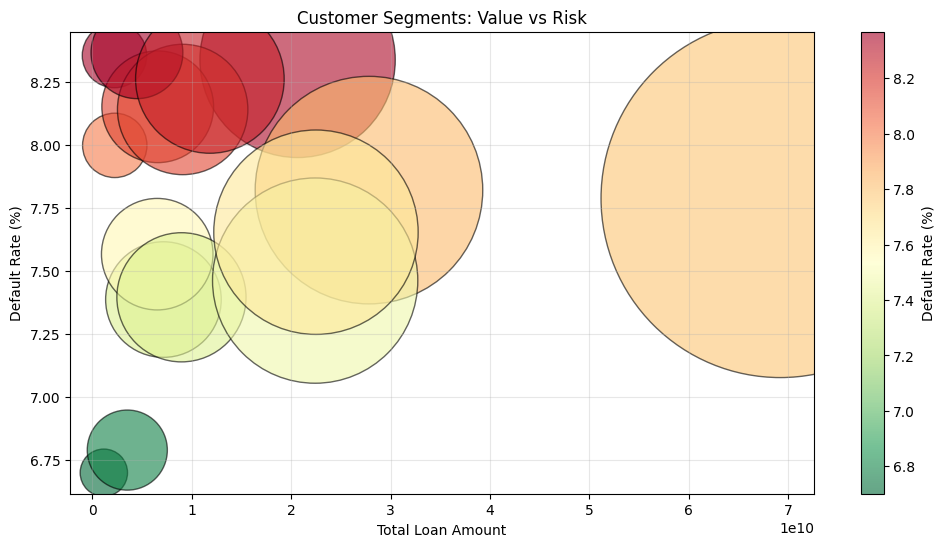

In [17]:
# High-Risk Customers (High default rate, low credit score)
high_risk = segment_summary[
    (segment_summary["Default_Rate"] > segment_summary["Default_Rate"].median()) &
    (segment_summary["Credit_Segment"].isin(["Poor", "Fair"]))
]
print("High-Risk Customer Groups:")
print(high_risk)

# High-Value Customers (High loan amounts, low default rate, high income)
high_value = segment_summary[
    (segment_summary["Total_Loan_Amount"] > segment_summary["Total_Loan_Amount"].median()) &
    (segment_summary["Default_Rate"] < segment_summary["Default_Rate"].median()) &
    (segment_summary["Income_Segment"].isin(["High", "Very High"]))
]
print("\nHigh-Value Customer Groups:")
print(high_value)

# Visualize risk vs value
plt.figure(figsize=(12,6))
plt.scatter(
    segment_summary["Total_Loan_Amount"], 
    segment_summary["Default_Rate"],
    s=segment_summary["Customer_Count"]*2,
    c=segment_summary["Default_Rate"],
    cmap="RdYlGn_r",
    alpha=0.6,
    edgecolors="black"
)
plt.colorbar(label="Default Rate (%)")
plt.xlabel("Total Loan Amount")
plt.ylabel("Default Rate (%)")
plt.title("Customer Segments: Value vs Risk")
plt.grid(True, alpha=0.3)
plt.show()

#### 5.3 Analyze repayment behavior across segments

Repayment Behavior by Segment:
   Income_Segment Credit_Segment   Avg_Payment  Payment_Count
0             Low           Poor  25522.011934           7709
1             Low           Fair  25550.055674           2353
2             Low           Good  25349.741075           2437
3             Low      Excellent  25378.029272           1264
4          Medium           Poor  25481.523039          22939
5          Medium           Fair  25766.247397           7203
6          Medium           Good  25439.848159           7060
7          Medium      Excellent  25618.261033           3716
8            High           Poor  25453.346122          30027
9            High           Fair  25323.845744           9763
10           High           Good  25499.562298           9888
11           High      Excellent  25735.457507           4942
12      Very High           Poor  25468.676848          75825
13      Very High           Fair  25496.581671          24562
14      Very High           Good  25580

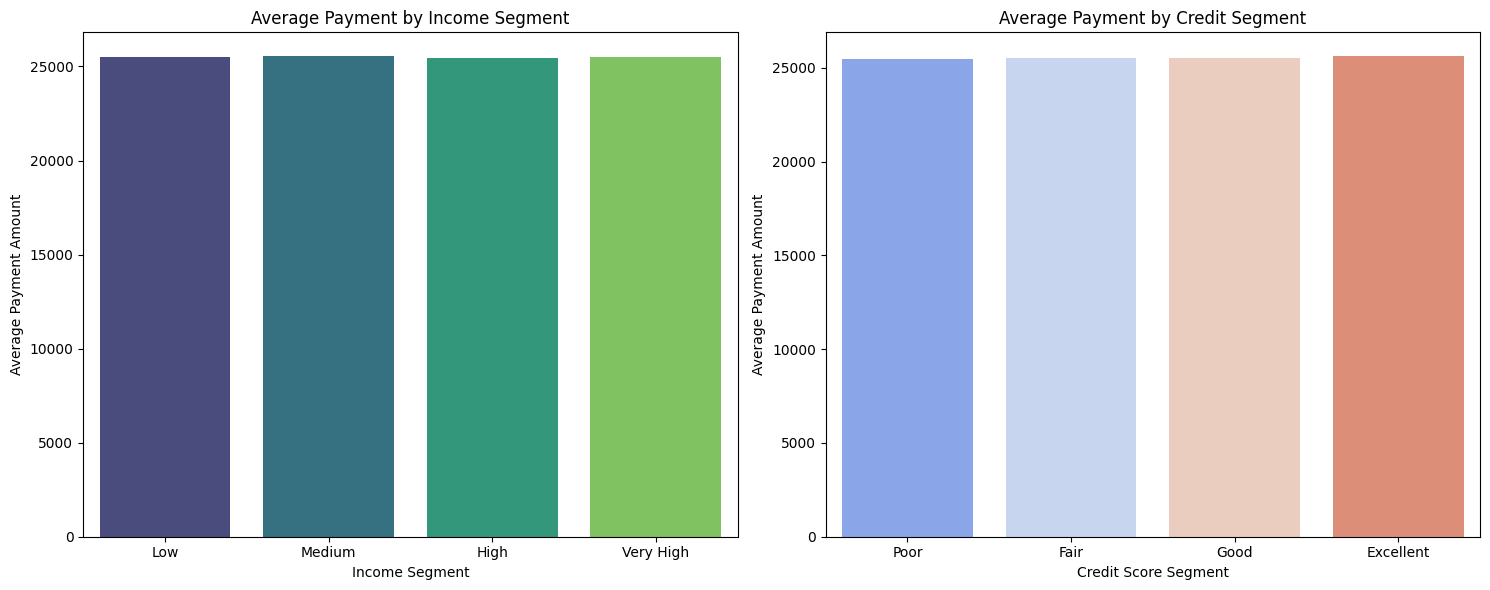

In [18]:
# Analyze repayment through transaction patterns
repayment_analysis = transactions[transactions["Payment_Type"] == "EMI"].merge(
    loans[["Loan_ID", "Customer_ID"]],
    on="Loan_ID",
    how="left",
    suffixes=("_txn", "_loan")
)

# Pick the right Customer_ID (from loans)
repayment_analysis = repayment_analysis.rename(columns={"Customer_ID_loan": "Customer_ID"})

# Now merge with customers
repayment_analysis = repayment_analysis.merge(
    customers[["Customer_ID", "Income_Segment", "Credit_Segment"]],
    on="Customer_ID",
    how="left"
)

# Average payment amounts by segment
segment_repayment = repayment_analysis.groupby(
    ["Income_Segment", "Credit_Segment"],
    observed=False
).agg({
    "Amount": ["mean", "count"]
}).reset_index()


segment_repayment.columns = ["Income_Segment", "Credit_Segment", "Avg_Payment", "Payment_Count"]

print("Repayment Behavior by Segment:")
print(segment_repayment)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Average payment by income segment
income_payment = repayment_analysis.groupby(
    "Income_Segment", 
    observed=False
)["Amount"].mean().reset_index()
sns.barplot(x="Income_Segment", y="Amount", data=income_payment, 
            hue="Income_Segment", palette="viridis", ax=axes[0], legend=False)
axes[0].set_title("Average Payment by Income Segment")
axes[0].set_xlabel("Income Segment")
axes[0].set_ylabel("Average Payment Amount")

# Average payment by credit segment
credit_payment = repayment_analysis.groupby(
    "Credit_Segment", 
    observed=False
)["Amount"].mean().reset_index()
sns.barplot(x="Credit_Segment", y="Amount", data=credit_payment, 
            hue="Credit_Segment", palette="coolwarm", ax=axes[1], legend=False)
axes[1].set_title("Average Payment by Credit Segment")
axes[1].set_xlabel("Credit Score Segment")
axes[1].set_ylabel("Average Payment Amount")

plt.tight_layout()
plt.show()

# 6. Advanced Statistical Analysis

#### 6.1 Correlation Analysis for Default Risks

Advanced Correlation Matrix for Default Risks:
Default_Flag      1.000000
EMI_Amount        0.002684
Overdue_Amount   -0.000687
Credit_Score     -0.001580
Loan_Amount      -0.003313
Interest_Rate    -0.003750
Annual_Income    -0.005232
Name: Default_Flag, dtype: float64


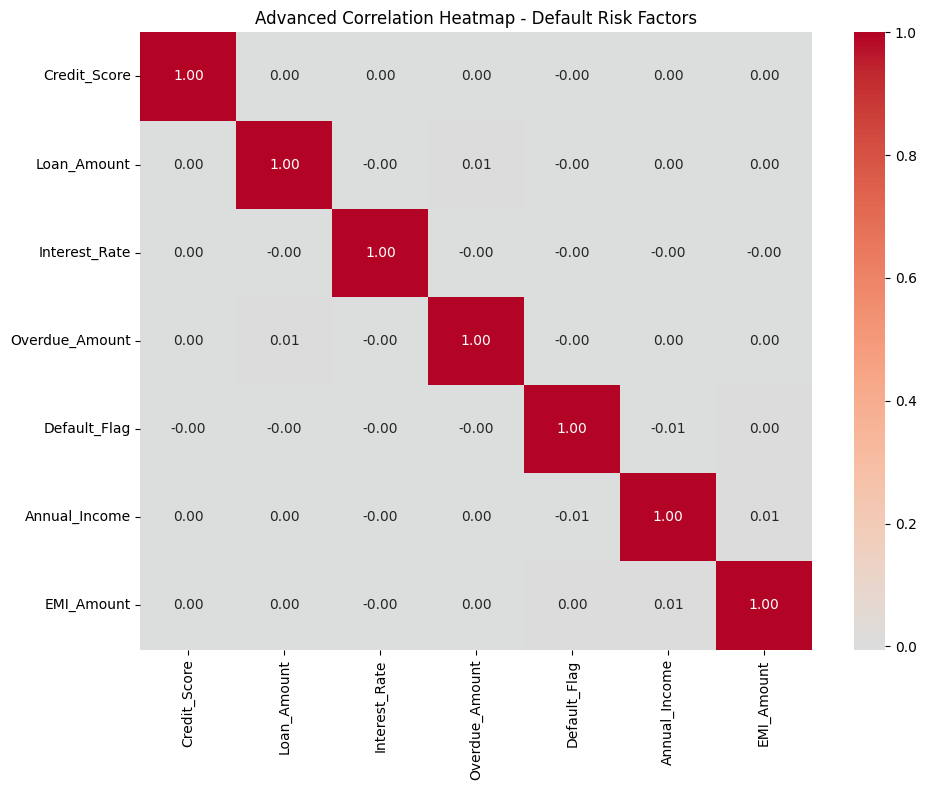

In [19]:
# Advanced correlation analysis with more features
advanced_default_data = loans.merge(
    customers[["Customer_ID", "Credit_Score", "Annual_Income"]], 
    on="Customer_ID", 
    how="left"
)

# Add default flag
advanced_default_data["Default_Flag"] = advanced_default_data["Loan_ID"].isin(defaults["Loan_ID"]).astype(int)

# Select relevant numeric columns
correlation_cols = ["Credit_Score", "Loan_Amount", "Interest_Rate", "Overdue_Amount", "Default_Flag", "Annual_Income", "EMI_Amount"]
corr_data = advanced_default_data[correlation_cols]

# Correlation matrix
advanced_corr = corr_data.corr()

print("Advanced Correlation Matrix for Default Risks:")
print(advanced_corr["Default_Flag"].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(advanced_corr, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Advanced Correlation Heatmap - Default Risk Factors")
plt.tight_layout()
plt.show()

#### 6.2 Pairwise Correlation Heatmap: EMI_Amount, Recovery_Rate, and Default_Amount

Pairwise Correlation Matrix:
                EMI_Amount  Recovery_Rate  Default_Amount  Overdue_Amount  \
EMI_Amount        1.000000      -0.001442        0.003073        0.000386   
Recovery_Rate    -0.001442       1.000000        0.204984        0.003149   
Default_Amount    0.003073       0.204984        1.000000       -0.001529   
Overdue_Amount    0.000386       0.003149       -0.001529        1.000000   
Loan_Amount       0.000804       0.002160       -0.004700        0.008249   
Interest_Rate    -0.004477      -0.002086       -0.003177       -0.002700   

                Loan_Amount  Interest_Rate  
EMI_Amount         0.000804      -0.004477  
Recovery_Rate      0.002160      -0.002086  
Default_Amount    -0.004700      -0.003177  
Overdue_Amount     0.008249      -0.002700  
Loan_Amount        1.000000      -0.003451  
Interest_Rate     -0.003451       1.000000  

Key Variables Correlation (EMI_Amount, Recovery_Rate, Default_Amount):
                EMI_Amount  Recovery_Rate  D

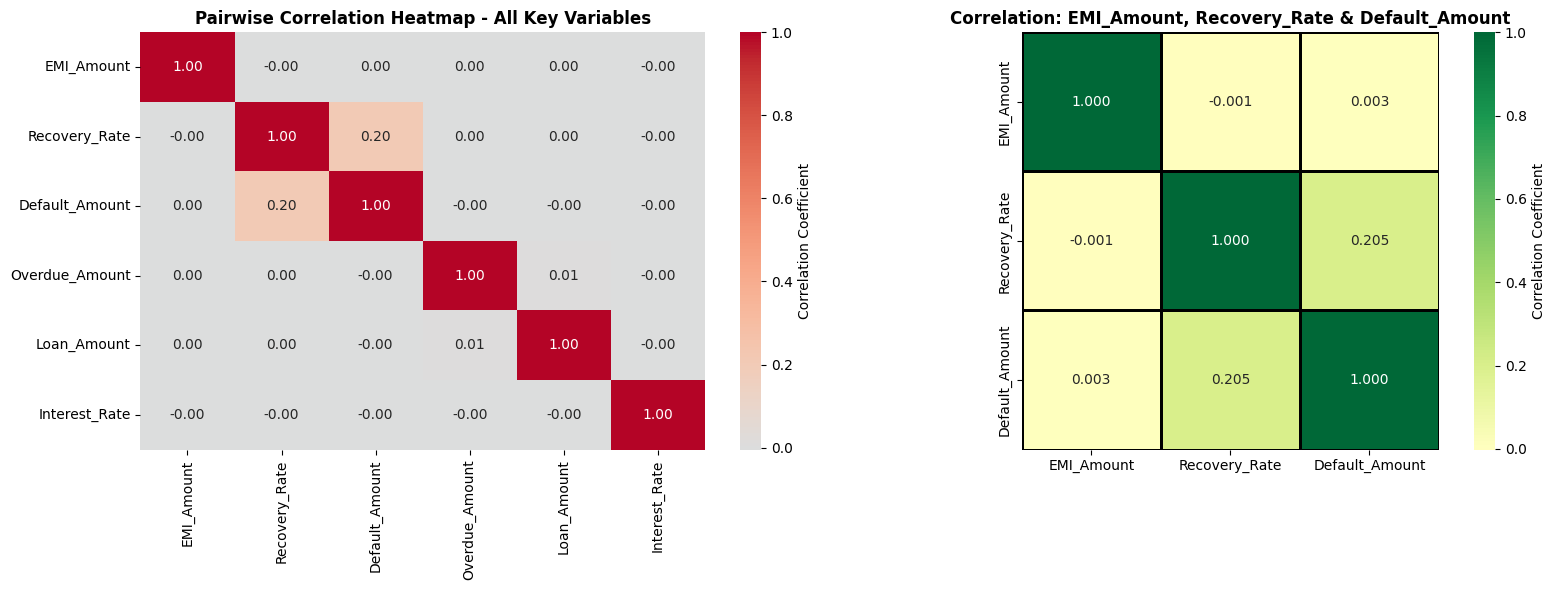


KEY INSIGHTS FROM PAIRWISE CORRELATION:
EMI_Amount vs Default_Amount: 0.003
EMI_Amount vs Recovery_Rate: -0.001
Default_Amount vs Recovery_Rate: 0.205


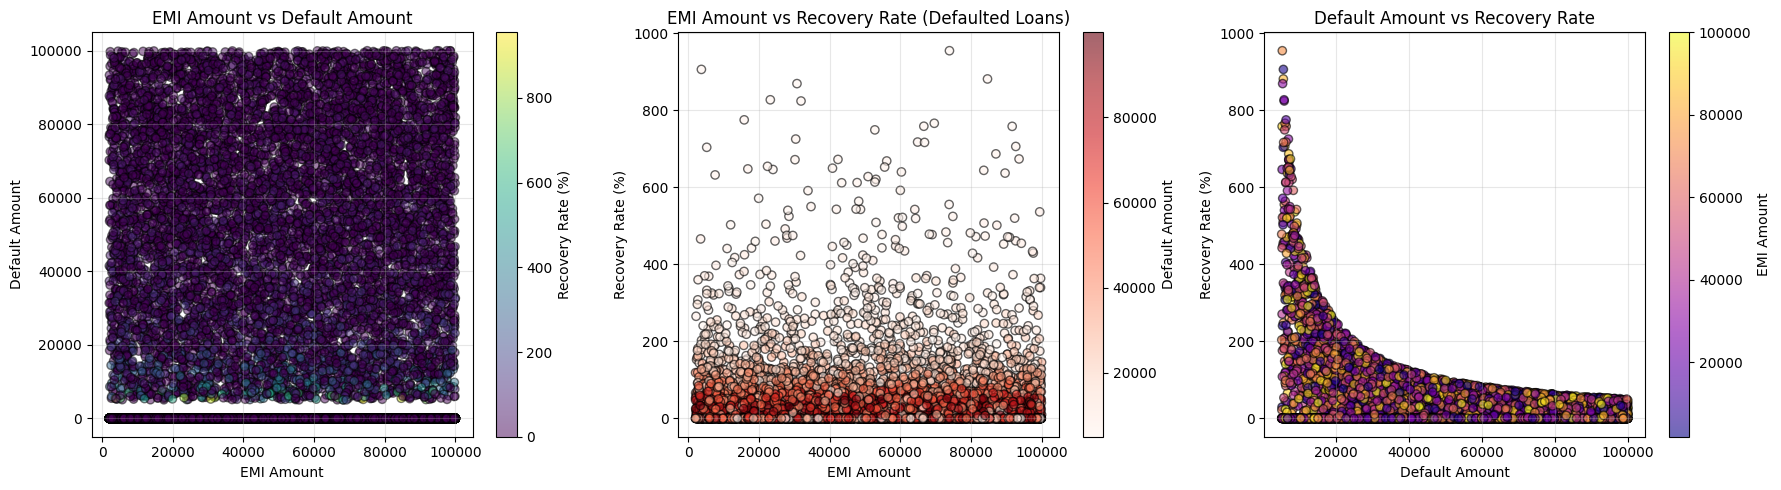

In [20]:
# Prepare data for pairwise correlation with EMI_Amount, Recovery_Rate, and Default_Amount
# Merge loans with defaults to get recovery information
pairwise_data = loans.merge(
    defaults[["Loan_ID", "Default_Amount", "Recovery_Amount"]], 
    on="Loan_ID", 
    how="left"
)

# Calculate Recovery_Rate (percentage of default amount recovered)
pairwise_data["Recovery_Rate"] = (
    pairwise_data["Recovery_Amount"] / pairwise_data["Default_Amount"] * 100
).fillna(0)

# Replace inf values with 0
pairwise_data["Recovery_Rate"] = pairwise_data["Recovery_Rate"].replace([float('inf'), -float('inf')], 0)

# Fill NaN values in Default_Amount and Recovery_Amount with 0 for non-defaulted loans
pairwise_data["Default_Amount"] = pairwise_data["Default_Amount"].fillna(0)
pairwise_data["Recovery_Amount"] = pairwise_data["Recovery_Amount"].fillna(0)

# Select key variables for pairwise correlation
pairwise_corr_data = pairwise_data[["EMI_Amount", "Recovery_Rate", "Default_Amount", 
                                     "Overdue_Amount", "Loan_Amount", "Interest_Rate"]].copy()

# Calculate correlation matrix
pairwise_corr_matrix = pairwise_corr_data.corr()

print("Pairwise Correlation Matrix:")
print(pairwise_corr_matrix)

# Focus on key variables correlation
key_vars_corr = pairwise_corr_data[["EMI_Amount", "Recovery_Rate", "Default_Amount"]].corr()

print("\nKey Variables Correlation (EMI_Amount, Recovery_Rate, Default_Amount):")
print(key_vars_corr)

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Full pairwise correlation heatmap
sns.heatmap(pairwise_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", 
            center=0, ax=axes[0], cbar_kws={'label': 'Correlation Coefficient'})
axes[0].set_title("Pairwise Correlation Heatmap - All Key Variables", fontsize=12, fontweight='bold')

# Focused heatmap on EMI, Recovery Rate, and Default Amount
sns.heatmap(key_vars_corr, annot=True, cmap="RdYlGn", fmt=".3f", 
            center=0, ax=axes[1], cbar_kws={'label': 'Correlation Coefficient'},
            square=True, linewidths=2, linecolor='black')
axes[1].set_title("Correlation: EMI_Amount, Recovery_Rate & Default_Amount", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Additional insights
print("\n" + "="*60)
print("KEY INSIGHTS FROM PAIRWISE CORRELATION:")
print("="*60)
print(f"EMI_Amount vs Default_Amount: {key_vars_corr.loc['EMI_Amount', 'Default_Amount']:.3f}")
print(f"EMI_Amount vs Recovery_Rate: {key_vars_corr.loc['EMI_Amount', 'Recovery_Rate']:.3f}")
print(f"Default_Amount vs Recovery_Rate: {key_vars_corr.loc['Default_Amount', 'Recovery_Rate']:.3f}")
print("="*60)

# Scatter plots for visual inspection
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# EMI vs Default Amount
scatter1 = axes[0].scatter(pairwise_data["EMI_Amount"], pairwise_data["Default_Amount"],
                           alpha=0.5, c=pairwise_data["Recovery_Rate"], cmap="viridis", edgecolors="black")
axes[0].set_xlabel("EMI Amount")
axes[0].set_ylabel("Default Amount")
axes[0].set_title("EMI Amount vs Default Amount")
plt.colorbar(scatter1, ax=axes[0], label="Recovery Rate (%)")
axes[0].grid(True, alpha=0.3)

# EMI vs Recovery Rate
defaulted_loans = pairwise_data[pairwise_data["Default_Amount"] > 0]
scatter2 = axes[1].scatter(defaulted_loans["EMI_Amount"], defaulted_loans["Recovery_Rate"],
                           alpha=0.6, c=defaulted_loans["Default_Amount"], cmap="Reds", edgecolors="black")
axes[1].set_xlabel("EMI Amount")
axes[1].set_ylabel("Recovery Rate (%)")
axes[1].set_title("EMI Amount vs Recovery Rate (Defaulted Loans)")
plt.colorbar(scatter2, ax=axes[1], label="Default Amount")
axes[1].grid(True, alpha=0.3)

# Default Amount vs Recovery Rate
scatter3 = axes[2].scatter(defaulted_loans["Default_Amount"], defaulted_loans["Recovery_Rate"],
                           alpha=0.6, c=defaulted_loans["EMI_Amount"], cmap="plasma", edgecolors="black")
axes[2].set_xlabel("Default Amount")
axes[2].set_ylabel("Recovery Rate (%)")
axes[2].set_title("Default Amount vs Recovery Rate")
plt.colorbar(scatter3, ax=axes[2], label="EMI Amount")
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### 6.3 Branch-Level Correlation Analysis

Branch-Level Correlation Matrix:
                          Delinquent_Loans  Loan_Disbursement_Amount  \
Delinquent_Loans                  1.000000                  0.023648   
Loan_Disbursement_Amount          0.023648                  1.000000   
Default_Count                    -0.076043                  0.055019   
Total_Active_Loans               -0.101195                  0.082685   
Efficiency_Ratio                  0.123313                  0.461914   
Risk_Ratio                        0.473941                  0.042768   

                          Default_Count  Total_Active_Loans  Efficiency_Ratio  \
Delinquent_Loans              -0.076043           -0.101195          0.123313   
Loan_Disbursement_Amount       0.055019            0.082685          0.461914   
Default_Count                  1.000000            0.156287         -0.026368   
Total_Active_Loans             0.156287            1.000000         -0.518080   
Efficiency_Ratio              -0.026368           -0.5180

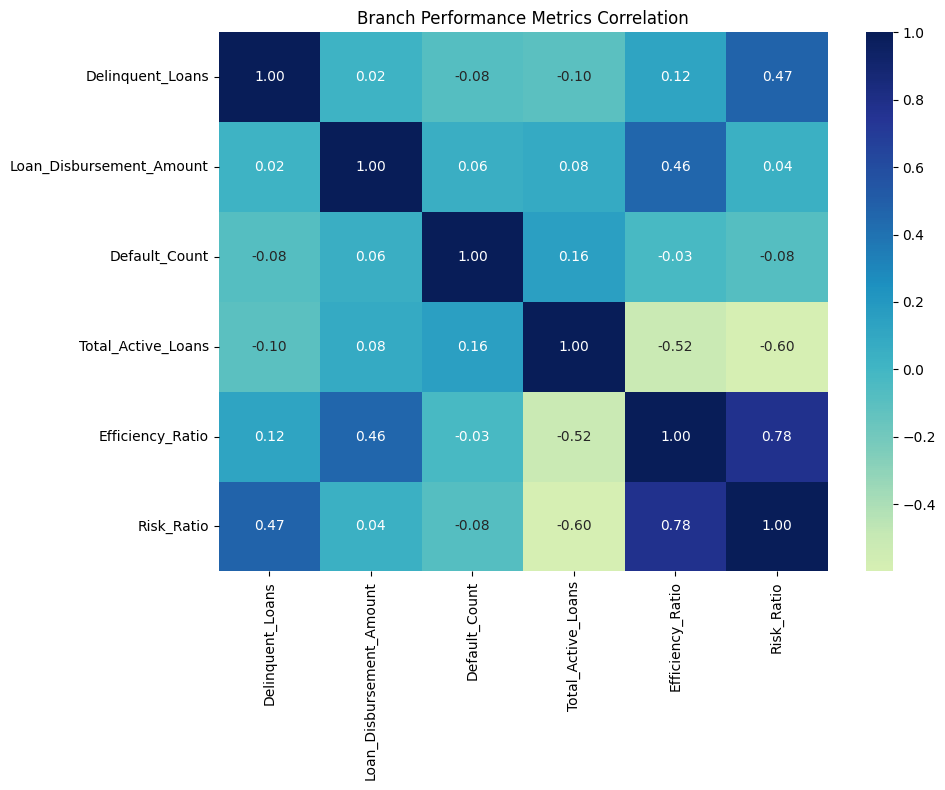

In [21]:
# Branch performance metrics correlation
branch_metrics = branch_analysis[["Delinquent_Loans", "Loan_Disbursement_Amount", "Default_Count", "Total_Active_Loans"]].copy()

# Calculate additional metrics
branch_metrics["Efficiency_Ratio"] = branch_metrics["Loan_Disbursement_Amount"] / branch_metrics["Total_Active_Loans"]
branch_metrics["Risk_Ratio"] = branch_metrics["Delinquent_Loans"] / branch_metrics["Total_Active_Loans"]

# Correlation
branch_level_corr = branch_metrics.corr()

print("Branch-Level Correlation Matrix:")
print(branch_level_corr)

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(branch_level_corr, annot=True, cmap="YlGnBu", fmt=".2f", center=0)
plt.title("Branch Performance Metrics Correlation")
plt.tight_layout()
plt.show()

# 7. Transaction and Recovery Analysis

#### 7.1 Analyze penalty payments and overdue trends

Total Penalty Payments: 247844
Total Penalty Amount: $6,318,173,036.00
Average Penalty Amount: $25,492.54

Total Overdue Loans: 45048
Total Overdue Amount: $1,147,125,736.00


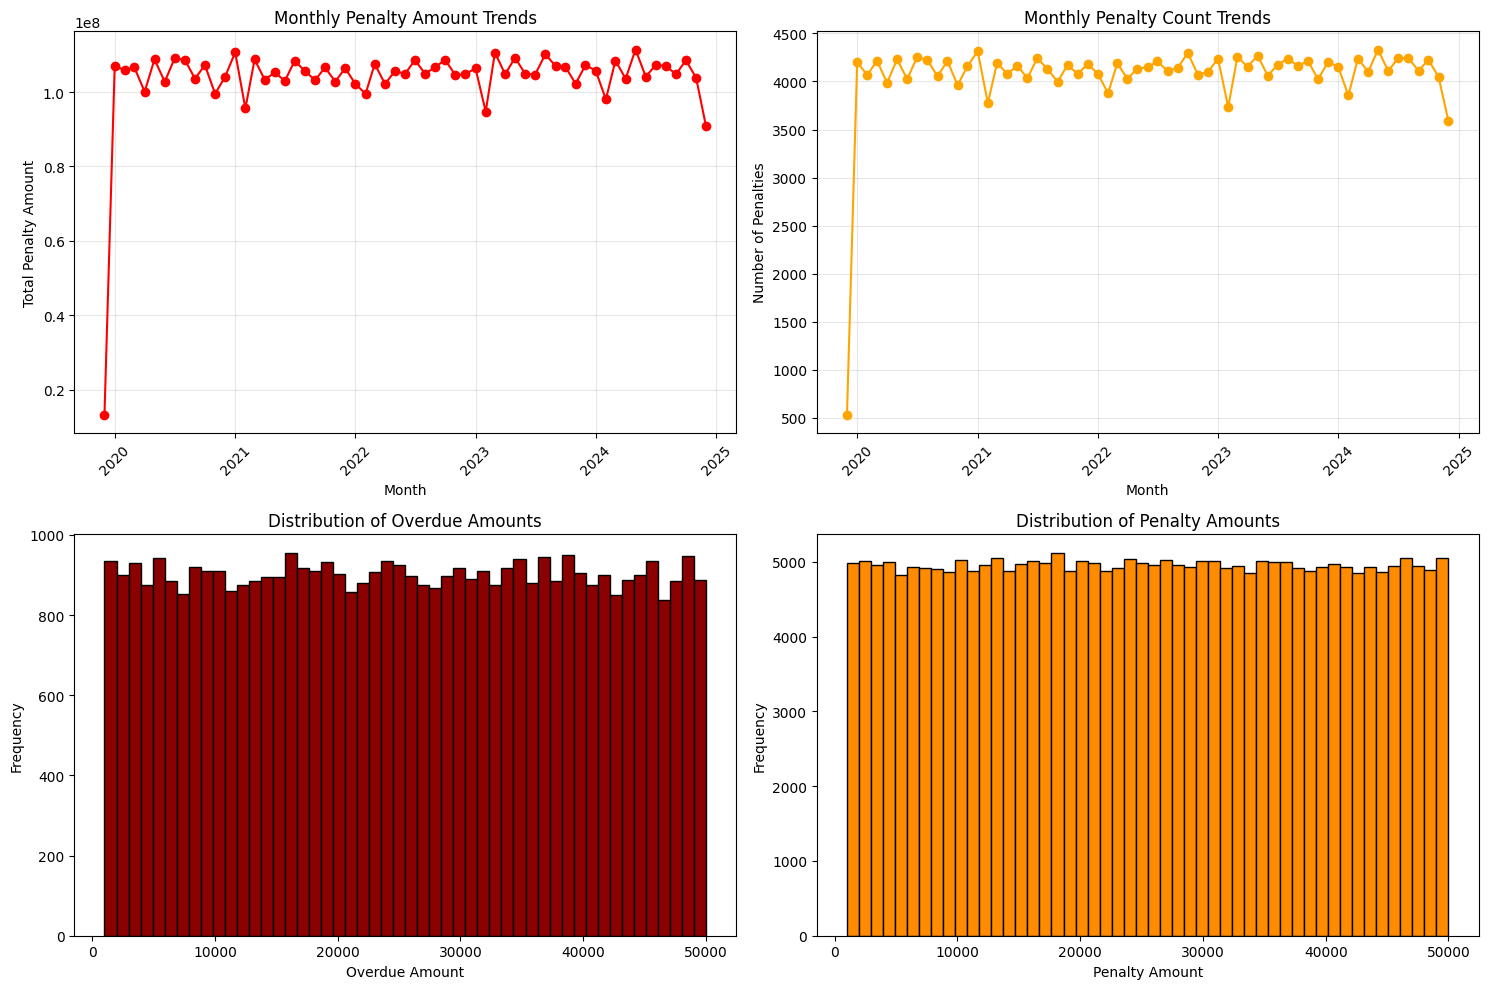

In [22]:
# Penalty payments analysis
penalty_transactions = transactions[transactions["Payment_Type"] == "Penalty"]

print(f"Total Penalty Payments: {len(penalty_transactions)}")
print(f"Total Penalty Amount: ${penalty_transactions['Amount'].sum():,.2f}")
print(f"Average Penalty Amount: ${penalty_transactions['Amount'].mean():,.2f}")

# Penalty trends over time
penalty_transactions.loc[:, "Transaction_Date"] = pd.to_datetime(penalty_transactions["Transaction_Date"], errors="coerce")
monthly_penalties = penalty_transactions.groupby(
    penalty_transactions["Transaction_Date"].dt.to_period("M")
)["Amount"].agg(["sum", "count"]).reset_index()
monthly_penalties["Transaction_Date"] = monthly_penalties["Transaction_Date"].dt.to_timestamp()

# Overdue trends
overdue_loans = loans[loans["Overdue_Amount"] > 0]
print(f"\nTotal Overdue Loans: {len(overdue_loans)}")
print(f"Total Overdue Amount: ${overdue_loans['Overdue_Amount'].sum():,.2f}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Monthly penalty trends
axes[0,0].plot(monthly_penalties["Transaction_Date"], monthly_penalties["sum"], marker="o", color="red")
axes[0,0].set_title("Monthly Penalty Amount Trends")
axes[0,0].set_xlabel("Month")
axes[0,0].set_ylabel("Total Penalty Amount")
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Penalty count trends
axes[0,1].plot(monthly_penalties["Transaction_Date"], monthly_penalties["count"], marker="o", color="orange")
axes[0,1].set_title("Monthly Penalty Count Trends")
axes[0,1].set_xlabel("Month")
axes[0,1].set_ylabel("Number of Penalties")
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# Overdue amount distribution
axes[1,0].hist(overdue_loans["Overdue_Amount"], bins=50, color="darkred", edgecolor="black")
axes[1,0].set_title("Distribution of Overdue Amounts")
axes[1,0].set_xlabel("Overdue Amount")
axes[1,0].set_ylabel("Frequency")

# Penalty amount distribution
axes[1,1].hist(penalty_transactions["Amount"], bins=50, color="darkorange", edgecolor="black")
axes[1,1].set_title("Distribution of Penalty Amounts")
axes[1,1].set_xlabel("Penalty Amount")
axes[1,1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

#### 7.2 Evaluate recovery rates by Default_Reason and Legal_Action

Recovery Rates by Default Reason:
      Default_Reason  Default_Amount  Recovery_Amount  Recovery_Rate
0   Business Failure     121925983.0         29818593      24.456307
1           Job Loss     113477409.0         26835222      23.648074
2  Medical Emergency     119083296.0         30263160      25.413438
3              Other     122321069.0         29002838      23.710419


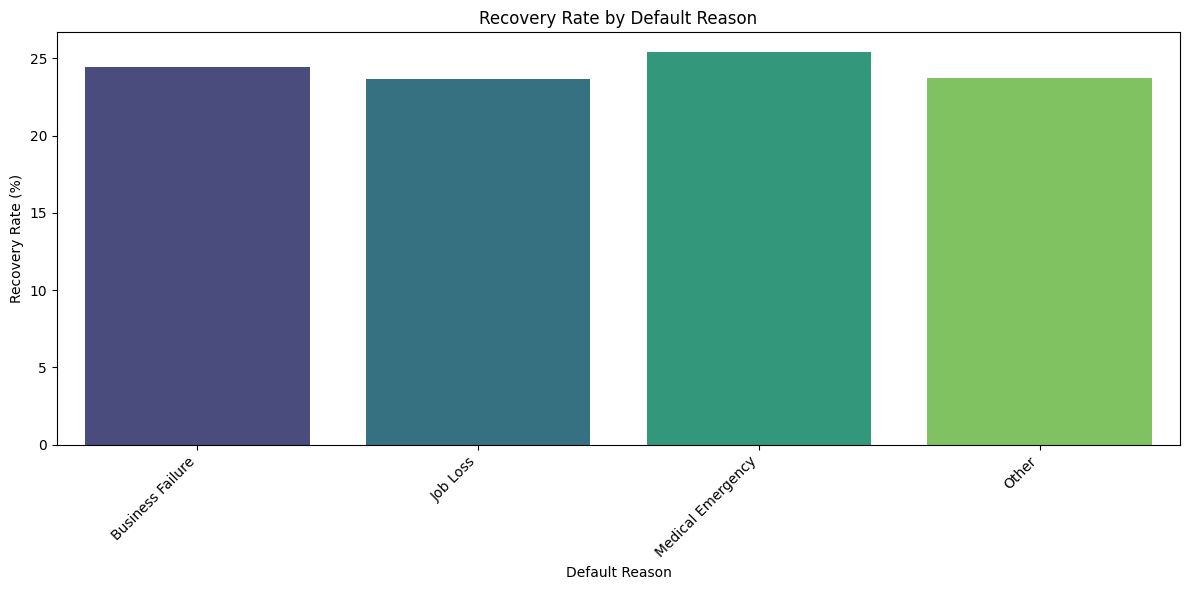


Recovery Rates by Legal Action:
  Legal_Action  Total_Default_Amount  Total_Recovery_Amount  Count  \
0           No           242087969.0               58458449   4550   
1          Yes           234719788.0               57461364   4450   

   Recovery_Rate  
0      24.147606  
1      24.480835  


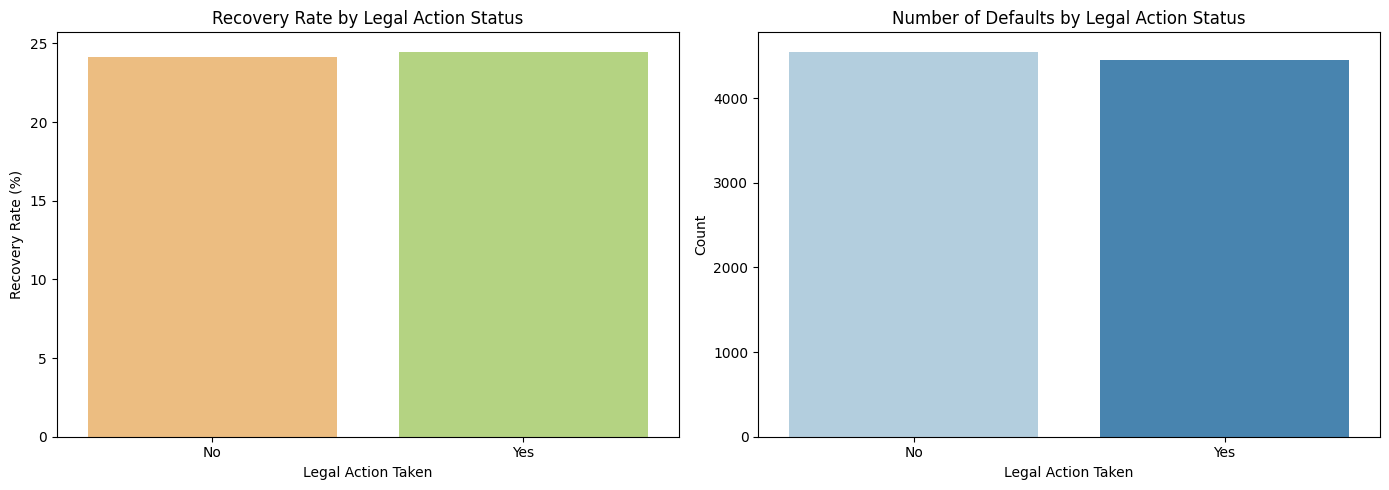

In [23]:
# Recovery rate by default reason
if "Default_Reason" in defaults.columns:
    recovery_by_reason = defaults.groupby("Default_Reason").agg({
        "Default_Amount": "sum",
        "Recovery_Amount": "sum"
    }).reset_index()
    
    recovery_by_reason["Recovery_Rate"] = (
        recovery_by_reason["Recovery_Amount"] / recovery_by_reason["Default_Amount"]
    ) * 100
    
    print("Recovery Rates by Default Reason:")
    print(recovery_by_reason)
    
    # Visualization
    plt.figure(figsize=(12,6))
    sns.barplot(x="Default_Reason", y="Recovery_Rate", data=recovery_by_reason, 
                hue="Default_Reason", palette="viridis", legend=False)
    plt.title("Recovery Rate by Default Reason")
    plt.xlabel("Default Reason")
    plt.ylabel("Recovery Rate (%)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Recovery rate by legal action
if "Legal_Action" in defaults.columns:
    recovery_by_legal = defaults.groupby("Legal_Action").agg({
        "Default_Amount": "sum",
        "Recovery_Amount": "sum",
        "Default_ID": "count"
    }).reset_index()
    
    recovery_by_legal.columns = ["Legal_Action", "Total_Default_Amount", "Total_Recovery_Amount", "Count"]
    recovery_by_legal["Recovery_Rate"] = (
        recovery_by_legal["Total_Recovery_Amount"] / recovery_by_legal["Total_Default_Amount"]
    ) * 100
    
    print("\nRecovery Rates by Legal Action:")
    print(recovery_by_legal)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    sns.barplot(x="Legal_Action", y="Recovery_Rate", data=recovery_by_legal, 
                hue="Legal_Action", palette="RdYlGn", ax=axes[0], legend=False)
    axes[0].set_title("Recovery Rate by Legal Action Status")
    axes[0].set_xlabel("Legal Action Taken")
    axes[0].set_ylabel("Recovery Rate (%)")
    
    sns.barplot(x="Legal_Action", y="Count", data=recovery_by_legal, 
                hue="Legal_Action", palette="Blues", ax=axes[1], legend=False)
    axes[1].set_title("Number of Defaults by Legal Action Status")
    axes[1].set_xlabel("Legal Action Taken")
    axes[1].set_ylabel("Count")
    
    plt.tight_layout()
    plt.show()

#### 7.3 Compare recovery rates across regions and branches

Index(['Region', 'Default_Amount', 'Recovery_Amount'], dtype='object')
Recovery Rates by Region:
      Region  Default_Amount  Recovery_Amount  Recovery_Rate
0    Central      60166820.0         14279370      23.732964
1       East      64656315.0         14484667      22.402556
2      North      62378265.0         15563080      24.949524
3  Northeast      59756404.0         14270424      23.880995
4      South      60965366.0         15766509      25.861419
5       West      64012891.0         14926765      23.318373


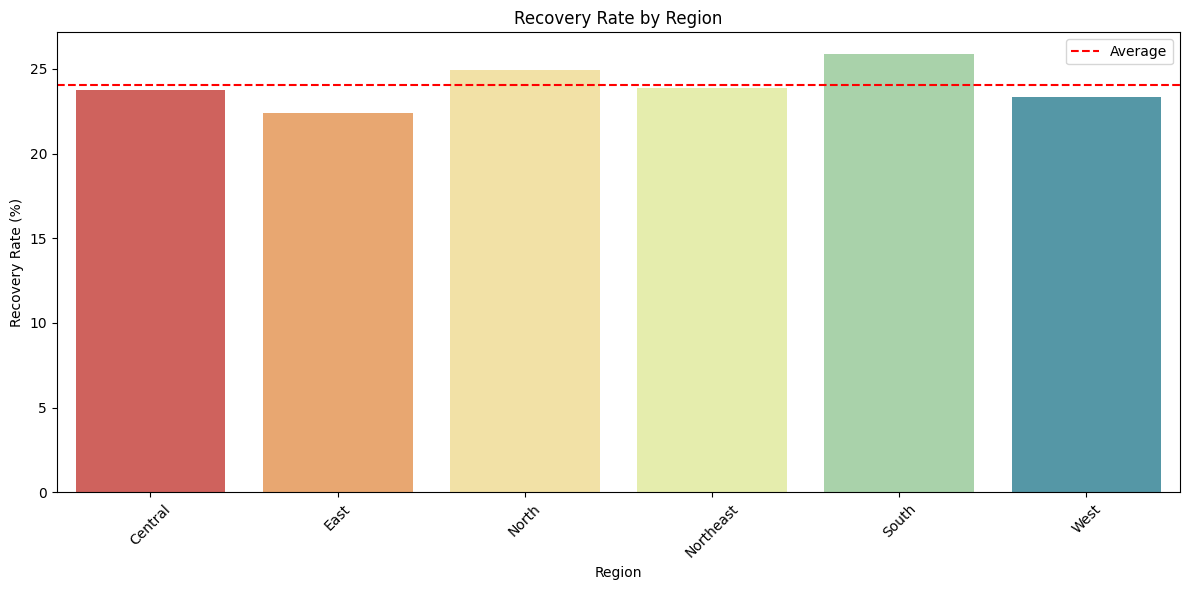


Top 15 Branches by Recovery Rate:
   Branch_ID  Recovery_Amount  Default_Amount  Recovery_Rate
44      B045         15766509      60965366.0      25.861419
4       B005         15766509      60965366.0      25.861419
38      B039         15766509      60965366.0      25.861419
32      B033         15766509      60965366.0      25.861419
30      B031         15766509      60965366.0      25.861419
10      B011         15766509      60965366.0      25.861419
22      B023         15766509      60965366.0      25.861419
20      B021         15766509      60965366.0      25.861419
25      B026         15563080      62378265.0      24.949524
16      B017         15563080      62378265.0      24.949524
48      B049         15563080      62378265.0      24.949524
39      B040         15563080      62378265.0      24.949524
36      B037         15563080      62378265.0      24.949524
24      B025         15563080      62378265.0      24.949524
18      B019         15563080      62378265.0     

In [24]:
# Regional recovery rates
# After first merge
regional_recovery = defaults.merge(
    loans[["Loan_ID", "Customer_ID"]],
    on="Loan_ID",
    how="left"
)

# Decide which Customer_ID to use
# If defaults' Customer_ID is correct:
regional_recovery = regional_recovery.rename(columns={"Customer_ID_x": "Customer_ID"})

# If loans' Customer_ID is correct:
# regional_recovery = regional_recovery.rename(columns={"Customer_ID_y": "Customer_ID"})

# Now merge with customers
regional_recovery = regional_recovery.merge(
    customers[["Customer_ID", "Region"]],
    on="Customer_ID",
    how="left"
).groupby("Region").agg({
    "Default_Amount": "sum",
    "Recovery_Amount": "sum"
}).reset_index()

print(regional_recovery.columns)


regional_recovery["Recovery_Rate"] = (
    regional_recovery["Recovery_Amount"] / regional_recovery["Default_Amount"]
) * 100

print("Recovery Rates by Region:")
print(regional_recovery)

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x="Region", y="Recovery_Rate", data=regional_recovery, 
            hue="Region", palette="Spectral", legend=False)
plt.title("Recovery Rate by Region")
plt.xlabel("Region")
plt.ylabel("Recovery Rate (%)")
plt.xticks(rotation=45)
plt.axhline(y=regional_recovery["Recovery_Rate"].mean(), color="red", linestyle="--", label="Average")
plt.legend()
plt.tight_layout()
plt.show()

# Branch recovery rates (top 15)
print("\nTop 15 Branches by Recovery Rate:")
print(branch_recovery_rate.head(15))

# 8. EMI Analysis

#### 8.1 Analyze relationship between EMI amounts and default probabilities

Default Rate by EMI Bracket:
  EMI_Bracket  Default_Count  Total_Count  Default_Rate
0        0-5K            251         2755      9.110708
1      5K-10K            451         4482     10.062472
2     10K-15K            400         4626      8.646779
3     15K-20K            450         4732      9.509721
4        20K+           6987        73405      9.518425

Correlation between EMI Amount and Default: 0.0027


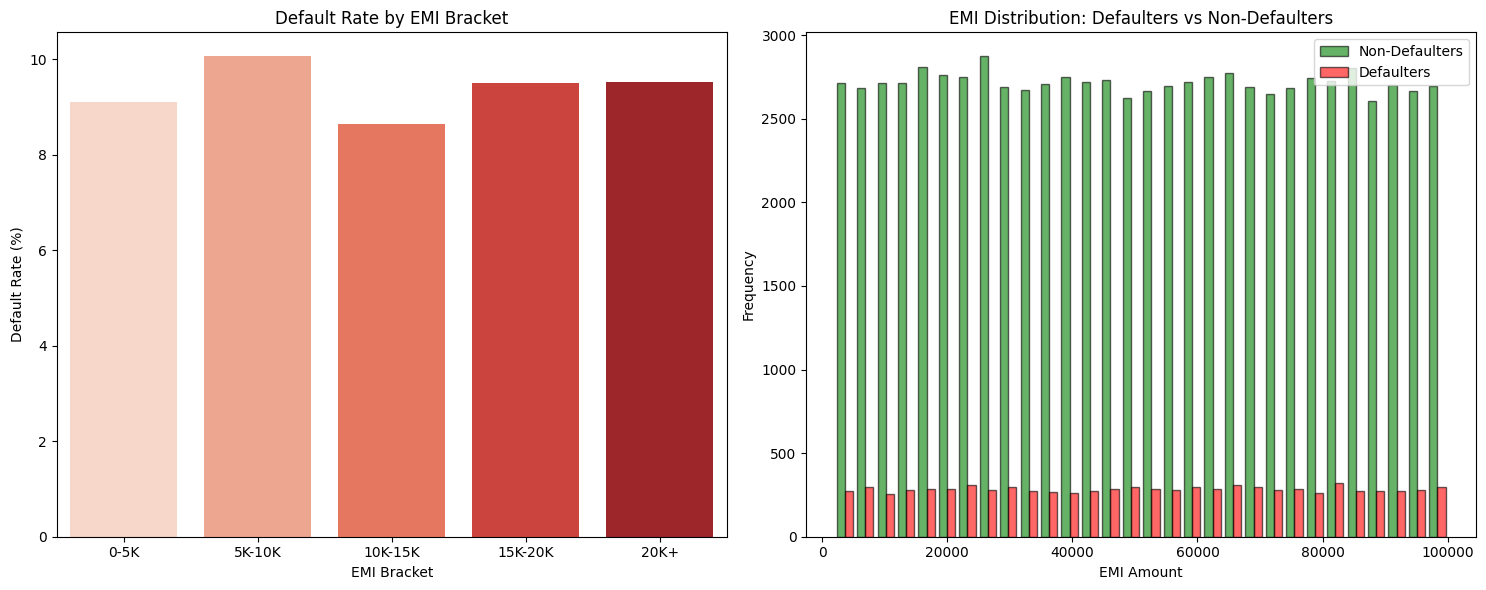

In [25]:
# EMI vs Default analysis
emi_default_data = loans.copy()
emi_default_data["Default_Flag"] = emi_default_data["Loan_ID"].isin(defaults["Loan_ID"]).astype(int)

# Create EMI brackets
emi_default_data["EMI_Bracket"] = pd.cut(
    emi_default_data["EMI_Amount"],
    bins=[0, 5000, 10000, 15000, 20000, float('inf')],
    labels=["0-5K", "5K-10K", "10K-15K", "15K-20K", "20K+"]
)

# Default rate by EMI bracket
emi_default_rate = emi_default_data.groupby(
    "EMI_Bracket", observed=False
).agg({
    "Default_Flag": ["sum", "count"]
}).reset_index()

emi_default_rate.columns = ["EMI_Bracket", "Default_Count", "Total_Count"]
emi_default_rate["Default_Rate"] = (emi_default_rate["Default_Count"] / emi_default_rate["Total_Count"]) * 100

print("Default Rate by EMI Bracket:")
print(emi_default_rate)

# Correlation between EMI and default
corr_emi_default = emi_default_data[["EMI_Amount", "Default_Flag"]].corr()
print(f"\nCorrelation between EMI Amount and Default: {corr_emi_default.iloc[0,1]:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Default rate by EMI bracket
sns.barplot(x="EMI_Bracket", y="Default_Rate", data=emi_default_rate, 
            hue="EMI_Bracket", palette="Reds", ax=axes[0], legend=False)
axes[0].set_title("Default Rate by EMI Bracket")
axes[0].set_xlabel("EMI Bracket")
axes[0].set_ylabel("Default Rate (%)")

# EMI distribution for defaulters vs non-defaulters
defaulters = emi_default_data[emi_default_data["Default_Flag"] == 1]["EMI_Amount"]
non_defaulters = emi_default_data[emi_default_data["Default_Flag"] == 0]["EMI_Amount"]

axes[1].hist([non_defaulters, defaulters], bins=30, label=["Non-Defaulters", "Defaulters"], 
             color=["green", "red"], alpha=0.6, edgecolor="black")
axes[1].set_title("EMI Distribution: Defaulters vs Non-Defaulters")
axes[1].set_xlabel("EMI Amount")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()

#### 8.2 Identify thresholds for EMI amounts where defaults are most likely

High-Risk EMI Brackets (Above Median Default Rate):
  EMI_Bracket  Default_Count  Total_Count  Default_Rate
1      5K-10K            451         4482     10.062472
4        20K+           6987        73405      9.518425

Default Rate by EMI-to-Income Ratio:
  Ratio_Bracket  Default_Count  Total_Count  Default_Rate
0         0-10%            617         6548      9.422724
1        10-20%            763         8486      8.991280
2        20-30%            777         8471      9.172471
3        30-40%            798         8363      9.542030
4          40%+           5584        58132      9.605725


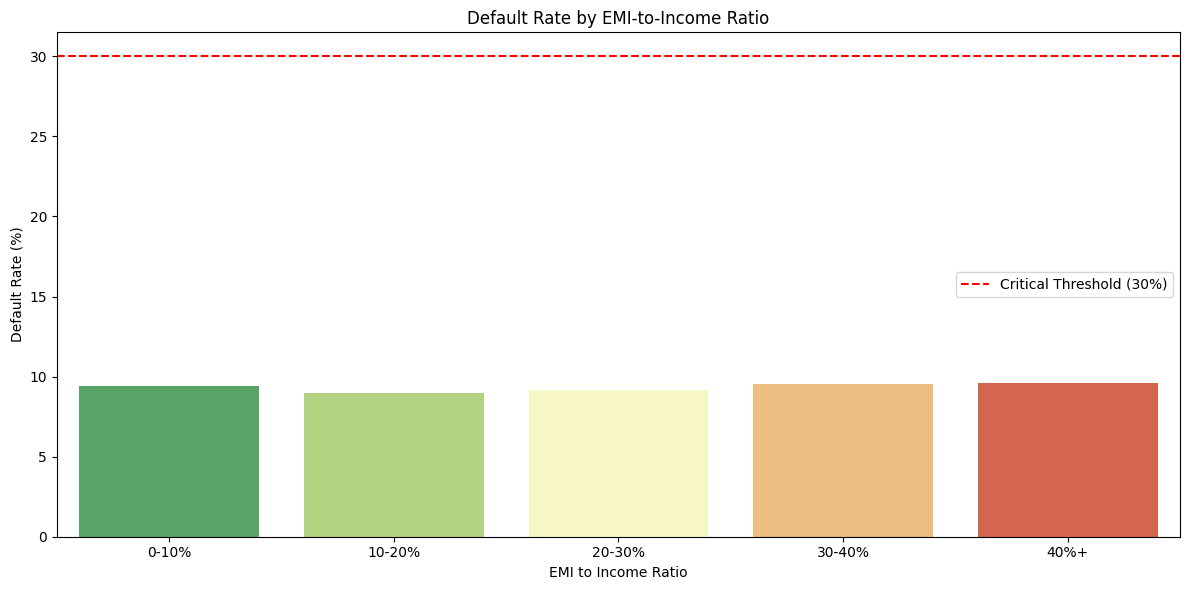

In [26]:
# Find high-risk EMI thresholds
high_risk_emi = emi_default_rate[emi_default_rate["Default_Rate"] > emi_default_rate["Default_Rate"].median()]
print("High-Risk EMI Brackets (Above Median Default Rate):")
print(high_risk_emi)

# EMI to Income Ratio analysis (if income data available)
emi_income_analysis = emi_default_data.merge(
    customers[["Customer_ID", "Annual_Income"]], 
    on="Customer_ID", 
    how="left"
)

emi_income_analysis["EMI_to_Income_Ratio"] = (
    emi_income_analysis["EMI_Amount"] * 12 / emi_income_analysis["Annual_Income"]
) * 100

# Default rate by EMI to Income ratio
emi_income_analysis["Ratio_Bracket"] = pd.cut(
    emi_income_analysis["EMI_to_Income_Ratio"],
    bins=[0, 10, 20, 30, 40, float('inf')],
    labels=["0-10%", "10-20%", "20-30%", "30-40%", "40%+"]
)

ratio_default_rate = emi_income_analysis.groupby(
    "Ratio_Bracket", observed=False
).agg({
    "Default_Flag": ["sum", "count"]
}).reset_index()

ratio_default_rate.columns = ["Ratio_Bracket", "Default_Count", "Total_Count"]
ratio_default_rate["Default_Rate"] = (ratio_default_rate["Default_Count"] / ratio_default_rate["Total_Count"]) * 100

print("\nDefault Rate by EMI-to-Income Ratio:")
print(ratio_default_rate)

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x="Ratio_Bracket", y="Default_Rate", data=ratio_default_rate, 
            hue="Ratio_Bracket", palette="RdYlGn_r", legend=False)
plt.title("Default Rate by EMI-to-Income Ratio")
plt.xlabel("EMI to Income Ratio")
plt.ylabel("Default Rate (%)")
plt.axhline(y=30, color="red", linestyle="--", label="Critical Threshold (30%)")
plt.legend()
plt.tight_layout()
plt.show()

#### 8.3 Compare EMI trends across loan types

EMI Statistics by Loan Purpose:
  Collateral_Details      Mean_EMI  Median_EMI       Std_EMI  Default_Rate
0           Property  50912.900823     50875.0  28272.264879      9.506779
1            Vehicle  50796.295700     50814.0  28278.722948      9.449557


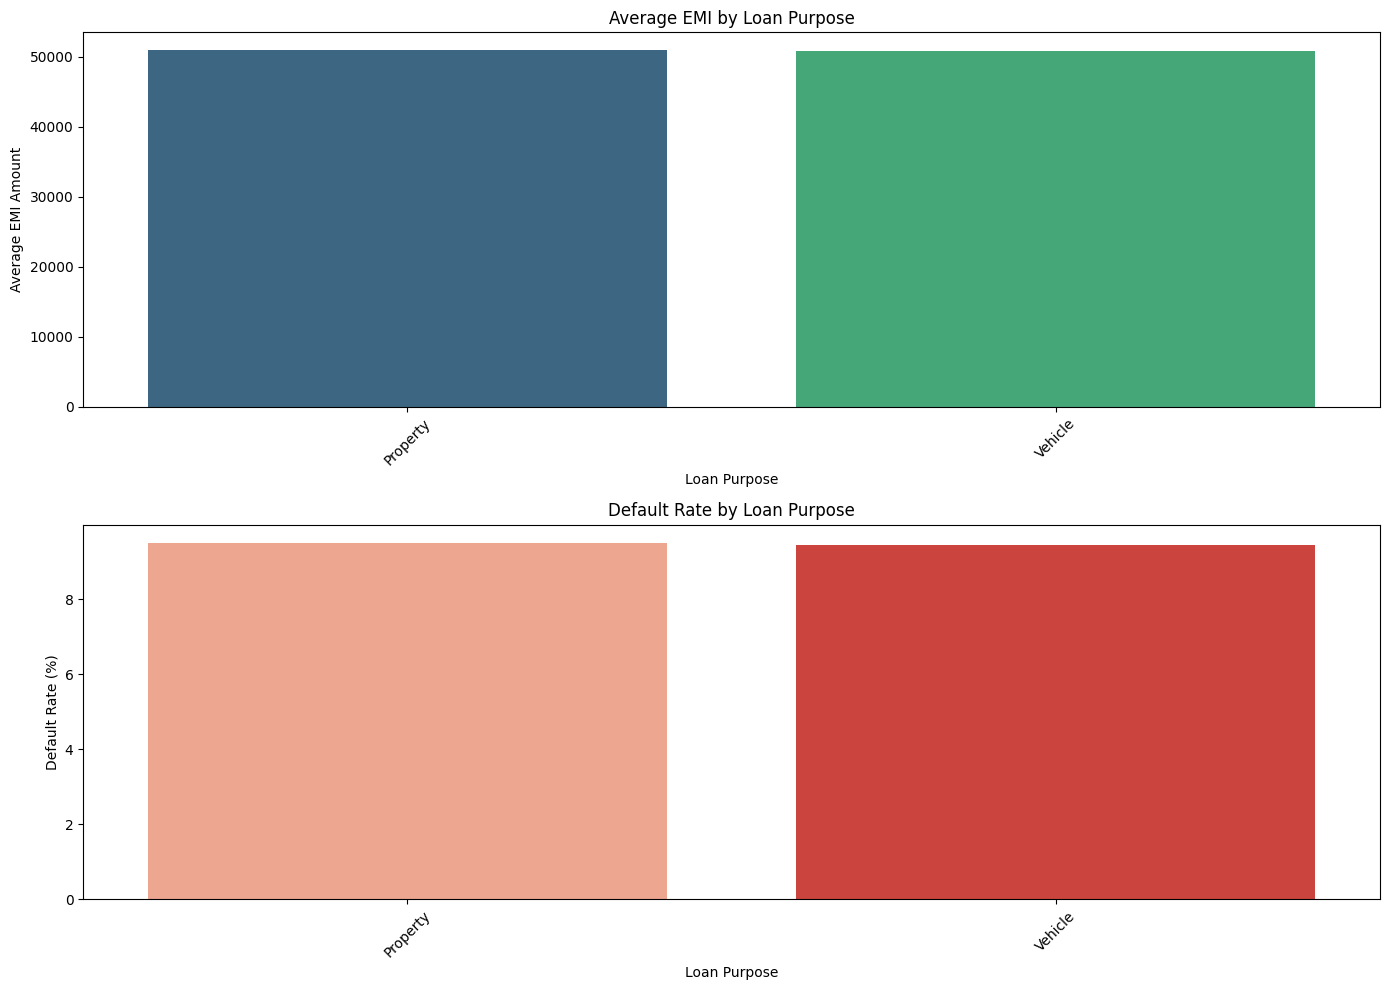

In [27]:
# EMI trends by loan purpose
if "Collateral_Details" in loans.columns:
    emi_by_purpose = emi_default_data.groupby("Collateral_Details").agg({
        "EMI_Amount": ["mean", "median", "std"],
        "Default_Flag": "mean"
    }).reset_index()
    
    emi_by_purpose.columns = ["Collateral_Details", "Mean_EMI", "Median_EMI", "Std_EMI", "Default_Rate"]
    emi_by_purpose["Default_Rate"] = emi_by_purpose["Default_Rate"] * 100
    
    print("EMI Statistics by Loan Purpose:")
    print(emi_by_purpose)
    
    # Visualization
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Average EMI by loan purpose
    sns.barplot(x="Collateral_Details", y="Mean_EMI", data=emi_by_purpose, 
                hue="Collateral_Details", palette="viridis", ax=axes[0], legend=False)
    axes[0].set_title("Average EMI by Loan Purpose")
    axes[0].set_xlabel("Loan Purpose")
    axes[0].set_ylabel("Average EMI Amount")
    axes[0].tick_params(axis='x', rotation=45)
    
    # Default rate by loan purpose
    sns.barplot(x="Collateral_Details", y="Default_Rate", data=emi_by_purpose, 
                hue="Collateral_Details", palette="Reds", ax=axes[1], legend=False)
    axes[1].set_title("Default Rate by Loan Purpose")
    axes[1].set_xlabel("Loan Purpose")
    axes[1].set_ylabel("Default Rate (%)")
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# 9. Loan Application Insights

#### 9.1 Calculate Approval and Rejection Rates

Total Applications: 82600
Approved: 70000 (84.75%)
Rejected: 12600 (15.25%)


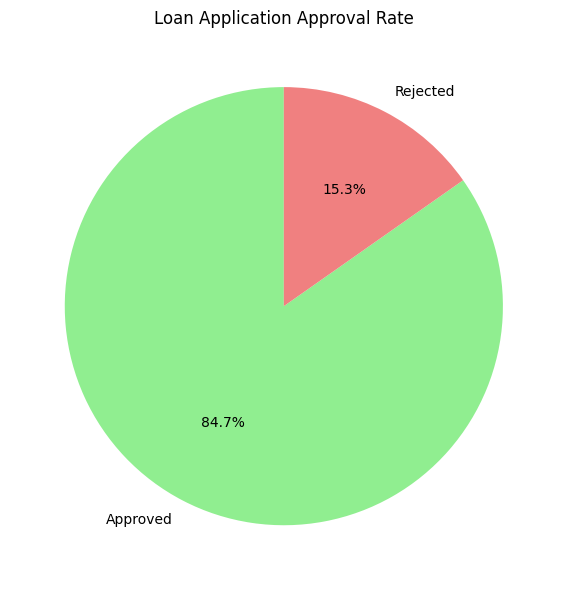

In [28]:
# Calculate approval and rejection rates
total_applications = len(applications)
approved = applications[applications["Approval_Status"] == "Approved"].shape[0]
rejected = applications[applications["Approval_Status"] == "Rejected"].shape[0]

approval_rate = (approved / total_applications) * 100
rejection_rate = (rejected / total_applications) * 100

print(f"Total Applications: {total_applications}")
print(f"Approved: {approved} ({approval_rate:.2f}%)")
print(f"Rejected: {rejected} ({rejection_rate:.2f}%)")

# Visualization - Pie chart
plt.figure(figsize=(8, 6))
colors = ["lightgreen", "lightcoral"]
plt.pie([approved, rejected], labels=["Approved", "Rejected"], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Loan Application Approval Rate")
plt.tight_layout()
plt.show()

#### 9.2 Identify Most Common Rejection Reasons

Top Rejection Reasons:
Rejection_Reason
Low Credit Score        4297
Incomplete Documents    4204
Insufficient Income     4099
Name: count, dtype: int64


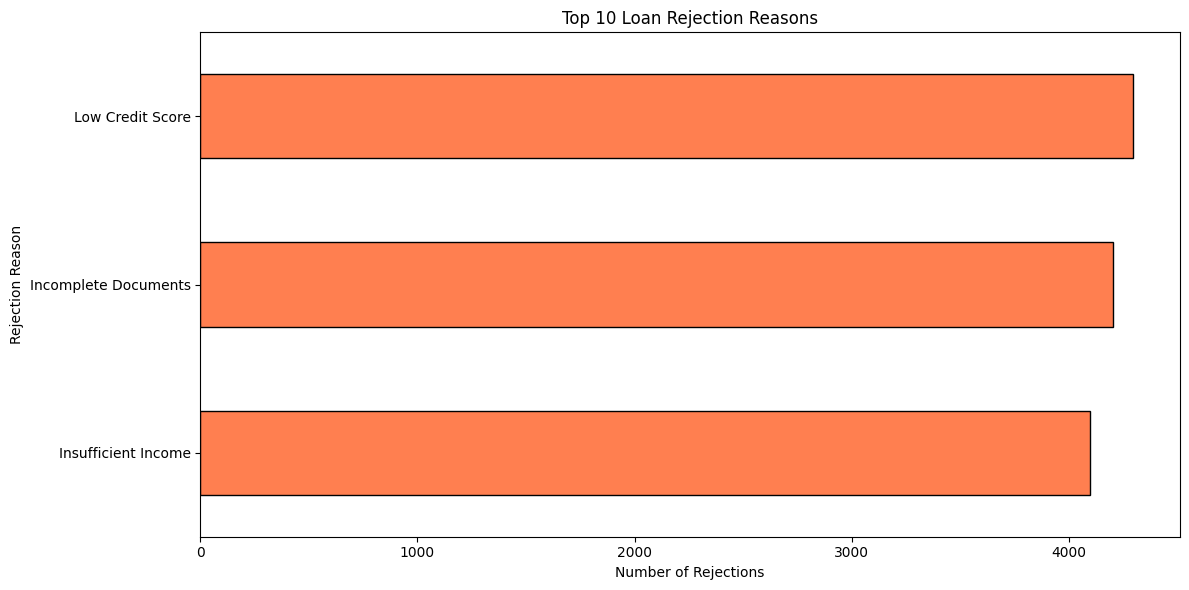

In [29]:
# Most common rejection reasons
if "Rejection_Reason" in applications.columns:
    rejection_reasons = applications[applications["Approval_Status"] == "Rejected"]["Rejection_Reason"].value_counts()
    print("Top Rejection Reasons:")
    print(rejection_reasons.head(10))
    
    # Visualization
    plt.figure(figsize=(12, 6))
    rejection_reasons.head(10).plot(kind="barh", color="coral", edgecolor="black")
    plt.title("Top 10 Loan Rejection Reasons")
    plt.xlabel("Number of Rejections")
    plt.ylabel("Rejection Reason")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("Rejection_Reason column not found in applications dataset")

#### 9.3 Compare Processing Fees Between Approved and Rejected Applications

Average Processing Fee by Approval Status:
  Approval_Status  Processing_Fee
0        Approved     5252.395014
1        Rejected     5255.141587


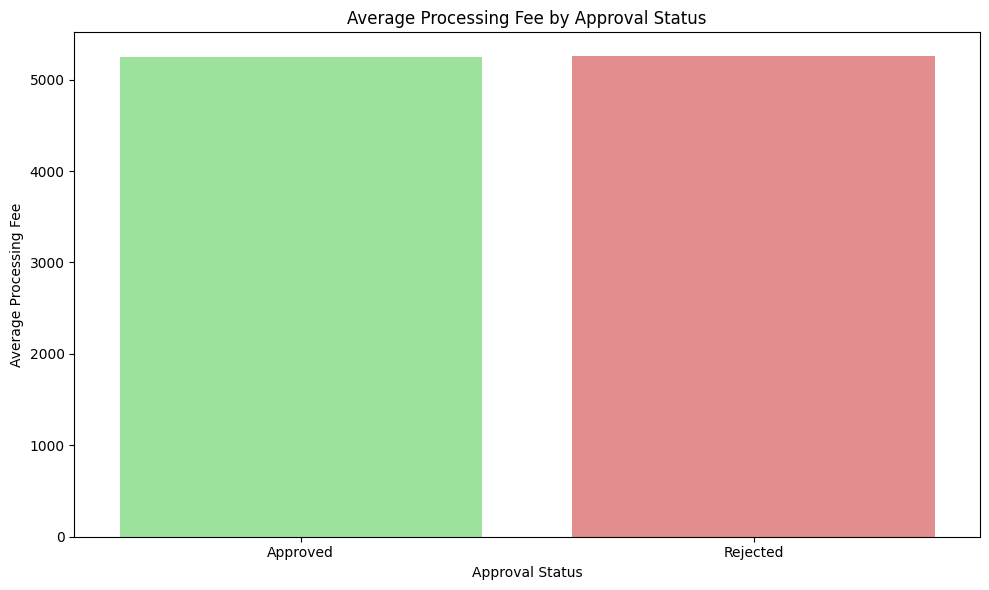

In [30]:
# Processing fee comparison
fee_comparison = applications.groupby("Approval_Status")["Processing_Fee"].mean().reset_index()
print("Average Processing Fee by Approval Status:")
print(fee_comparison)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x="Approval_Status", y="Processing_Fee", data=fee_comparison, 
            hue="Approval_Status", palette=["lightgreen", "lightcoral"], legend=False)
plt.title("Average Processing Fee by Approval Status")
plt.xlabel("Approval Status")
plt.ylabel("Average Processing Fee")
plt.tight_layout()
plt.show()

# 10. Recovery Effectiveness

#### 10.1 Determine the effectiveness of recovery efforts by calculating the ratio of Recovery_Amount to Default_Amount.

Total Default Amount: $476,807,757.00
Total Recovery Amount: $115,919,813.00
Overall Recovery Rate: 24.31%

Recovery Effectiveness Ratio: 0.2431


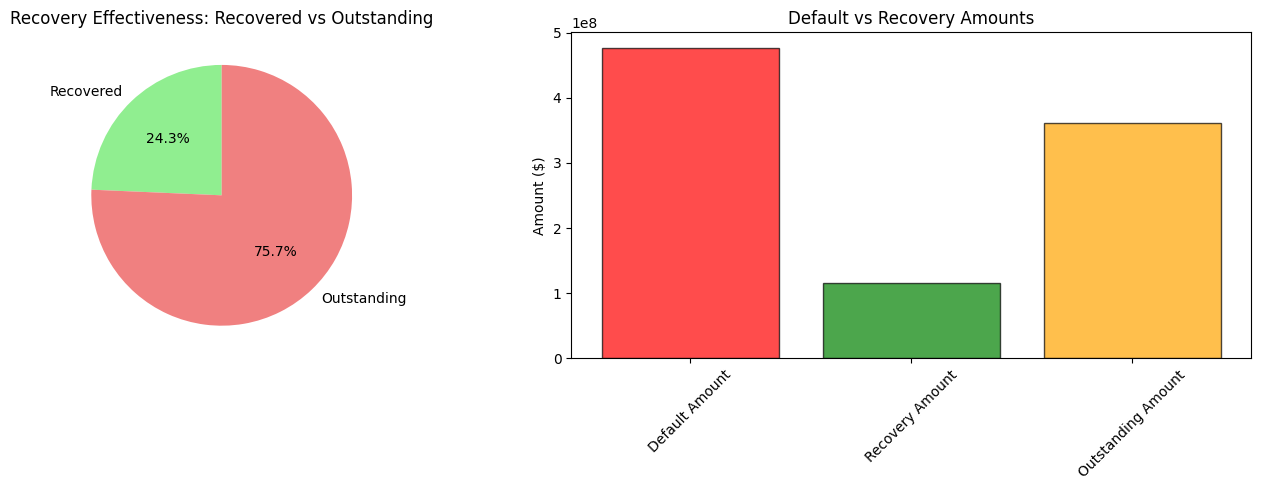

In [31]:
# Calculate overall recovery effectiveness
total_default_amount = defaults["Default_Amount"].sum()
total_recovery_amount = defaults["Recovery_Amount"].sum()
overall_recovery_rate = (total_recovery_amount / total_default_amount) * 100

print(f"Total Default Amount: ${total_default_amount:,.2f}")
print(f"Total Recovery Amount: ${total_recovery_amount:,.2f}")
print(f"Overall Recovery Rate: {overall_recovery_rate:.2f}%")
print(f"\nRecovery Effectiveness Ratio: {total_recovery_amount / total_default_amount:.4f}")

# Visualize recovery effectiveness
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart showing recovery vs outstanding
recovered = total_recovery_amount
outstanding = total_default_amount - total_recovery_amount
axes[0].pie([recovered, outstanding], labels=["Recovered", "Outstanding"], 
            autopct='%1.1f%%', colors=["lightgreen", "lightcoral"], startangle=90)
axes[0].set_title("Recovery Effectiveness: Recovered vs Outstanding")

# Bar chart showing amounts
categories = ["Default Amount", "Recovery Amount", "Outstanding Amount"]
amounts = [total_default_amount, total_recovery_amount, outstanding]
colors_bar = ["red", "green", "orange"]
axes[1].bar(categories, amounts, color=colors_bar, alpha=0.7, edgecolor="black")
axes[1].set_title("Default vs Recovery Amounts")
axes[1].set_ylabel("Amount ($)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 10.2 Compare Recovery Rates for Defaults With and Without Legal Actions

Recovery Effectiveness by Legal Action:
  Legal_Action  Total_Default  Total_Recovery  Case_Count  Recovery_Rate  \
0           No    242087969.0        58458449        4550      24.147606   
1          Yes    234719788.0        57461364        4450      24.480835   

   Avg_Recovery_Per_Case  
0           12848.010769  
1           12912.666067  


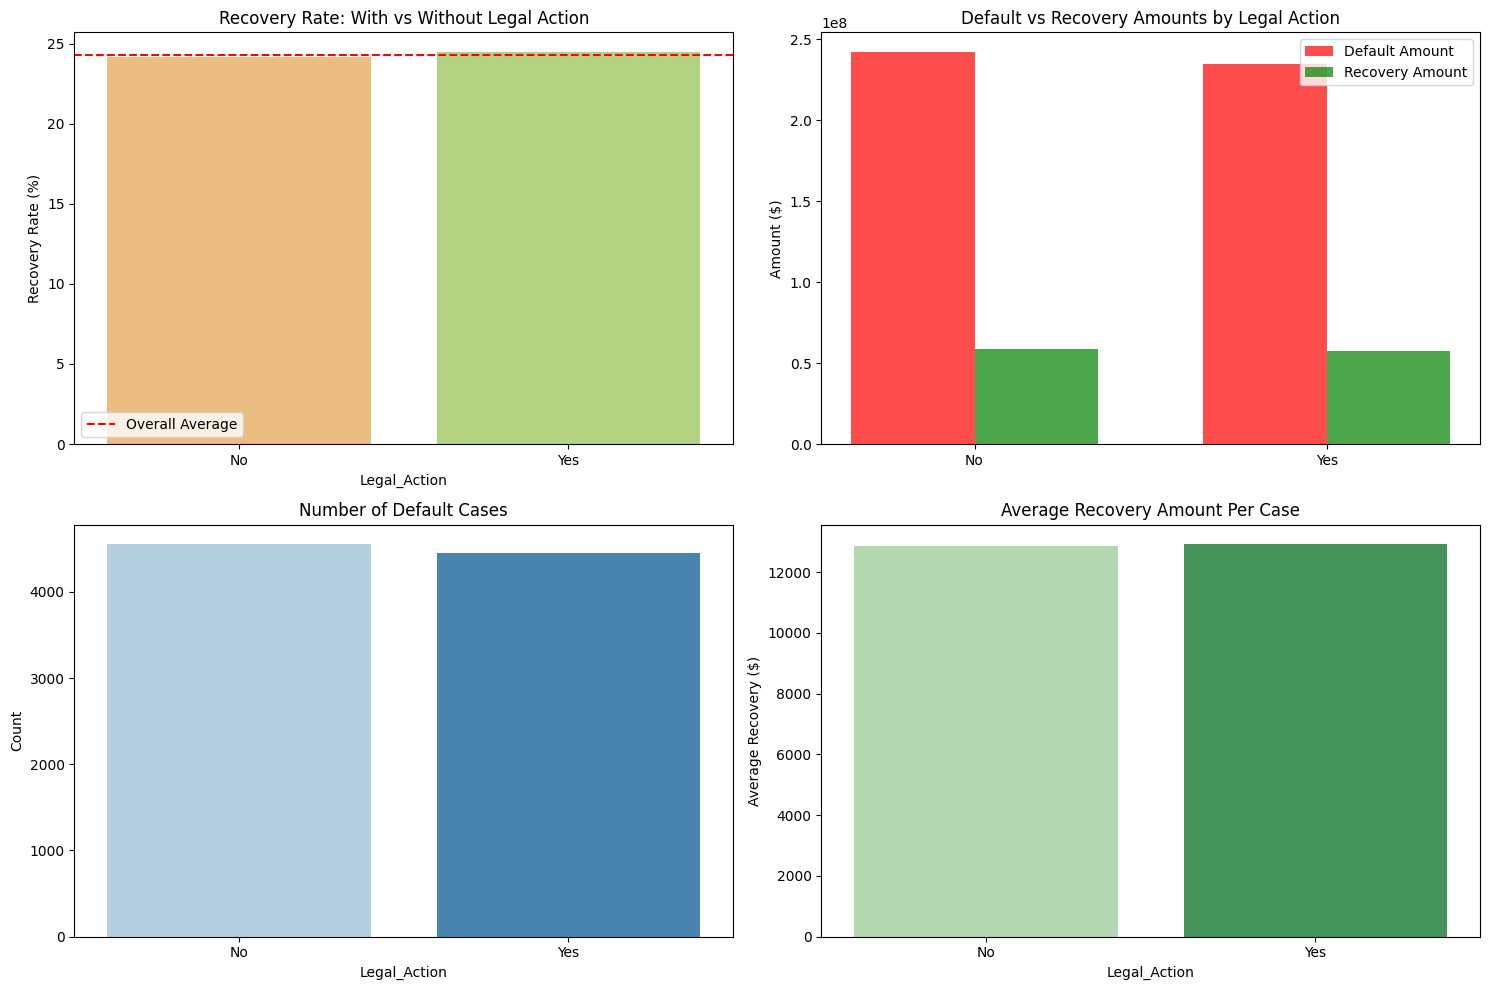

In [32]:
# Recovery effectiveness by legal action
if "Legal_Action" in defaults.columns:
    legal_effectiveness = defaults.groupby("Legal_Action").agg({
        "Default_Amount": "sum",
        "Recovery_Amount": "sum",
        "Default_ID": "count"
    }).reset_index()
    
    legal_effectiveness.columns = ["Legal_Action", "Total_Default", "Total_Recovery", "Case_Count"]
    legal_effectiveness["Recovery_Rate"] = (legal_effectiveness["Total_Recovery"] / legal_effectiveness["Total_Default"]) * 100
    legal_effectiveness["Avg_Recovery_Per_Case"] = legal_effectiveness["Total_Recovery"] / legal_effectiveness["Case_Count"]
    
    print("Recovery Effectiveness by Legal Action:")
    print(legal_effectiveness)
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Recovery rate comparison
    sns.barplot(x="Legal_Action", y="Recovery_Rate", data=legal_effectiveness, 
                hue="Legal_Action", palette="RdYlGn", ax=axes[0,0], legend=False)
    axes[0,0].set_title("Recovery Rate: With vs Without Legal Action")
    axes[0,0].set_ylabel("Recovery Rate (%)")
    axes[0,0].axhline(y=overall_recovery_rate, color="red", linestyle="--", label="Overall Average")
    axes[0,0].legend()
    
    # Total amounts comparison
    x = range(len(legal_effectiveness))
    width = 0.35
    axes[0,1].bar([i - width/2 for i in x], legal_effectiveness["Total_Default"], 
                  width, label="Default Amount", color="red", alpha=0.7)
    axes[0,1].bar([i + width/2 for i in x], legal_effectiveness["Total_Recovery"], 
                  width, label="Recovery Amount", color="green", alpha=0.7)
    axes[0,1].set_xticks(x)
    axes[0,1].set_xticklabels(legal_effectiveness["Legal_Action"])
    axes[0,1].set_title("Default vs Recovery Amounts by Legal Action")
    axes[0,1].set_ylabel("Amount ($)")
    axes[0,1].legend()
    
    # Case count
    sns.barplot(x="Legal_Action", y="Case_Count", data=legal_effectiveness, 
                hue="Legal_Action", palette="Blues", ax=axes[1,0], legend=False)
    axes[1,0].set_title("Number of Default Cases")
    axes[1,0].set_ylabel("Count")
    
    # Average recovery per case
    sns.barplot(x="Legal_Action", y="Avg_Recovery_Per_Case", data=legal_effectiveness, 
                hue="Legal_Action", palette="Greens", ax=axes[1,1], legend=False)
    axes[1,1].set_title("Average Recovery Amount Per Case")
    axes[1,1].set_ylabel("Average Recovery ($)")
    
    plt.tight_layout()
    plt.show()
else:
    print("Legal_Action column not found in defaults dataset")

#### 10.3 Analyze Branch-wise Recovery Performance

Top 10 Branches by Recovery Effectiveness:
   Branch_ID  Total_Default  Total_Recovery  Case_Count  Recovery_Rate
44      B045     60965366.0        15766509        1161      25.861419
4       B005     60965366.0        15766509        1161      25.861419
38      B039     60965366.0        15766509        1161      25.861419
32      B033     60965366.0        15766509        1161      25.861419
30      B031     60965366.0        15766509        1161      25.861419
10      B011     60965366.0        15766509        1161      25.861419
22      B023     60965366.0        15766509        1161      25.861419
20      B021     60965366.0        15766509        1161      25.861419
25      B026     62378265.0        15563080        1169      24.949524
16      B017     62378265.0        15563080        1169      24.949524

Bottom 10 Branches by Recovery Effectiveness:
   Branch_ID  Total_Default  Total_Recovery  Case_Count  Recovery_Rate
11      B012     64012891.0        14926765        1171   

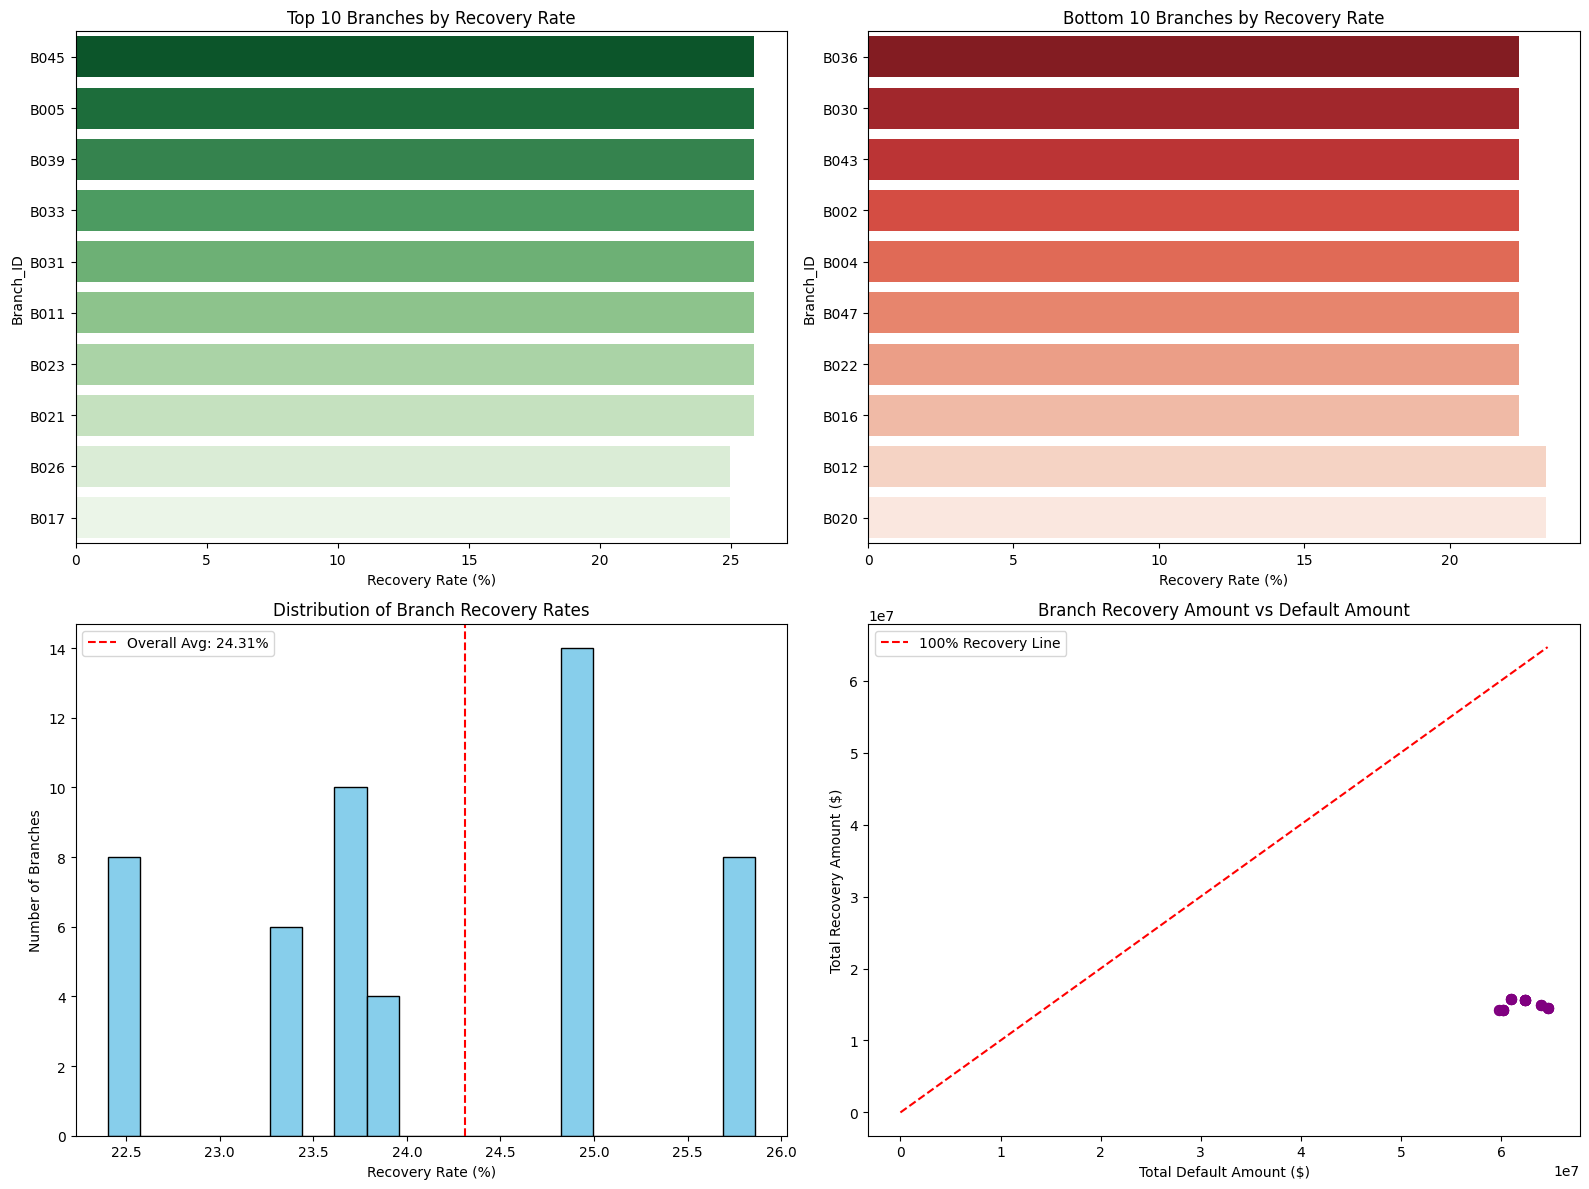

In [33]:
# Branch-wise recovery performance
# After first merge
branch_recovery = defaults.merge(
    loans[["Loan_ID", "Customer_ID"]],
    on="Loan_ID",
    how="left"
)

# Decide which Customer_ID to use
# If defaults' Customer_ID is correct:
branch_recovery = branch_recovery.rename(columns={"Customer_ID_x": "Customer_ID"})

# If loans' Customer_ID is correct:
# branch_recovery = branch_recovery.rename(columns={"Customer_ID_y": "Customer_ID"})

# Now merge with customers
branch_recovery = branch_recovery.merge(
    customers[["Customer_ID", "Region"]],
    on="Customer_ID",
    how="left"
).merge(
    branches[["Branch_ID", "Region"]],
    on="Region",
    how="left"
)

branch_recovery = branch_recovery.groupby("Branch_ID").agg({
    "Default_Amount": "sum",
    "Recovery_Amount": "sum",
    "Default_ID": "count"
}).reset_index()

branch_recovery.columns = ["Branch_ID", "Total_Default", "Total_Recovery", "Case_Count"]
branch_recovery["Recovery_Rate"] = (branch_recovery["Total_Recovery"] / branch_recovery["Total_Default"]) * 100
branch_recovery = branch_recovery.sort_values("Recovery_Rate", ascending=False)

print("Top 10 Branches by Recovery Effectiveness:")
print(branch_recovery.head(10))

print("\nBottom 10 Branches by Recovery Effectiveness:")
print(branch_recovery.tail(10))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 10 branches by recovery rate
top_10_branches = branch_recovery.head(10)
sns.barplot(x="Recovery_Rate", y="Branch_ID", data=top_10_branches, hue="Branch_ID",
            palette="Greens_r", ax=axes[0,0], legend=False)
axes[0,0].set_title("Top 10 Branches by Recovery Rate")
axes[0,0].set_xlabel("Recovery Rate (%)")

# Bottom 10 branches by recovery rate
bottom_10_branches = branch_recovery.tail(10).sort_values("Recovery_Rate")
sns.barplot(x="Recovery_Rate", y="Branch_ID", data=bottom_10_branches, hue="Branch_ID", 
            palette="Reds_r", ax=axes[0,1])
axes[0,1].set_title("Bottom 10 Branches by Recovery Rate")
axes[0,1].set_xlabel("Recovery Rate (%)")

# Recovery rate distribution
axes[1,0].hist(branch_recovery["Recovery_Rate"], bins=20, color="skyblue", edgecolor="black")
axes[1,0].axvline(x=overall_recovery_rate, color="red", linestyle="--", 
                  label=f"Overall Avg: {overall_recovery_rate:.2f}%")
axes[1,0].set_title("Distribution of Branch Recovery Rates")
axes[1,0].set_xlabel("Recovery Rate (%)")
axes[1,0].set_ylabel("Number of Branches")
axes[1,0].legend()

# Scatter: Recovery amount vs Default amount by branch
axes[1,1].scatter(branch_recovery["Total_Default"], branch_recovery["Total_Recovery"], 
                  alpha=0.6, s=50, color="purple")
axes[1,1].set_title("Branch Recovery Amount vs Default Amount")
axes[1,1].set_xlabel("Total Default Amount ($)")
axes[1,1].set_ylabel("Total Recovery Amount ($)")
axes[1,1].plot([0, branch_recovery["Total_Default"].max()], 
               [0, branch_recovery["Total_Default"].max()], 
               'r--', label="100% Recovery Line")
axes[1,1].legend()

plt.tight_layout()
plt.show()

# 11. Loan Disbursement Efficiency

#### 11.1 Analyze Time from Application to Loan Disbursement and Identify Bottlenecks

Average Disbursement Time: -3.20 days
Median Disbursement Time: -3.00 days
Min Disbursement Time: -1825 days
Max Disbursement Time: 1809 days


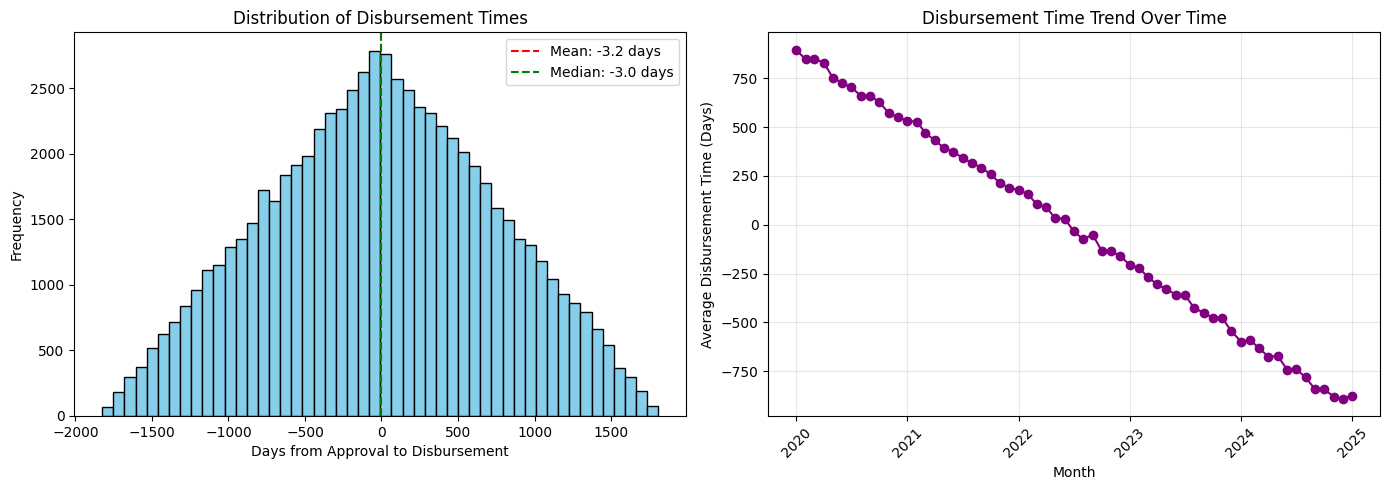

In [34]:
# Merge applications with loans to get disbursement dates
disbursement_efficiency = applications[applications["Approval_Status"] == "Approved"].merge(
    loans[["Loan_ID", "Disbursal_Date"]], 
    on="Loan_ID", 
    how="left"
)

# Calculate disbursement time
disbursement_efficiency["Disbursement_Time"] = (
    disbursement_efficiency["Disbursal_Date"] - disbursement_efficiency["Approval_Date"]
).dt.days

# Overall statistics
avg_disbursement_time = disbursement_efficiency["Disbursement_Time"].mean()
median_disbursement_time = disbursement_efficiency["Disbursement_Time"].median()

print(f"Average Disbursement Time: {avg_disbursement_time:.2f} days")
print(f"Median Disbursement Time: {median_disbursement_time:.2f} days")
print(f"Min Disbursement Time: {disbursement_efficiency['Disbursement_Time'].min()} days")
print(f"Max Disbursement Time: {disbursement_efficiency['Disbursement_Time'].max()} days")

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of disbursement times
axes[0].hist(disbursement_efficiency["Disbursement_Time"], bins=50, color="skyblue", edgecolor="black")
axes[0].axvline(avg_disbursement_time, color="red", linestyle="--", label=f"Mean: {avg_disbursement_time:.1f} days")
axes[0].axvline(median_disbursement_time, color="green", linestyle="--", label=f"Median: {median_disbursement_time:.1f} days")
axes[0].set_title("Distribution of Disbursement Times")
axes[0].set_xlabel("Days from Approval to Disbursement")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# Disbursement time trend over time
monthly_disbursement_time = disbursement_efficiency.copy()
monthly_disbursement_time["Month"] = monthly_disbursement_time["Approval_Date"].dt.to_period("M")
time_trend = monthly_disbursement_time.groupby("Month")["Disbursement_Time"].mean().reset_index()
time_trend["Month"] = time_trend["Month"].dt.to_timestamp()

axes[1].plot(time_trend["Month"], time_trend["Disbursement_Time"], marker="o", color="purple")
axes[1].set_title("Disbursement Time Trend Over Time")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Average Disbursement Time (Days)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### 11.2 Compare Average Processing Times Across Branches

Top 10 Most Efficient Branches (Fastest Disbursement):
   Branch_ID    Avg_Time  Median_Time  Loan_Count
43      B044  165.453588        168.0       11484
23      B024  165.453588        168.0       11484
28      B029  165.453588        168.0       11484
33      B034  165.453588        168.0       11484
34      B035  165.453588        168.0       11484
45      B046  165.453588        168.0       11484
7       B008  165.453588        168.0       11484
27      B028  165.453588        168.0       11484
47      B048  165.453588        168.0       11484
2       B003  165.453588        168.0       11484

Bottom 10 Branches (Slowest Disbursement - Bottlenecks):
   Branch_ID    Avg_Time  Median_Time  Loan_Count
18      B019  181.782092        188.0       11693
16      B017  181.782092        188.0       11693
14      B015  181.782092        188.0       11693
13      B014  181.782092        188.0       11693
12      B013  181.782092        188.0       11693
8       B009  181.782092        188.0

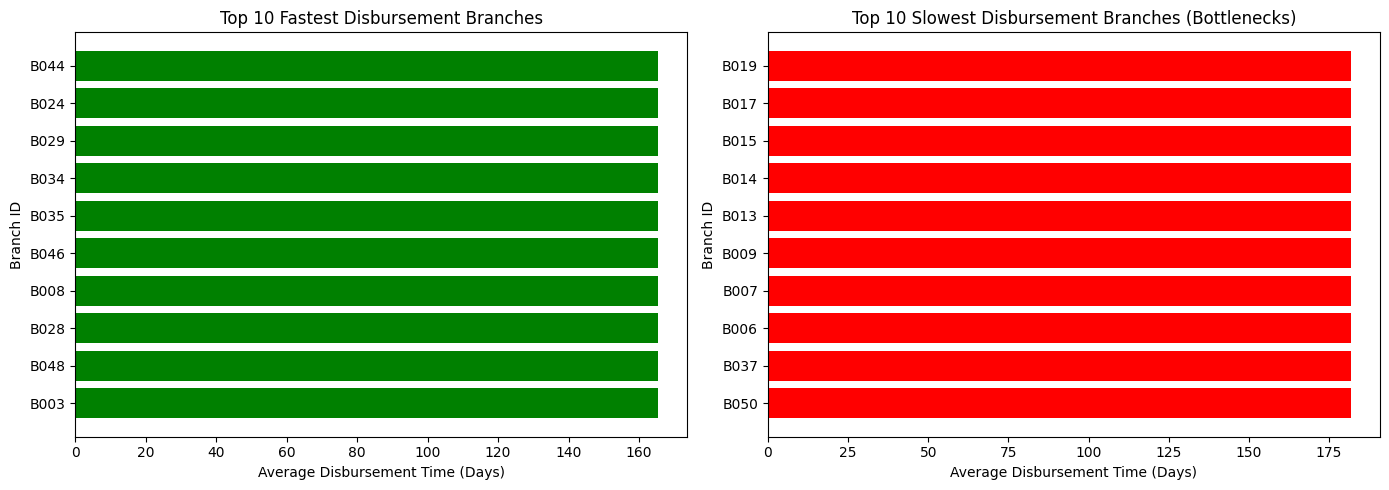

In [35]:
# Merge applications with loans
disbursement_efficiency = applications[applications["Approval_Status"] == "Approved"].merge(
    loans[["Loan_ID", "Disbursal_Date"]],
    on="Loan_ID",
    how="left"
)

# Compute disbursement time
disbursement_efficiency["Application_Date"] = pd.to_datetime(disbursement_efficiency["Application_Date"], errors="coerce")
disbursement_efficiency["Disbursal_Date"] = pd.to_datetime(disbursement_efficiency["Disbursal_Date"], errors="coerce")

disbursement_efficiency["Disbursement_Time"] = (
    disbursement_efficiency["Disbursal_Date"] - disbursement_efficiency["Application_Date"]
).dt.days

# Attach branch info Merge with customers (to get region) and branches (to map region → branch)
branch_disbursement_time = disbursement_efficiency.merge(
    customers[["Customer_ID", "Region"]],
    on="Customer_ID",
    how="left"
).merge(
    branches[["Branch_ID", "Region"]],
    on="Region",
    how="left"
)

# Aggregate by branch
branch_time_stats = branch_disbursement_time.groupby("Branch_ID")["Disbursement_Time"].agg(
    Avg_Time="mean",
    Median_Time="median",
    Loan_Count="count"
).reset_index()

branch_time_stats = branch_time_stats.sort_values("Avg_Time")

print("Top 10 Most Efficient Branches (Fastest Disbursement):")
print(branch_time_stats.head(10))

print("\nBottom 10 Branches (Slowest Disbursement - Bottlenecks):")
print(branch_time_stats.tail(10))

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Top 10 fastest branches
top_10_fast = branch_time_stats.head(10)
axes[0].barh(top_10_fast["Branch_ID"].astype(str), top_10_fast["Avg_Time"], color="green")
axes[0].set_title("Top 10 Fastest Disbursement Branches")
axes[0].set_xlabel("Average Disbursement Time (Days)")
axes[0].set_ylabel("Branch ID")
axes[0].invert_yaxis()

# Bottom 10 slowest branches
bottom_10_slow = branch_time_stats.tail(10)
axes[1].barh(bottom_10_slow["Branch_ID"].astype(str), bottom_10_slow["Avg_Time"], color="red")
axes[1].set_title("Top 10 Slowest Disbursement Branches (Bottlenecks)")
axes[1].set_xlabel("Average Disbursement Time (Days)")
axes[1].set_ylabel("Branch ID")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

#### 11.3 Evaluate Disbursement Trends by Loan Purpose and Region

Average Disbursement Time by Loan Purpose:
  Collateral_Details  Disbursement_Time
1            Vehicle         168.534547
0           Property         174.014835


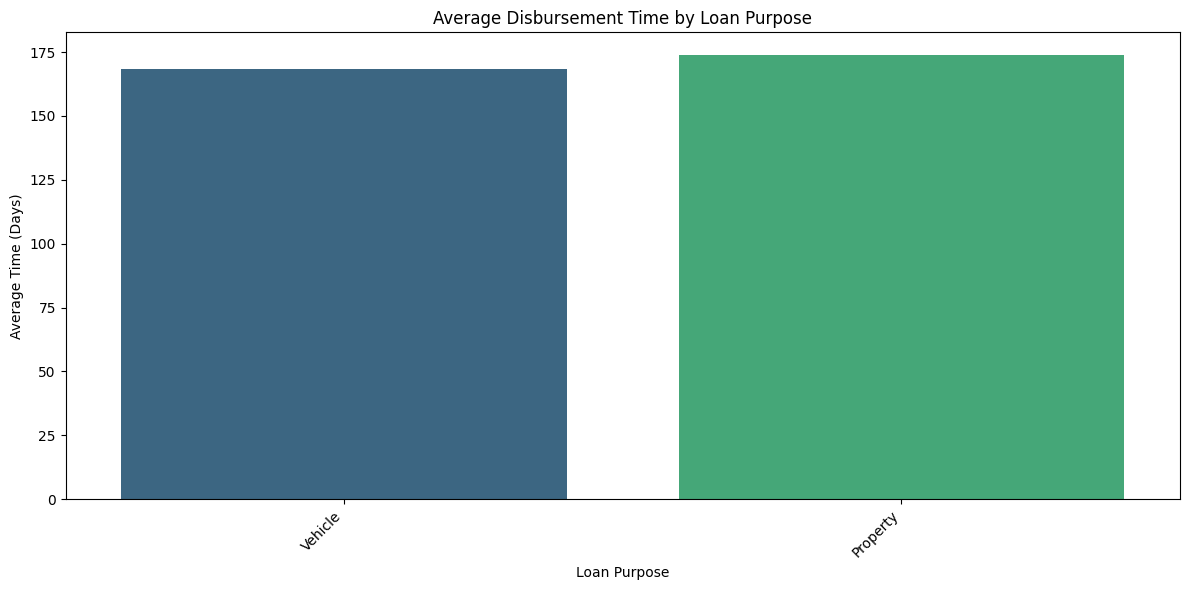


Average Disbursement Time by Region:
      Region    Avg_Time  Median_Time  Loan_Count
0    Central  165.453588        168.0      114840
1       East  169.508699        157.5       94720
4      South  169.964289        163.0       93192
3  Northeast  172.130946        166.0       46584
5       West  174.216119        181.0       70128
2      North  181.782092        188.0      163702


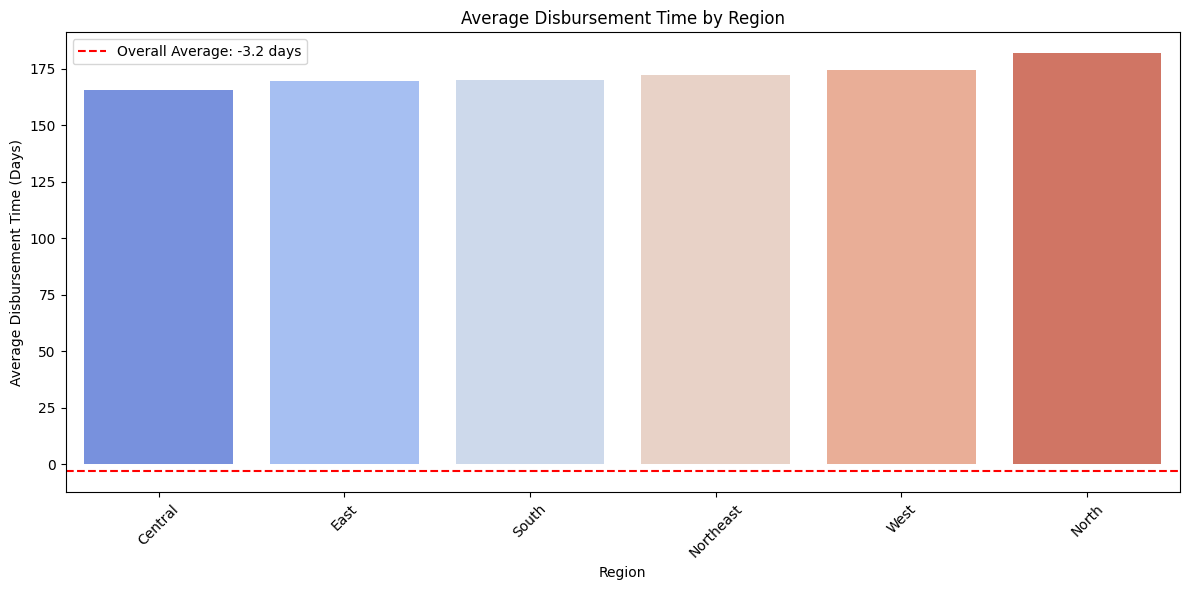

In [36]:
# Disbursement by loan purpose
if "Collateral_Details" in loans.columns:
    purpose_disbursement = disbursement_efficiency.merge(
        loans[["Loan_ID", "Collateral_Details"]], 
        on="Loan_ID", 
        how="left"
    )
    
    purpose_time = purpose_disbursement.groupby("Collateral_Details")["Disbursement_Time"].mean().reset_index()
    purpose_time = purpose_time.sort_values("Disbursement_Time")
    
    print("Average Disbursement Time by Loan Purpose:")
    print(purpose_time)
    
    plt.figure(figsize=(12,6))
    sns.barplot(x="Collateral_Details", y="Disbursement_Time", data=purpose_time, 
                hue="Collateral_Details", palette="viridis", legend=False)
    plt.title("Average Disbursement Time by Loan Purpose")
    plt.xlabel("Loan Purpose")
    plt.ylabel("Average Time (Days)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Disbursement by region
regional_disbursement_time = branch_disbursement_time.groupby("Region")["Disbursement_Time"].agg([
    "mean", "median", "count"
]).reset_index()
regional_disbursement_time.columns = ["Region", "Avg_Time", "Median_Time", "Loan_Count"]
regional_disbursement_time = regional_disbursement_time.sort_values("Avg_Time")

print("\nAverage Disbursement Time by Region:")
print(regional_disbursement_time)

plt.figure(figsize=(12,6))
sns.barplot(x="Region", y="Avg_Time", data=regional_disbursement_time, 
            hue="Region", palette="coolwarm", legend=False)
plt.title("Average Disbursement Time by Region")
plt.xlabel("Region")
plt.ylabel("Average Disbursement Time (Days)")
plt.axhline(y=avg_disbursement_time, color="red", linestyle="--", label=f"Overall Average: {avg_disbursement_time:.1f} days")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 12. Profitability Analysis

#### 12.1 Calculate Total Interest Income Across All Loans

In [37]:
# Calculate total interest income
# Interest Income = (Loan_Amount * Interest_Rate * Loan_Term) / (12 * 100)
loans["Interest_Income"] = (loans["Loan_Amount"] * loans["Interest_Rate"] * loans["Loan_Term"]) / (12 * 100)

total_interest_income = loans["Interest_Income"].sum()
avg_interest_income = loans["Interest_Income"].mean()

print(f"Total Interest Income: ${total_interest_income:,.2f}")
print(f"Average Interest Income per Loan: ${avg_interest_income:,.2f}")

Total Interest Income: $75,037,526,934.92
Average Interest Income per Loan: $833,750.30


#### 12.2 Identify Most Profitable Loan Purposes Based on Interest Earnings


Profitability by Loan Purpose:
  Collateral_Details  Total_Interest   Avg_Interest  Loan_Count  \
0           Property    5.022434e+10  835470.946582       60115   
1            Vehicle    2.481319e+10  830289.141080       29885   

   Total_Loan_Amount  Profit_Margin  
0       1.511985e+11       33.21748  
1       7.526477e+10       32.96787  


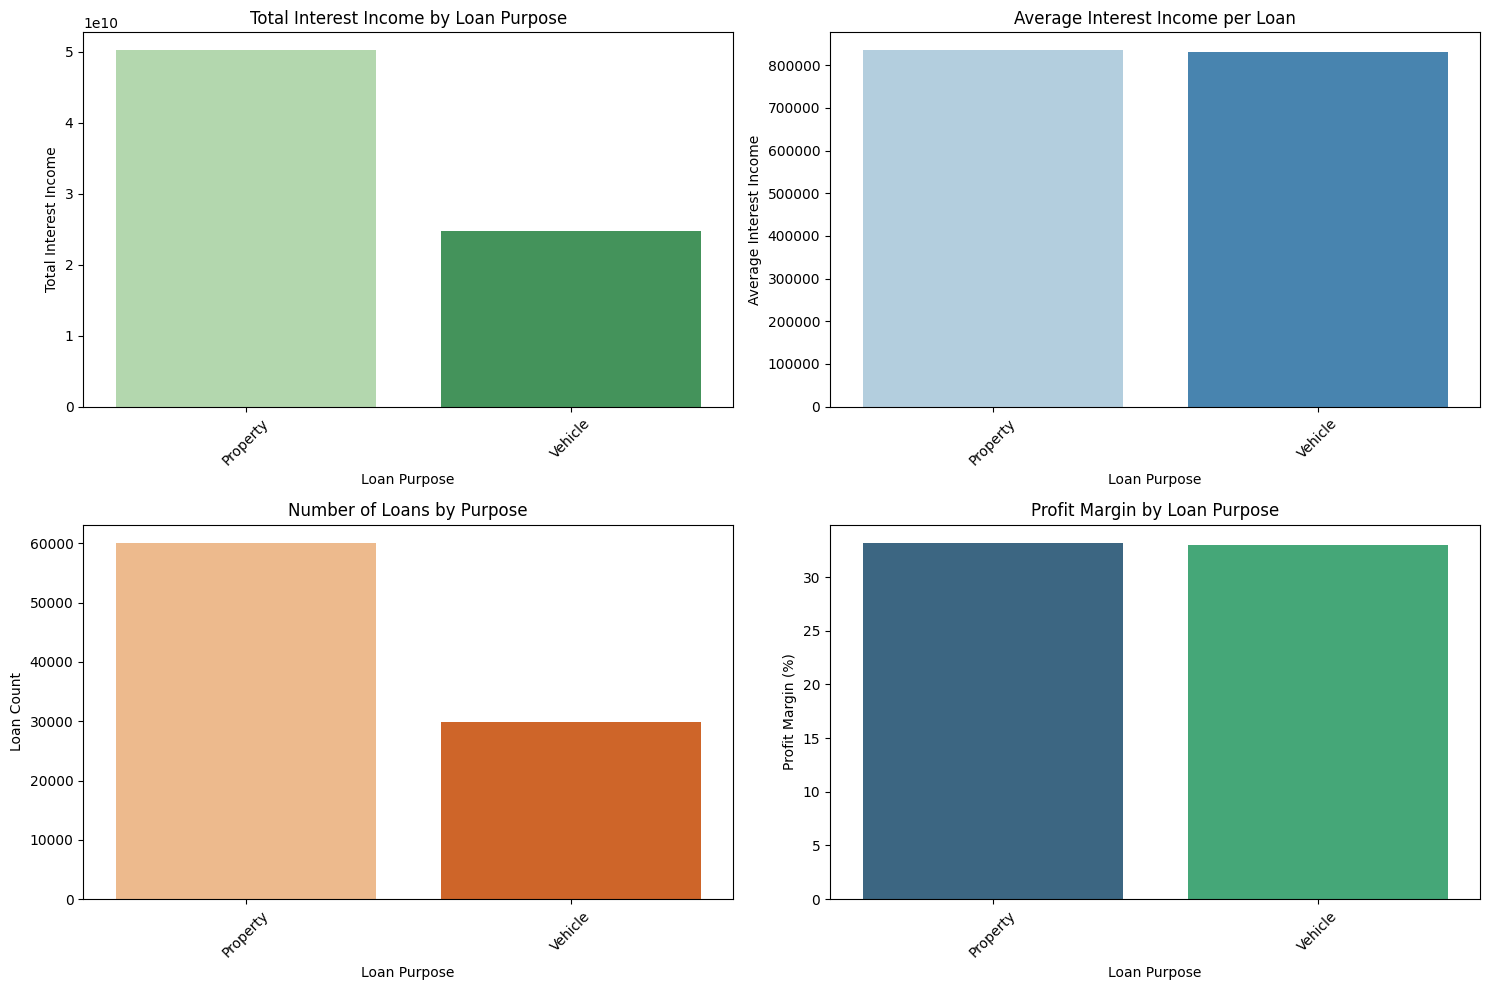

In [38]:
# Profitability by loan purpose
if "Collateral_Details" in loans.columns:
    purpose_profitability = loans.groupby("Collateral_Details").agg({
        "Interest_Income": ["sum", "mean", "count"],
        "Loan_Amount": "sum"
    }).reset_index()
    
    purpose_profitability.columns = ["Collateral_Details", "Total_Interest", "Avg_Interest", "Loan_Count", "Total_Loan_Amount"]
    purpose_profitability["Profit_Margin"] = (purpose_profitability["Total_Interest"] / purpose_profitability["Total_Loan_Amount"]) * 100
    purpose_profitability = purpose_profitability.sort_values("Total_Interest", ascending=False)
    
    print("\nProfitability by Loan Purpose:")
    print(purpose_profitability)
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Total interest by purpose
    sns.barplot(x="Collateral_Details", y="Total_Interest", data=purpose_profitability, 
                hue="Collateral_Details", palette="Greens", ax=axes[0,0], legend=False)
    axes[0,0].set_title("Total Interest Income by Loan Purpose")
    axes[0,0].set_xlabel("Loan Purpose")
    axes[0,0].set_ylabel("Total Interest Income")
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Average interest per loan
    sns.barplot(x="Collateral_Details", y="Avg_Interest", data=purpose_profitability, 
                hue="Collateral_Details", palette="Blues", ax=axes[0,1], legend=False)
    axes[0,1].set_title("Average Interest Income per Loan")
    axes[0,1].set_xlabel("Loan Purpose")
    axes[0,1].set_ylabel("Average Interest Income")
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Loan count by purpose
    sns.barplot(x="Collateral_Details", y="Loan_Count", data=purpose_profitability, 
                hue="Collateral_Details", palette="Oranges", ax=axes[1,0], legend=False)
    axes[1,0].set_title("Number of Loans by Purpose")
    axes[1,0].set_xlabel("Loan Purpose")
    axes[1,0].set_ylabel("Loan Count")
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Profit margin by purpose
    sns.barplot(x="Collateral_Details", y="Profit_Margin", data=purpose_profitability, 
                hue="Collateral_Details", palette="viridis", ax=axes[1,1], legend=False)
    axes[1,1].set_title("Profit Margin by Loan Purpose")
    axes[1,1].set_xlabel("Loan Purpose")
    axes[1,1].set_ylabel("Profit Margin (%)")
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

#### 12.3 Compare Profitability Metrics for Branches Across Regions


Top 10 Most Profitable Branches:
   Branch_ID  Total_Interest   Avg_Interest  Total_Loan_Amount
15      B016    1.263948e+10  825247.014668       3.843780e+10
3       B004    1.263948e+10  825247.014668       3.843780e+10
46      B047    1.263948e+10  825247.014668       3.843780e+10
42      B043    1.263948e+10  825247.014668       3.843780e+10
35      B036    1.263948e+10  825247.014668       3.843780e+10
29      B030    1.263948e+10  825247.014668       3.843780e+10
1       B002    1.263948e+10  825247.014668       3.843780e+10
21      B022    1.263948e+10  825247.014668       3.843780e+10
25      B026    1.262674e+10  839488.262271       3.796395e+10
48      B049    1.262674e+10  839488.262271       3.796395e+10

Profitability by Region:
      Region  Total_Interest   Avg_Interest  Total_Loan_Amount
1       East    1.263948e+10  825247.014668       3.843780e+10
2      North    1.262674e+10  839488.262271       3.796395e+10
5       West    1.253849e+10  841452.942462       3.760016

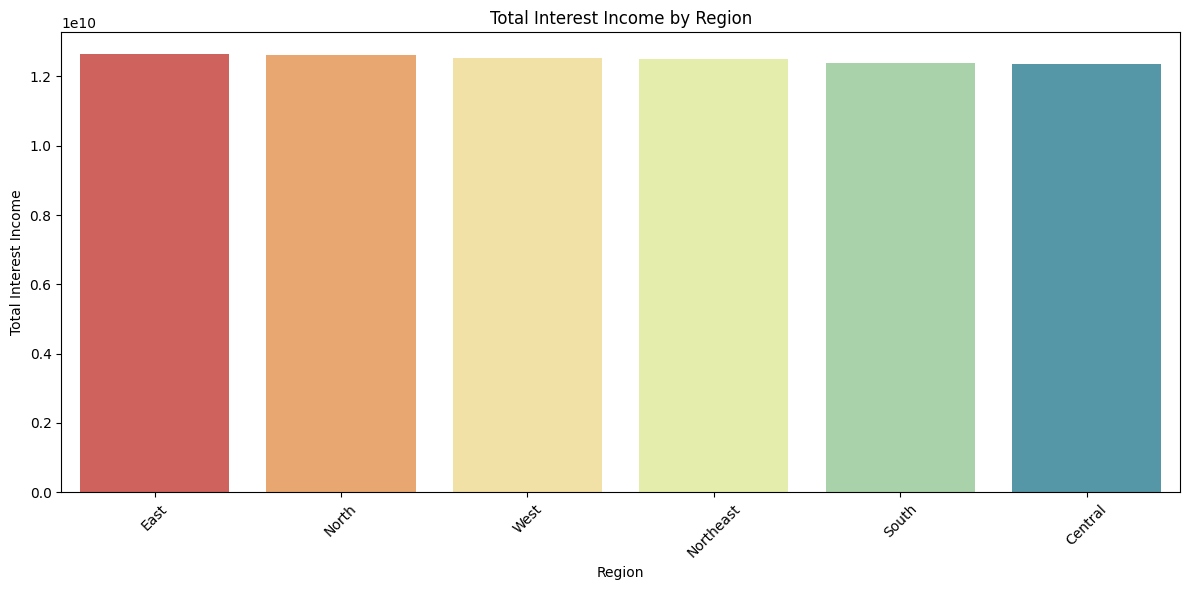

In [39]:
# Branch profitability
branch_profitability = loans.merge(
    customers[["Customer_ID", "Region"]], 
    on="Customer_ID", 
    how="left"
).merge(
    branches[["Branch_ID", "Region"]], 
    on="Region", 
    how="left"
).groupby("Branch_ID").agg({
    "Interest_Income": ["sum", "mean"],
    "Loan_Amount": "sum"
}).reset_index()

branch_profitability.columns = ["Branch_ID", "Total_Interest", "Avg_Interest", "Total_Loan_Amount"]
branch_profitability = branch_profitability.sort_values("Total_Interest", ascending=False)

print("\nTop 10 Most Profitable Branches:")
print(branch_profitability.head(10))

# Regional profitability
regional_profitability = loans.merge(
    customers[["Customer_ID", "Region"]], 
    on="Customer_ID", 
    how="left"
).groupby("Region").agg({
    "Interest_Income": ["sum", "mean"],
    "Loan_Amount": "sum"
}).reset_index()

regional_profitability.columns = ["Region", "Total_Interest", "Avg_Interest", "Total_Loan_Amount"]
regional_profitability = regional_profitability.sort_values("Total_Interest", ascending=False)

print("\nProfitability by Region:")
print(regional_profitability)

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x="Region", y="Total_Interest", data=regional_profitability, 
            hue="Region", palette="Spectral", legend=False)
plt.title("Total Interest Income by Region")
plt.xlabel("Region")
plt.ylabel("Total Interest Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 13. Geospatial Analysis

#### 13.1 Map the Distribution of Active Loans Across Regions

Regional Active Loans Distribution:
      Region  Total_Active_Loans  Loan_Disbursement_Amount
0    Central                8715                3316048302
1       East                8929                2006676282
2      North               11965                3296073904
3  Northeast                5174                 442827845
4      South                9235                1694906506
5       West                6861                1990828641


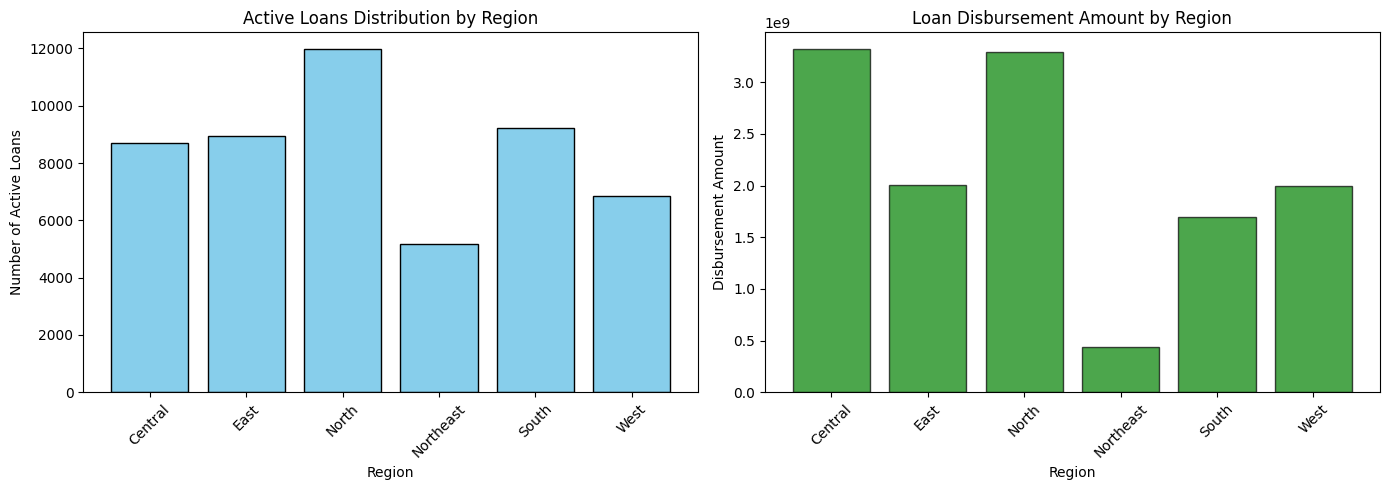

In [40]:
# Regional distribution of active loans
regional_loans = branches.groupby("Region").agg({
    "Total_Active_Loans": "sum",
    "Loan_Disbursement_Amount": "sum"
}).reset_index()

print("Regional Active Loans Distribution:")
print(regional_loans)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Active loans by region
axes[0].bar(regional_loans["Region"], regional_loans["Total_Active_Loans"], color="skyblue", edgecolor="black")
axes[0].set_title("Active Loans Distribution by Region")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Number of Active Loans")
axes[0].tick_params(axis='x', rotation=45)

# Loan disbursement by region
axes[1].bar(regional_loans["Region"], regional_loans["Loan_Disbursement_Amount"], color="green", alpha=0.7, edgecolor="black")
axes[1].set_title("Loan Disbursement Amount by Region")
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Disbursement Amount")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 13.2 Compare Default Rates Across Different Geographic Regions


Geospatial Analysis - Regional Overview:
      Region  Total_Active_Loans  Loan_Disbursement_Amount  Default_Count  \
0    Central                8715                3316048302           1423   
1       East                8929                2006676282           1363   
2      North               11965                3296073904           1340   
3  Northeast                5174                 442827845           1432   
4      South                9235                1694906506           1501   
5       West                6861                1990828641           1480   

   Total_Loans  Default_Rate  
0        14849      9.583137  
1        15316      8.899190  
2        15041      8.908982  
3        14944      9.582441  
4        14949     10.040805  
5        14901      9.932219  


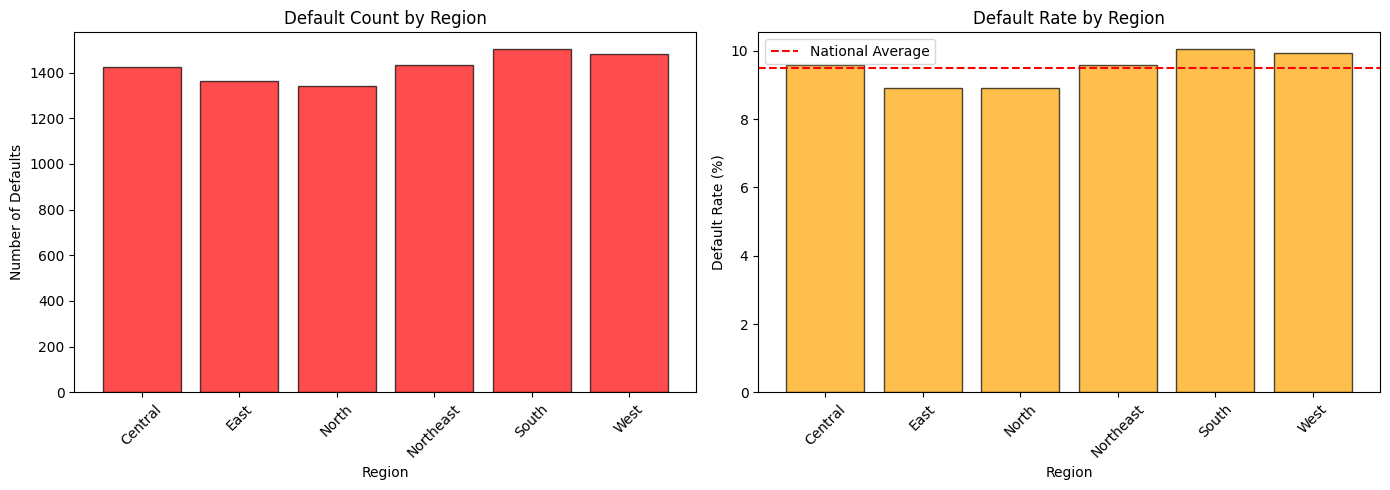

In [41]:
# Regional defaults
regional_defaults_geo = loans.merge(
    customers[["Customer_ID", "Region"]], 
    on="Customer_ID", 
    how="left"
)
regional_defaults_geo["Has_Default"] = regional_defaults_geo["Loan_ID"].isin(defaults["Loan_ID"]).astype(int)

regional_default_stats = regional_defaults_geo.groupby("Region").agg({
    "Has_Default": "sum",
    "Loan_ID": "count"
}).reset_index()
regional_default_stats.columns = ["Region", "Default_Count", "Total_Loans"]
regional_default_stats["Default_Rate"] = (regional_default_stats["Default_Count"] / regional_default_stats["Total_Loans"]) * 100

# Merge with loan data
geo_analysis = regional_loans.merge(regional_default_stats, on="Region", how="left")

print("\nGeospatial Analysis - Regional Overview:")
print(geo_analysis)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Default count by region
axes[0].bar(geo_analysis["Region"], geo_analysis["Default_Count"], color="red", alpha=0.7, edgecolor="black")
axes[0].set_title("Default Count by Region")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Number of Defaults")
axes[0].tick_params(axis='x', rotation=45)

# Default rate by region
axes[1].bar(geo_analysis["Region"], geo_analysis["Default_Rate"], color="orange", alpha=0.7, edgecolor="black")
axes[1].set_title("Default Rate by Region")
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Default Rate (%)")
axes[1].axhline(y=geo_analysis["Default_Rate"].mean(), color="red", linestyle="--", label="National Average")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()

#### 13.3 Visualize Loan Disbursement Trends for Rural vs Urban Areas


Rural vs Urban Loan Trends:
  Location_Type  Total_Disbursed      Avg_Loan  Default_Rate
0         Rural     1.131586e+11  2.508559e+06      9.350684
1         Urban     1.133047e+11  2.523995e+06      9.625537


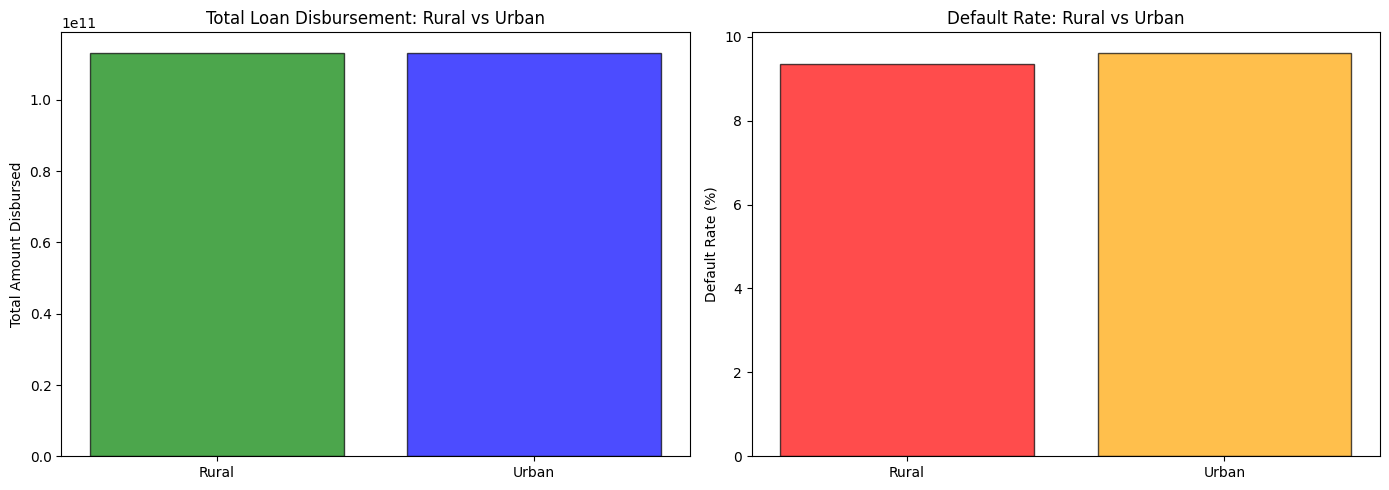

In [42]:
# Define a mapping
region_area_map = {
    "Northeast": "Rural",
    "East": "Rural",
    "Central": "Rural",
    "West": "Urban",
    "North": "Urban",
    "South": "Urban"
}

# Apply the mapping to customers
customers["Location_Type"] = customers["Region"].map(region_area_map)

# Rural vs Urban analysis (if available)
if "Location_Type" in customers.columns:
    urban_rural = loans.merge(
        customers[["Customer_ID", "Location_Type"]], 
        on="Customer_ID", 
        how="left"
    )
    urban_rural["Has_Default"] = urban_rural["Loan_ID"].isin(defaults["Loan_ID"]).astype(int)
    
    location_stats = urban_rural.groupby("Location_Type").agg({
        "Loan_Amount": ["sum", "mean"],
        "Has_Default": "mean"
    }).reset_index()
    
    location_stats.columns = ["Location_Type", "Total_Disbursed", "Avg_Loan", "Default_Rate"]
    location_stats["Default_Rate"] = location_stats["Default_Rate"] * 100
    
    print("\nRural vs Urban Loan Trends:")
    print(location_stats)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].bar(location_stats["Location_Type"], location_stats["Total_Disbursed"], 
                color=["green", "blue"], alpha=0.7, edgecolor="black")
    axes[0].set_title("Total Loan Disbursement: Rural vs Urban")
    axes[0].set_ylabel("Total Amount Disbursed")
    
    axes[1].bar(location_stats["Location_Type"], location_stats["Default_Rate"], 
                color=["red", "orange"], alpha=0.7, edgecolor="black")
    axes[1].set_title("Default Rate: Rural vs Urban")
    axes[1].set_ylabel("Default Rate (%)")
    
    plt.tight_layout()
    plt.show()

# 14. Default Trends

#### 14.1 Analyze the Number of Defaults Over Time to Identify Patterns

Monthly Default Trends:
        Month  Default_Count  Default_Amount
37 2024-02-01            168       8893364.0
38 2024-03-01            205      11890904.0
39 2024-04-01            194      10084549.0
40 2024-05-01            216      11342034.0
41 2024-06-01            194      10376491.0
42 2024-07-01            187       9854497.0
43 2024-08-01            187      10076832.0
44 2024-09-01            184       9430846.0
45 2024-10-01            209      10938681.0
46 2024-11-01            202      10691410.0
47 2024-12-01            191      10628489.0
48 2025-01-01              7        426750.0


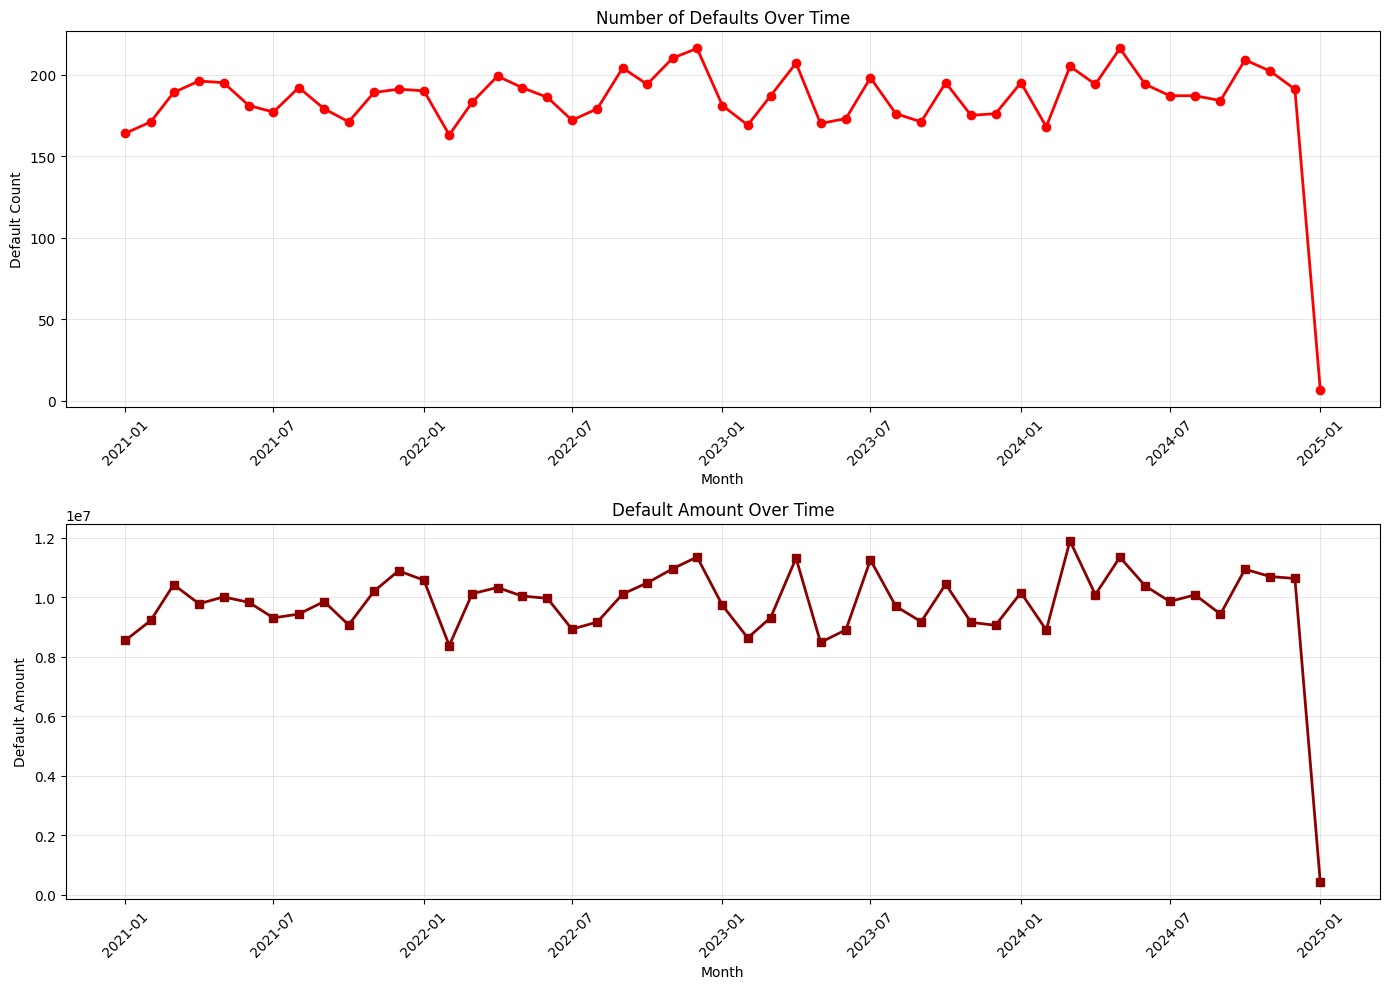

In [43]:
# Default trends over time
defaults["Default_Date"] = pd.to_datetime(defaults["Default_Date"], errors="coerce")
monthly_defaults = defaults.groupby(defaults["Default_Date"].dt.to_period("M")).agg({
    "Default_ID": "count",
    "Default_Amount": "sum"
}).reset_index()
monthly_defaults.columns = ["Month", "Default_Count", "Default_Amount"]
monthly_defaults["Month"] = monthly_defaults["Month"].dt.to_timestamp()

print("Monthly Default Trends:")
print(monthly_defaults.tail(12))

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Default count over time
axes[0].plot(monthly_defaults["Month"], monthly_defaults["Default_Count"], 
             marker="o", color="red", linewidth=2)
axes[0].set_title("Number of Defaults Over Time")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Default Count")
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Default amount over time
axes[1].plot(monthly_defaults["Month"], monthly_defaults["Default_Amount"], 
             marker="s", color="darkred", linewidth=2)
axes[1].set_title("Default Amount Over Time")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Default Amount")
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 14.2 Calculate Average Default Amount for Different Loan Purposes


Default Statistics by Loan Purpose:
  Collateral_Details   Avg_Default  Total_Default  Count
1            Vehicle  53682.101911    160133710.0   2983
0           Property  52629.889812    316674047.0   6017


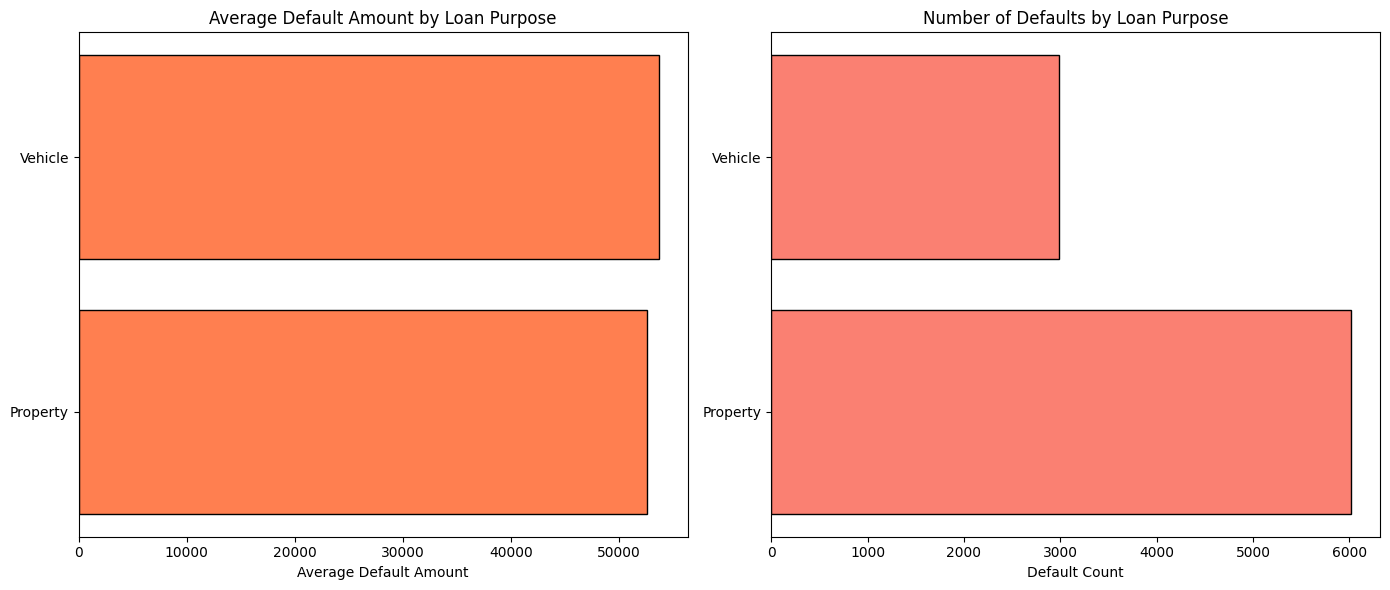

In [44]:
# Average default amount by loan purpose
if "Collateral_Details" in loans.columns:
    default_purpose = defaults.merge(
        loans[["Loan_ID", "Collateral_Details"]], 
        on="Loan_ID", 
        how="left"
    )
    
    purpose_default_stats = default_purpose.groupby("Collateral_Details").agg({
        "Default_Amount": ["mean", "sum", "count"]
    }).reset_index()
    
    purpose_default_stats.columns = ["Collateral_Details", "Avg_Default", "Total_Default", "Count"]
    purpose_default_stats = purpose_default_stats.sort_values("Avg_Default", ascending=False)
    
    print("\nDefault Statistics by Loan Purpose:")
    print(purpose_default_stats)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    axes[0].barh(purpose_default_stats["Collateral_Details"], purpose_default_stats["Avg_Default"], 
                 color="coral", edgecolor="black")
    axes[0].set_title("Average Default Amount by Loan Purpose")
    axes[0].set_xlabel("Average Default Amount")
    axes[0].invert_yaxis()
    
    axes[1].barh(purpose_default_stats["Collateral_Details"], purpose_default_stats["Count"], 
                 color="salmon", edgecolor="black")
    axes[1].set_title("Number of Defaults by Loan Purpose")
    axes[1].set_xlabel("Default Count")
    axes[1].invert_yaxis()
    
    plt.tight_layout()
    plt.show()

#### 14.3 Compare Default Rates Across Customer Income Categories


Default Statistics by Income Category:
    Income_Category   Avg_Default  Total_Default  Count
0         Low (<3L)  52161.377892     20290776.0    389
1     Medium (3-6L)  53543.102496     60075361.0   1122
2      High (6-10L)  52182.182782     83648039.0   1603
3  Very High (>10L)  53313.303846    207921885.0   3900


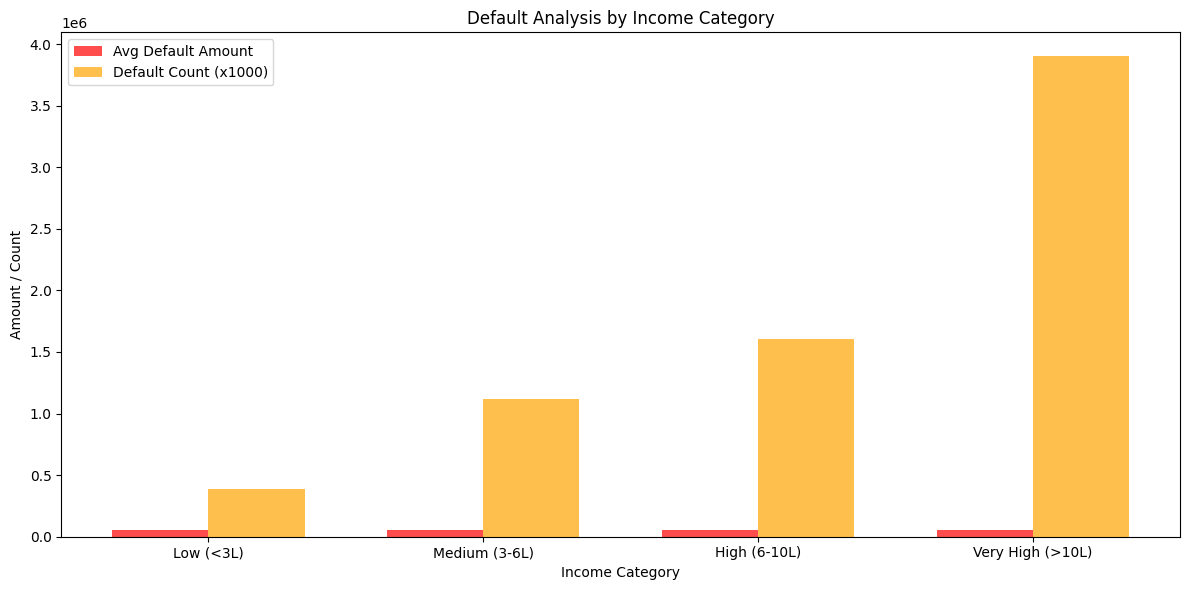

In [45]:
# Default rates by customer income category
# After first merge
default_income = defaults.merge(
    loans[["Loan_ID", "Customer_ID"]],
    on="Loan_ID",
    how="left"
)

# Decide which Customer_ID to use
# If defaults' Customer_ID is correct:
default_income = default_income.rename(columns={"Customer_ID_x": "Customer_ID"})

# If loans' Customer_ID is correct:
# default_income = default_income.rename(columns={"Customer_ID_y": "Customer_ID"})

# Now merge with customers
default_income = default_income.merge(
    customers[["Customer_ID", "Annual_Income"]],
    on="Customer_ID",
    how="left"
)

# Create income categories
default_income["Income_Category"] = pd.cut(
    default_income["Annual_Income"],
    bins=[0, 300000, 600000, 1000000, float('inf')],
    labels=["Low (<3L)", "Medium (3-6L)", "High (6-10L)", "Very High (>10L)"]
)

income_default_stats = default_income.groupby(
    "Income_Category", observed=False
).agg({
    "Default_Amount": ["mean", "sum", "count"]
}).reset_index()

income_default_stats.columns = ["Income_Category", "Avg_Default", "Total_Default", "Count"]

print("\nDefault Statistics by Income Category:")
print(income_default_stats)

# Visualization
plt.figure(figsize=(12,6))
x = range(len(income_default_stats))
width = 0.35

plt.bar([i - width/2 for i in x], income_default_stats["Avg_Default"], 
        width, label="Avg Default Amount", color="red", alpha=0.7)
plt.bar([i + width/2 for i in x], income_default_stats["Count"]*1000, 
        width, label="Default Count (x1000)", color="orange", alpha=0.7)

plt.xticks(x, income_default_stats["Income_Category"])
plt.xlabel("Income Category")
plt.ylabel("Amount / Count")
plt.title("Default Analysis by Income Category")
plt.legend()
plt.tight_layout()
plt.show()

# 15. Branch Efficiency

#### 15.1 Calculate Average Loan Disbursement Time for Each Branch

Branch Disbursement Efficiency Summary:
Most Efficient Branches (Top 5):
   Branch_ID    Avg_Time  Median_Time  Loan_Count
43      B044  165.453588        168.0       11484
23      B024  165.453588        168.0       11484
28      B029  165.453588        168.0       11484
33      B034  165.453588        168.0       11484
34      B035  165.453588        168.0       11484

Least Efficient Branches (Bottom 5):
   Branch_ID    Avg_Time  Median_Time  Loan_Count
8       B009  181.782092        188.0       11693
6       B007  181.782092        188.0       11693
5       B006  181.782092        188.0       11693
36      B037  181.782092        188.0       11693
49      B050  181.782092        188.0       11693


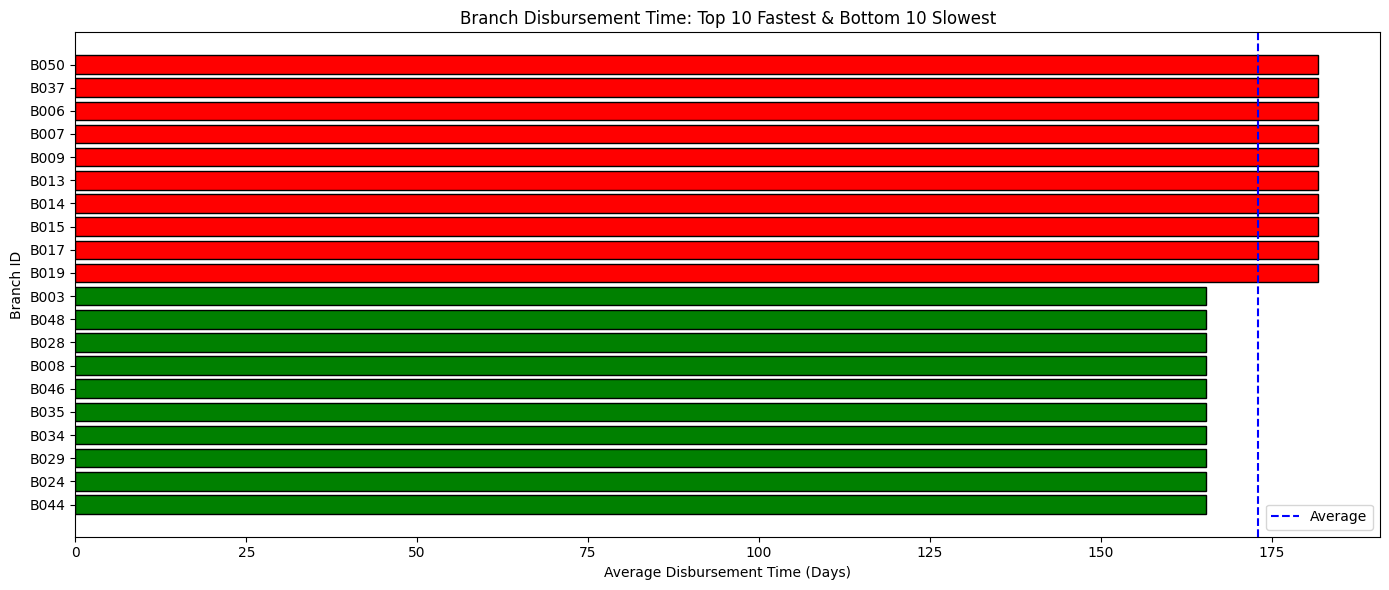

In [46]:
# Branch disbursement time (already calculated earlier, displaying summary)
print("Branch Disbursement Efficiency Summary:")
print(f"Most Efficient Branches (Top 5):")
print(branch_time_stats.head(5))
print(f"\nLeast Efficient Branches (Bottom 5):")
print(branch_time_stats.tail(5))

# Visualization
plt.figure(figsize=(14, 6))
top_bottom = pd.concat([branch_time_stats.head(10), branch_time_stats.tail(10)])
colors = ['green' if x <= branch_time_stats['Avg_Time'].median() else 'red' for x in top_bottom['Avg_Time']]
plt.barh(top_bottom["Branch_ID"].astype(str), top_bottom["Avg_Time"], color=colors, edgecolor="black")
plt.xlabel("Average Disbursement Time (Days)")
plt.ylabel("Branch ID")
plt.title("Branch Disbursement Time: Top 10 Fastest & Bottom 10 Slowest")
plt.axvline(branch_time_stats['Avg_Time'].mean(), color="blue", linestyle="--", label="Average")
plt.legend()
plt.tight_layout()
plt.show()

#### 15.2 Identify Branches with Highest Number of Rejected Applications


Branches with Highest Rejections:
   Branch_ID  Rejection_Count
0       B001             2184
41      B042             2184
26      B027             2184
19      B020             2184
9       B010             2184
11      B012             2184
14      B015             2112
48      B049             2112
39      B040             2112
36      B037             2112
24      B025             2112
18      B019             2112
16      B017             2112
25      B026             2112
13      B014             2112

Branches by Rejection Rate:
   Branch_ID  Total_Applications  Rejections  Rejection_Rate
0       B001               13872        2184       15.743945
41      B042               13872        2184       15.743945
26      B027               13872        2184       15.743945
11      B012               13872        2184       15.743945
19      B020               13872        2184       15.743945
9       B010               13872        2184       15.743945
38      B039               13

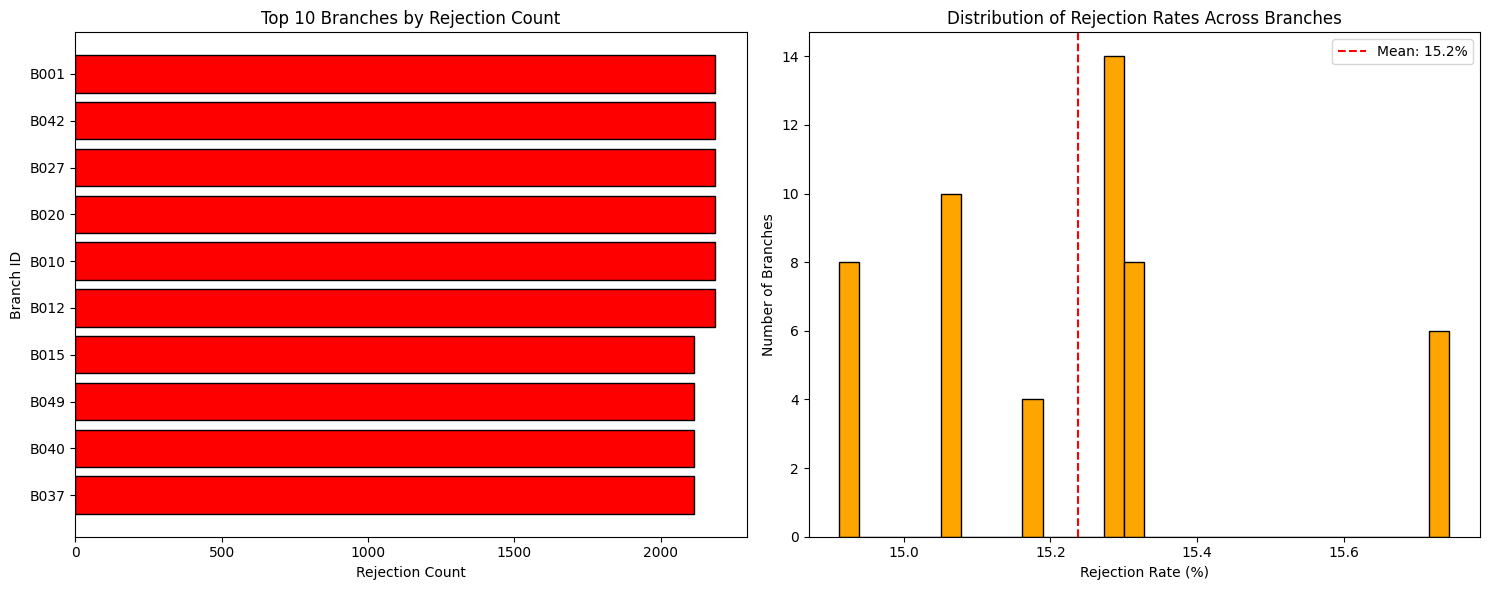

In [47]:
# Branches with highest rejected applications
branch_rejections = applications[applications["Approval_Status"] == "Rejected"].merge(
    loans[["Loan_ID", "Customer_ID"]],
    on="Loan_ID",
    how="left"
)

# Decide which Customer_ID to use
# If applications' Customer_ID is correct:
branch_rejections = branch_rejections.rename(columns={"Customer_ID_x": "Customer_ID"})

# If loans' Customer_ID is correct:
# branch_rejections = branch_rejections.rename(columns={"Customer_ID_y": "Customer_ID"})

# Now merge with customers
branch_rejections = branch_rejections.merge(
    customers[["Customer_ID", "Region"]],
    on="Customer_ID",
    how="left"
).merge(
    branches[["Branch_ID", "Region"]], 
    on="Region", 
    how="left"
)

rejection_by_branch = branch_rejections.groupby("Branch_ID").size().reset_index(name="Rejection_Count")
rejection_by_branch = rejection_by_branch.sort_values("Rejection_Count", ascending=False)

print("\nBranches with Highest Rejections:")
print(rejection_by_branch.head(15))

# Calculate rejection rate by branch
all_apps_by_branch = applications.merge(
    loans[["Loan_ID", "Customer_ID"]], 
    on="Loan_ID", 
    how="left"
)

# Decide which Customer_ID to use
# If applications' Customer_ID is correct:
all_apps_by_branch = all_apps_by_branch.rename(columns={"Customer_ID_x": "Customer_ID"})

# If loans' Customer_ID is correct:
# all_apps_by_branch = all_apps_by_branch.rename(columns={"Customer_ID_y": "Customer_ID"})

# Now merge with customers
all_apps_by_branch = all_apps_by_branch.merge(
    customers[["Customer_ID", "Region"]],
    on="Customer_ID",
    how="left"
).merge(
    branches[["Branch_ID", "Region"]], 
    on="Region", 
    how="left"
)

branch_app_stats = all_apps_by_branch.groupby("Branch_ID").agg({
    "Application_ID": "count",
    "Approval_Status": lambda x: (x == "Rejected").sum()
}).reset_index()

branch_app_stats.columns = ["Branch_ID", "Total_Applications", "Rejections"]
branch_app_stats["Rejection_Rate"] = (branch_app_stats["Rejections"] / branch_app_stats["Total_Applications"]) * 100
branch_app_stats = branch_app_stats.sort_values("Rejection_Rate", ascending=False)

print("\nBranches by Rejection Rate:")
print(branch_app_stats.head(15))

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Top rejecting branches
top_rejection_branches = rejection_by_branch.head(10)
axes[0].barh(top_rejection_branches["Branch_ID"].astype(str), 
             top_rejection_branches["Rejection_Count"], color="red", edgecolor="black")
axes[0].set_title("Top 10 Branches by Rejection Count")
axes[0].set_xlabel("Rejection Count")
axes[0].set_ylabel("Branch ID")
axes[0].invert_yaxis()

# Rejection rate distribution
axes[1].hist(branch_app_stats["Rejection_Rate"], bins=30, color="orange", edgecolor="black")
axes[1].set_title("Distribution of Rejection Rates Across Branches")
axes[1].set_xlabel("Rejection Rate (%)")
axes[1].set_ylabel("Number of Branches")
axes[1].axvline(branch_app_stats["Rejection_Rate"].mean(), color="red", 
                linestyle="--", label=f"Mean: {branch_app_stats['Rejection_Rate'].mean():.1f}%")
axes[1].legend()

plt.tight_layout()
plt.show()

# 16. Time-Series Analysis

#### 16.1 Analyze Monthly Loan Disbursement Trends Over Last 5 Years

Monthly Disbursement Trends (Last 12 months):
        Month  Total_Amount  Loan_Count
49 2024-01-01  3.838460e+09        1519
50 2024-02-01  3.498557e+09        1415
51 2024-03-01  3.751819e+09        1499
52 2024-04-01  3.868413e+09        1545
53 2024-05-01  3.758513e+09        1493
54 2024-06-01  3.755752e+09        1462
55 2024-07-01  3.870543e+09        1547
56 2024-08-01  3.872774e+09        1497
57 2024-09-01  3.771749e+09        1505
58 2024-10-01  3.722569e+09        1515
59 2024-11-01  3.680941e+09        1441
60 2024-12-01  3.340778e+09        1324


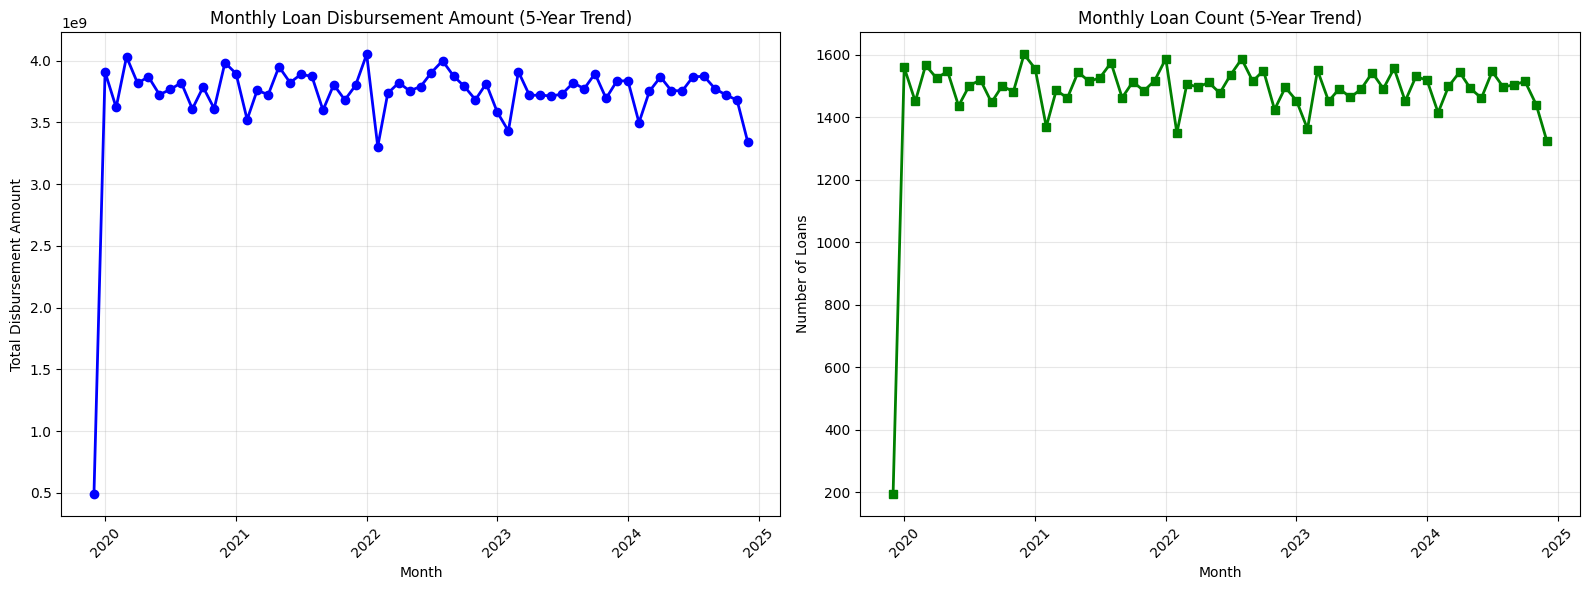

In [48]:
# Monthly loan disbursement trends (5 years)
loans["Disbursal_Date"] = pd.to_datetime(loans["Disbursal_Date"], errors="coerce")
monthly_disbursement_ts = loans.groupby(loans["Disbursal_Date"].dt.to_period("M")).agg({
    "Loan_Amount": "sum",
    "Loan_ID": "count"
}).reset_index()
monthly_disbursement_ts.columns = ["Month", "Total_Amount", "Loan_Count"]
monthly_disbursement_ts["Month"] = monthly_disbursement_ts["Month"].dt.to_timestamp()

print("Monthly Disbursement Trends (Last 12 months):")
print(monthly_disbursement_ts.tail(12))

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Total disbursement over time
axes[0].plot(monthly_disbursement_ts["Month"], monthly_disbursement_ts["Total_Amount"], 
             marker="o", color="blue", linewidth=2)
axes[0].set_title("Monthly Loan Disbursement Amount (5-Year Trend)")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Total Disbursement Amount")
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Loan count over time
axes[1].plot(monthly_disbursement_ts["Month"], monthly_disbursement_ts["Loan_Count"], 
             marker="s", color="green", linewidth=2)
axes[1].set_title("Monthly Loan Count (5-Year Trend)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Loans")
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 16.2 Identify Seasonal Patterns in Loan Applications and Disbursements

Seasonal Patterns:

Applications by Month:
    Month_Number  Application_Count Month_Name
0              1               7124    January
1              2               6397   February
2              3               6863      March
3              4               6781      April
4              5               6998        May
5              6               6808       June
6              7               7215       July
7              8               6952     August
8              9               6762  September
9             10               6952    October
10            11               6749   November
11            12               6999   December

Disbursements by Month:
    Month_Number  Disbursement_Count Month_Name
0              1                7677    January
1              2                6949   February
2              3                7611      March
3              4                7481      April
4              5                7590        May
5              6                7

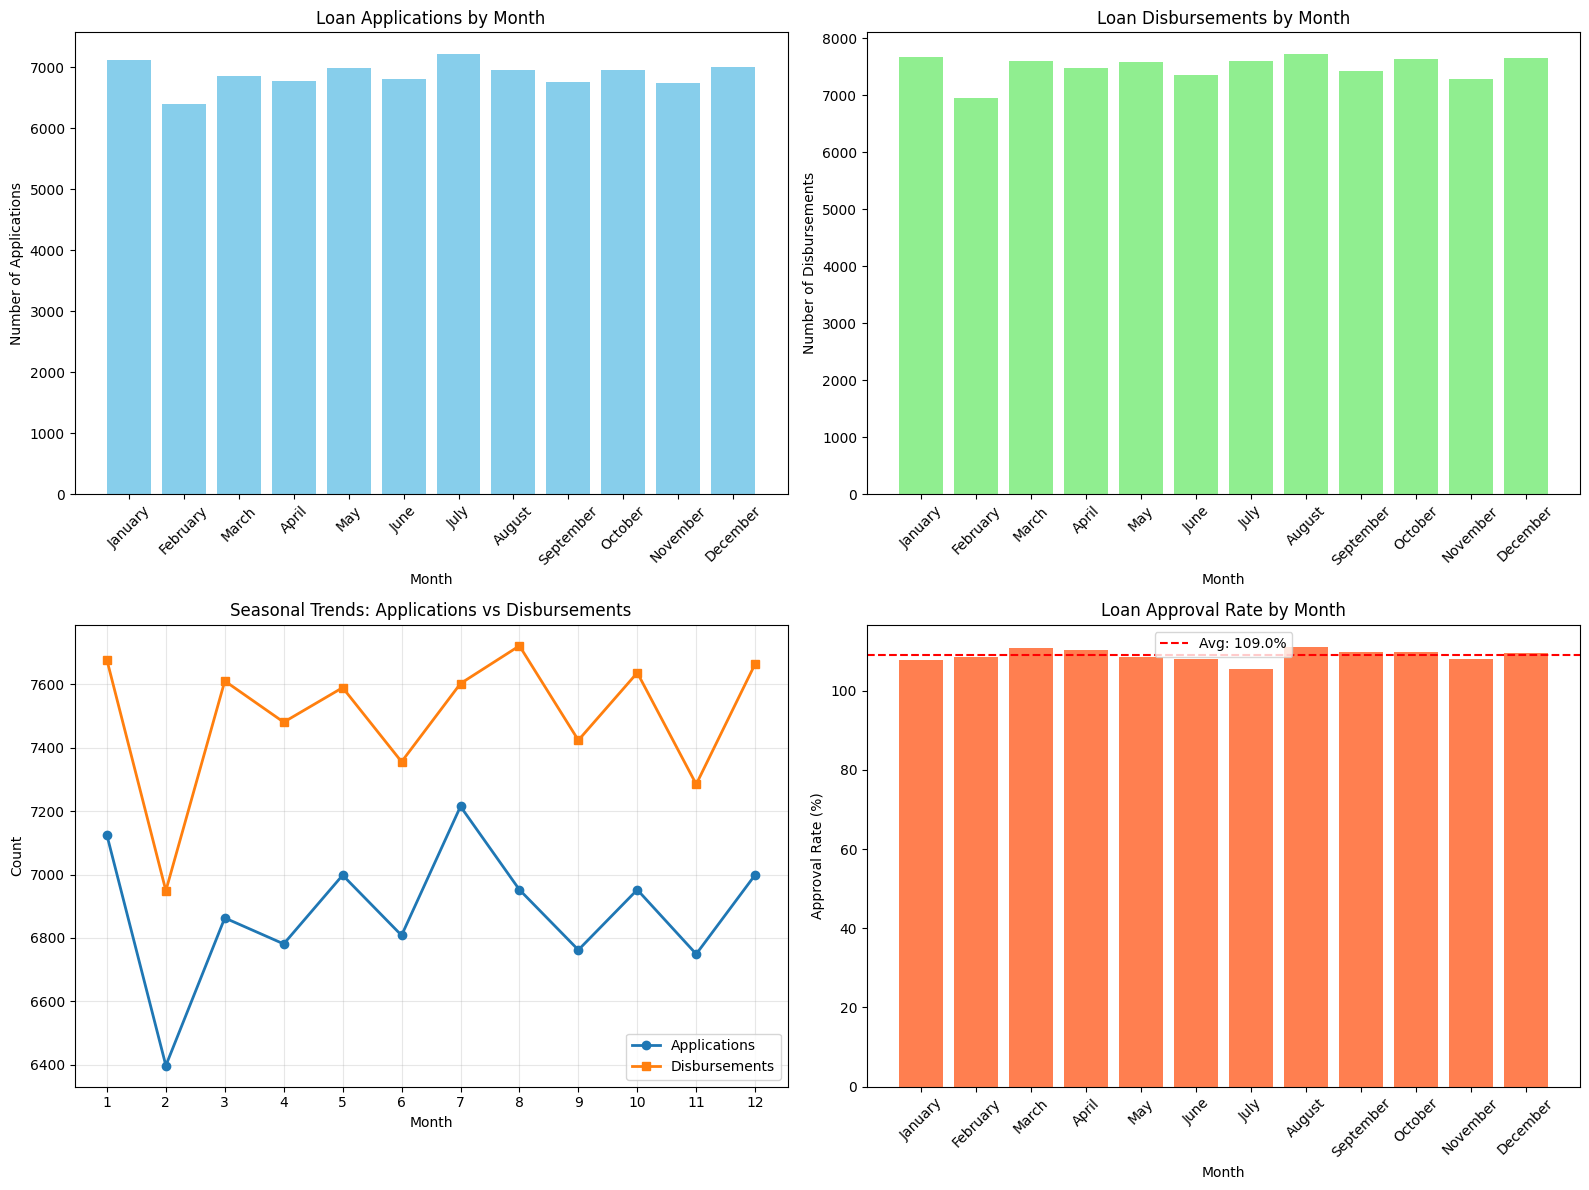

In [49]:
# Seasonal patterns analysis
applications["Application_Date"] = pd.to_datetime(applications["Application_Date"], errors="coerce")
applications["Month_Number"] = applications["Application_Date"].dt.month
loans["Disbursal_Date"] = pd.to_datetime(loans["Disbursal_Date"], errors="coerce")
loans["Month_Number"] = loans["Disbursal_Date"].dt.month

# Applications by month
monthly_applications = applications.groupby("Month_Number").size().reset_index(name="Application_Count")
monthly_applications["Month_Name"] = monthly_applications["Month_Number"].apply(
    lambda x: pd.Timestamp(f"2024-{x:02d}-01").strftime("%B")
)

# Disbursements by month
monthly_disbursements = loans.groupby("Month_Number").size().reset_index(name="Disbursement_Count")
monthly_disbursements["Month_Name"] = monthly_disbursements["Month_Number"].apply(
    lambda x: pd.Timestamp(f"2024-{x:02d}-01").strftime("%B")
)

print("Seasonal Patterns:")
print("\nApplications by Month:")
print(monthly_applications.sort_values("Month_Number"))
print("\nDisbursements by Month:")
print(monthly_disbursements.sort_values("Month_Number"))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Applications by month
axes[0, 0].bar(monthly_applications["Month_Name"], monthly_applications["Application_Count"], color="skyblue")
axes[0, 0].set_title("Loan Applications by Month")
axes[0, 0].set_xlabel("Month")
axes[0, 0].set_ylabel("Number of Applications")
axes[0, 0].tick_params(axis='x', rotation=45)

# Disbursements by month
axes[0, 1].bar(monthly_disbursements["Month_Name"], monthly_disbursements["Disbursement_Count"], color="lightgreen")
axes[0, 1].set_title("Loan Disbursements by Month")
axes[0, 1].set_xlabel("Month")
axes[0, 1].set_ylabel("Number of Disbursements")
axes[0, 1].tick_params(axis='x', rotation=45)

# Combined line plot
axes[1, 0].plot(monthly_applications["Month_Number"], monthly_applications["Application_Count"], 
                marker="o", label="Applications", linewidth=2)
axes[1, 0].plot(monthly_disbursements["Month_Number"], monthly_disbursements["Disbursement_Count"], 
                marker="s", label="Disbursements", linewidth=2)
axes[1, 0].set_title("Seasonal Trends: Applications vs Disbursements")
axes[1, 0].set_xlabel("Month")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(range(1, 13))

# Calculate approval rate by month
merged_monthly = monthly_applications.merge(monthly_disbursements, on=["Month_Number", "Month_Name"], how="left")
merged_monthly["Disbursement_Count"].fillna(0, inplace=True)
merged_monthly["Approval_Rate"] = (merged_monthly["Disbursement_Count"] / merged_monthly["Application_Count"]) * 100

axes[1, 1].bar(merged_monthly["Month_Name"], merged_monthly["Approval_Rate"], color="coral")
axes[1, 1].set_title("Loan Approval Rate by Month")
axes[1, 1].set_xlabel("Month")
axes[1, 1].set_ylabel("Approval Rate (%)")
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].axhline(y=merged_monthly["Approval_Rate"].mean(), color='red', linestyle='--', 
                    label=f'Avg: {merged_monthly["Approval_Rate"].mean():.1f}%')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

#### 16.3 Compare Monthly Default Rates Across Regions

Regional Monthly Default Rates (Sample):
     Region      Month  Total_Loans  Default_Count  Default_Rate
0   Central 2019-12-01           31            3.0      9.677419
1   Central 2020-01-01          269           28.0     10.408922
2   Central 2020-02-01          241            8.0      3.319502
3   Central 2020-03-01          243           19.0      7.818930
4   Central 2020-04-01          248           16.0      6.451613
5   Central 2020-05-01          253           23.0      9.090909
6   Central 2020-06-01          248           22.0      8.870968
7   Central 2020-07-01          242           16.0      6.611570
8   Central 2020-08-01          238           18.0      7.563025
9   Central 2020-09-01          257           22.0      8.560311
10  Central 2020-10-01          244           29.0     11.885246
11  Central 2020-11-01          243           23.0      9.465021
12  Central 2020-12-01          260           22.0      8.461538
13  Central 2021-01-01          255           20.

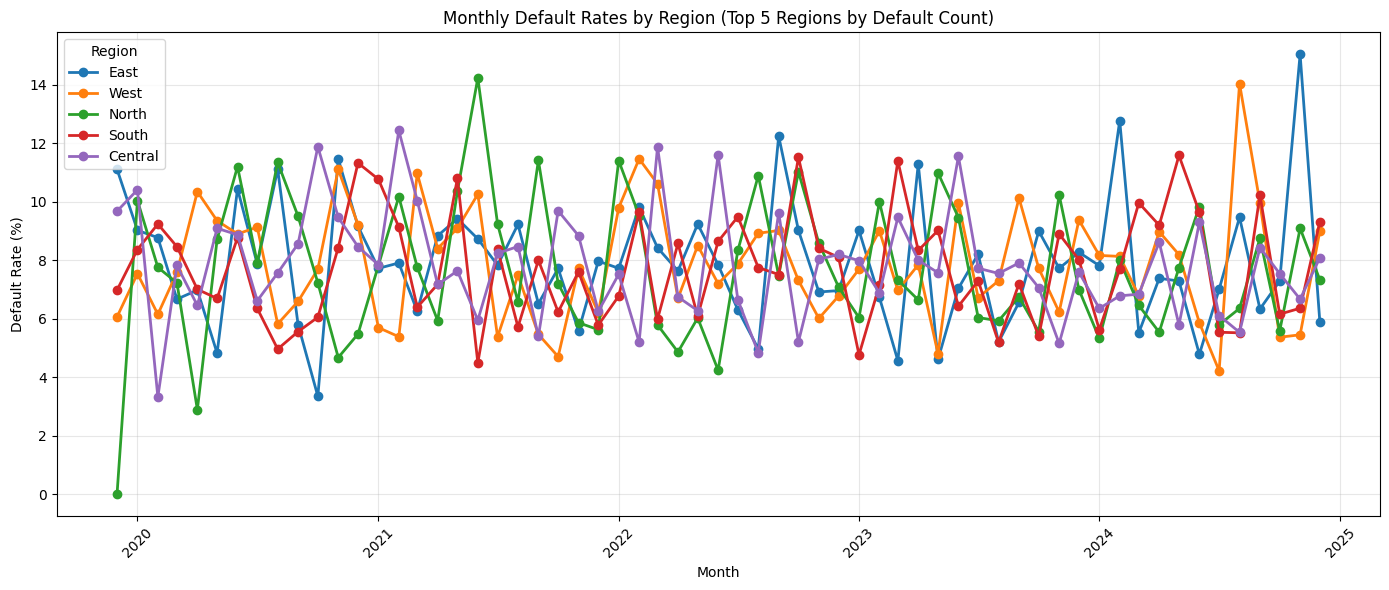

In [50]:
# Monthly default rates by region
defaults_merged = defaults.merge(
    loans[["Loan_ID", "Disbursal_Date"]],
    on="Loan_ID",
    how="left"
).merge(
    customers[["Customer_ID", "Region"]],
    on="Customer_ID",
    how="left"
)

defaults_merged["Disbursal_Date"] = pd.to_datetime(defaults_merged["Disbursal_Date"], errors="coerce")
defaults_merged["Month"] = defaults_merged["Disbursal_Date"].dt.to_period("M")

# Merge loans with customers
loans_with_region = loans.merge(
    customers[["Customer_ID", "Region"]],
    on="Customer_ID",
    how="left"
)

# Get loan counts by region and month
loans_with_region["Month"] = pd.to_datetime(loans_with_region["Disbursal_Date"]).dt.to_period("M")

loans_by_region_month = loans_with_region.groupby(["Region", "Month"]).size().reset_index(name="Total_Loans")

# Get default counts by region and month
defaults_by_region_month = defaults_merged.groupby(["Region", "Month"]).size().reset_index(name="Default_Count")

# Merge and calculate default rates
regional_monthly_defaults = loans_by_region_month.merge(
    defaults_by_region_month, on=["Region", "Month"], how="left"
)
regional_monthly_defaults["Default_Count"].fillna(0, inplace=True)
regional_monthly_defaults["Default_Rate"] = (
    regional_monthly_defaults["Default_Count"] / regional_monthly_defaults["Total_Loans"]
) * 100
regional_monthly_defaults["Month"] = regional_monthly_defaults["Month"].dt.to_timestamp()

print("Regional Monthly Default Rates (Sample):")
print(regional_monthly_defaults.head(20))

# Visualize top 5 regions
top_regions = defaults_merged["Region"].value_counts().head(5).index
filtered_data = regional_monthly_defaults[regional_monthly_defaults["Region"].isin(top_regions)]

plt.figure(figsize=(14, 6))
for region in top_regions:
    region_data = filtered_data[filtered_data["Region"] == region]
    plt.plot(region_data["Month"], region_data["Default_Rate"], marker="o", label=region, linewidth=2)

plt.title("Monthly Default Rates by Region (Top 5 Regions by Default Count)")
plt.xlabel("Month")
plt.ylabel("Default Rate (%)")
plt.legend(title="Region")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 17. Customer Behavior Analysis

#### 17.1 Categorize Customers Based on Repayment Behavior

Customer Repayment Behavior Distribution:
Repayment_Category
Has Overdues            27358
Always On Time          15297
Occasional Defaulter     7527
Frequent Defaulter        494
Name: count, dtype: int64


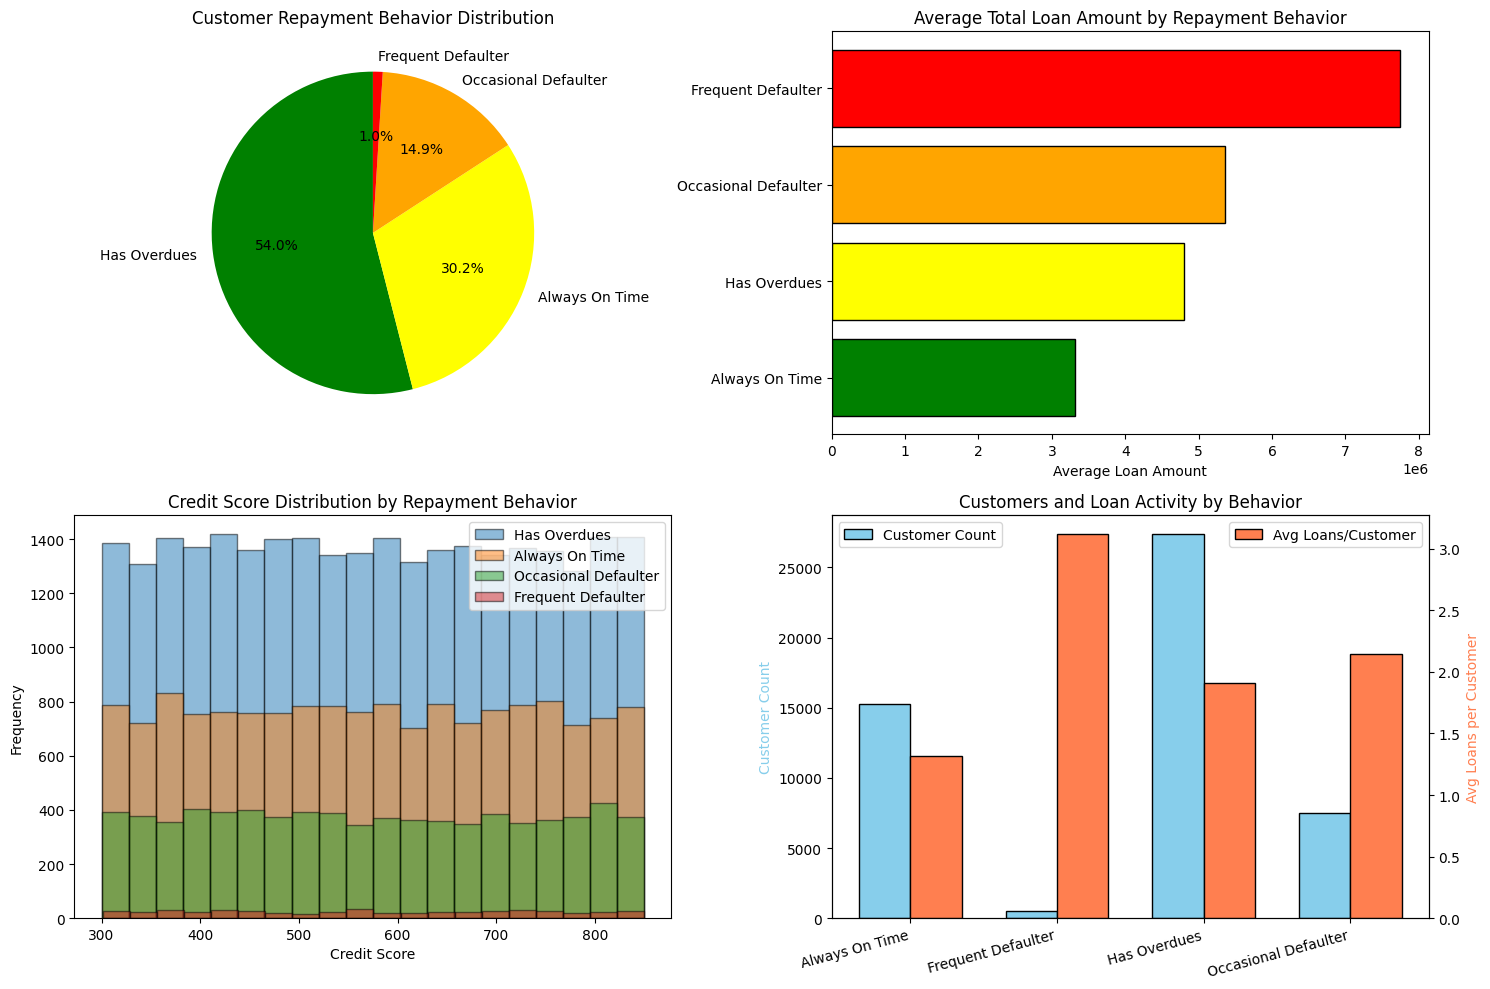

In [51]:
# Categorize customers by repayment behavior
customer_repayment = loans.merge(
    customers[["Customer_ID", "Credit_Score"]], 
    on="Customer_ID", 
    how="left"
)

# Check if customer has defaults
customer_repayment["Has_Default"] = customer_repayment["Loan_ID"].isin(defaults["Loan_ID"]).astype(int)
customer_repayment["Has_Overdue"] = (customer_repayment["Overdue_Amount"] > 0).astype(int)

# Aggregate per customer
customer_behavior = customer_repayment.groupby("Customer_ID").agg({
    "Loan_ID": "count",
    "Has_Default": "sum",
    "Has_Overdue": "sum",
    "Loan_Amount": "sum",
    "Credit_Score": "first"
}).reset_index()

customer_behavior.columns = ["Customer_ID", "Total_Loans", "Default_Count", "Overdue_Count", "Total_Loan_Amount", "Credit_Score"]

# Categorize repayment behavior
def categorize_behavior(row):
    if row["Default_Count"] > 0:
        return "Frequent Defaulter" if row["Default_Count"] > 1 else "Occasional Defaulter"
    elif row["Overdue_Count"] > 0:
        return "Has Overdues"
    else:
        return "Always On Time"

customer_behavior["Repayment_Category"] = customer_behavior.apply(categorize_behavior, axis=1)

# Distribution of repayment categories
behavior_distribution = customer_behavior["Repayment_Category"].value_counts()
print("Customer Repayment Behavior Distribution:")
print(behavior_distribution)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Pie chart of repayment categories
axes[0,0].pie(behavior_distribution.values, labels=behavior_distribution.index, 
              autopct='%1.1f%%', startangle=90, colors=["green", "yellow", "orange", "red"])
axes[0,0].set_title("Customer Repayment Behavior Distribution")

# Average loan amount by behavior category
avg_loan_by_behavior = customer_behavior.groupby("Repayment_Category")["Total_Loan_Amount"].mean().sort_values()
axes[0,1].barh(avg_loan_by_behavior.index, avg_loan_by_behavior.values, 
               color=["green", "yellow", "orange", "red"], edgecolor="black")
axes[0,1].set_title("Average Total Loan Amount by Repayment Behavior")
axes[0,1].set_xlabel("Average Loan Amount")

# Credit score distribution by behavior
for category in customer_behavior["Repayment_Category"].unique():
    data = customer_behavior[customer_behavior["Repayment_Category"] == category]["Credit_Score"]
    axes[1,0].hist(data, alpha=0.5, label=category, bins=20, edgecolor="black")
axes[1,0].set_title("Credit Score Distribution by Repayment Behavior")
axes[1,0].set_xlabel("Credit Score")
axes[1,0].set_ylabel("Frequency")
axes[1,0].legend()

# Number of customers by behavior and total loans
behavior_stats = customer_behavior.groupby("Repayment_Category").agg({
    "Customer_ID": "count",
    "Total_Loans": "mean"
}).reset_index()
behavior_stats.columns = ["Category", "Customer_Count", "Avg_Loans_Per_Customer"]

x = range(len(behavior_stats))
width = 0.35
axes[1,1].bar([i - width/2 for i in x], behavior_stats["Customer_Count"], 
              width, label="Customer Count", color="skyblue", edgecolor="black")
ax2 = axes[1,1].twinx()
ax2.bar([i + width/2 for i in x], behavior_stats["Avg_Loans_Per_Customer"], 
        width, label="Avg Loans/Customer", color="coral", edgecolor="black")
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(behavior_stats["Category"], rotation=15, ha="right")
axes[1,1].set_ylabel("Customer Count", color="skyblue")
ax2.set_ylabel("Avg Loans per Customer", color="coral")
axes[1,1].set_title("Customers and Loan Activity by Behavior")
axes[1,1].legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

#### 17.2 Analyze Patterns in Loan Approval/Rejection by Customer Demographics


Approval Rates by Employment Status:
Approval_Status    Approved  Rejected  Total  Approval_Rate
Employment_Status                                          
Salaried              23452      4130  27582      85.026467
Self-Employed         23346      4146  27492      84.919249
Unemployed            23202      4324  27526      84.291216


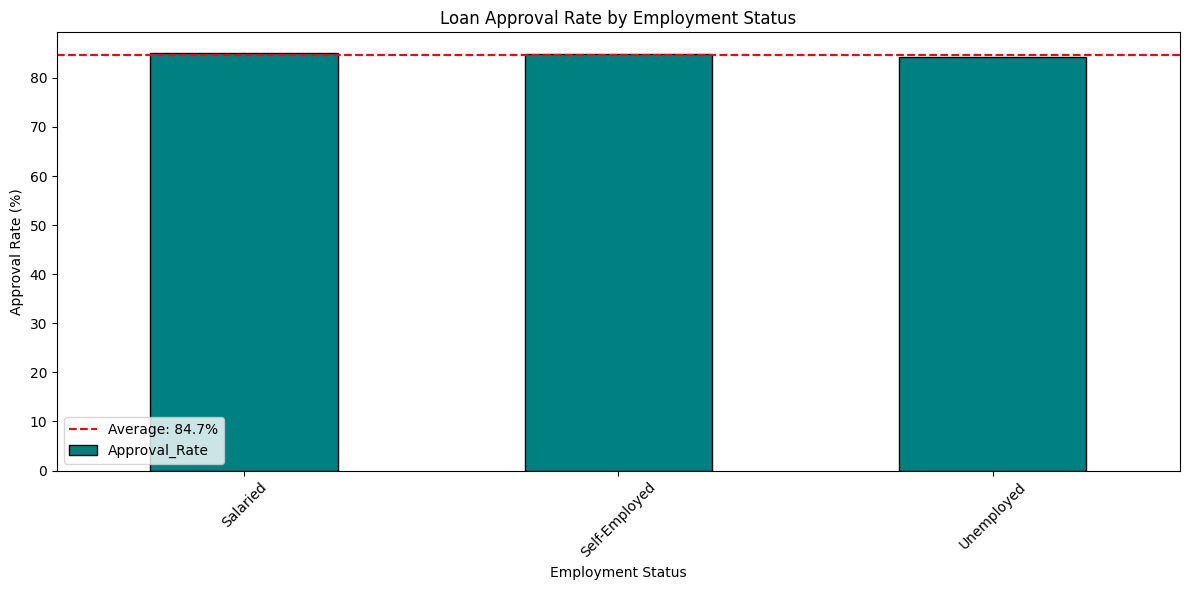

In [52]:
# Approval/Rejection patterns by demographics
if "Employment_Status" in customers.columns:
    approval_demographics = applications.merge(
        loans[["Loan_ID", "Customer_ID"]], 
        on="Loan_ID", 
        how="left"
    )
    # If applications' Customer_ID is correct:
    approval_demographics = approval_demographics.rename(columns={"Customer_ID_x": "Customer_ID"})
    
    # If loans' Customer_ID is correct:
    # approval_demographics = approval_demographics.rename(columns={"Customer_ID_y": "Customer_ID"})
    
    # Now merge with customers
    approval_demographics = approval_demographics.merge(
        customers[["Customer_ID", "Employment_Status", "Credit_Score"]], 
        on="Customer_ID",
        how="left"
    )
    
    employment_approval = approval_demographics.groupby(["Employment_Status", "Approval_Status"]).size().unstack(fill_value=0)
    employment_approval["Total"] = employment_approval.sum(axis=1)
    employment_approval["Approval_Rate"] = (employment_approval.get("Approved", 0) / employment_approval["Total"]) * 100
    
    print("\nApproval Rates by Employment Status:")
    print(employment_approval)
    
    # Visualization
    plt.figure(figsize=(12,6))
    employment_approval["Approval_Rate"].plot(kind="bar", color="teal", edgecolor="black")
    plt.title("Loan Approval Rate by Employment Status")
    plt.xlabel("Employment Status")
    plt.ylabel("Approval Rate (%)")
    plt.xticks(rotation=45)
    plt.axhline(y=employment_approval["Approval_Rate"].mean(), color="red", 
                linestyle="--", label=f"Average: {employment_approval['Approval_Rate'].mean():.1f}%")
    plt.legend()
    plt.tight_layout()
    plt.show()

#### 17.3 Identify High-Value Customers with Consistent Repayment Histories


High-Value Customers with Consistent Repayment: 458

Top 10 High-Value Customers:
      Customer_ID  Total_Loans  Total_Loan_Amount  Credit_Score
42007     C058056            4         17126572.0           747
20167     C028037            4         13813616.0           811
24991     C034690            3         13770722.0           819
11819     C016442            4         13731328.0           796
10210     C014187            4         13534300.0           708
49636     C068568            4         13532860.0           701
29870     C041426            4         13066189.0           724
16394     C022763            3         13021509.0           833
47171     C065197            3         12712676.0           821
41642     C057567            3         12633196.0           806


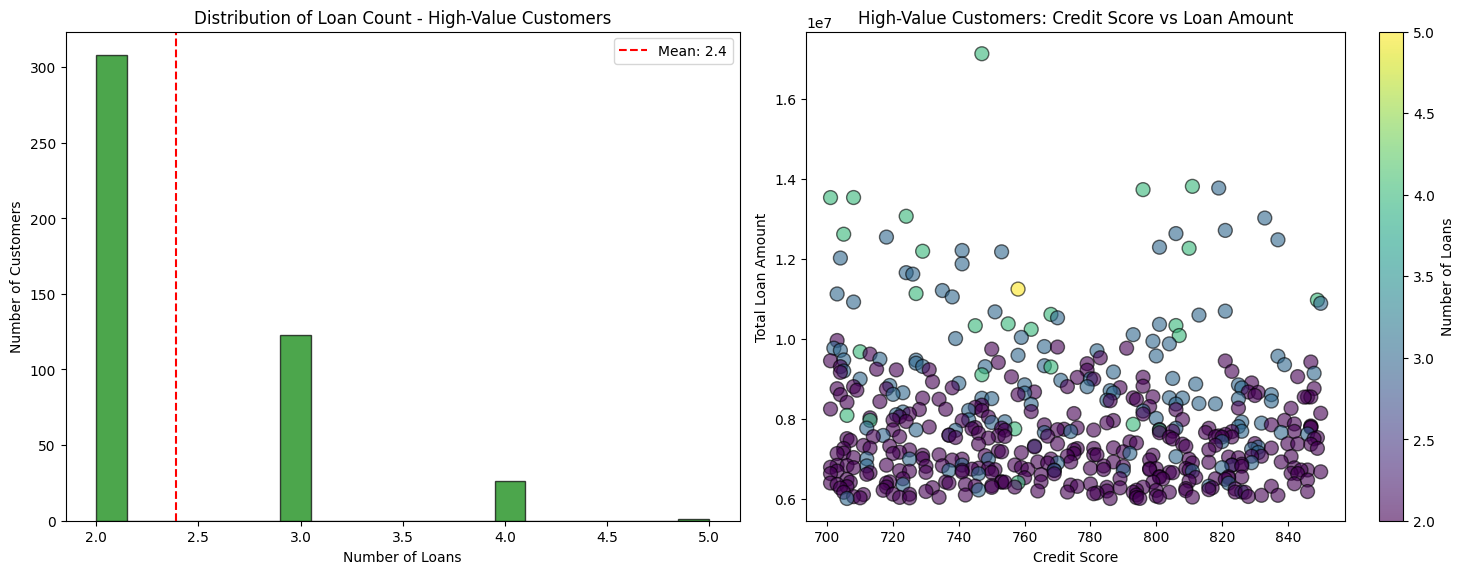

In [53]:
# Identify high-value customers with consistent repayment
high_value_customers = customer_behavior[
    (customer_behavior["Repayment_Category"] == "Always On Time") &
    (customer_behavior["Total_Loan_Amount"] > customer_behavior["Total_Loan_Amount"].quantile(0.75)) &
    (customer_behavior["Credit_Score"] > 700)
].sort_values("Total_Loan_Amount", ascending=False)

print(f"\nHigh-Value Customers with Consistent Repayment: {len(high_value_customers)}")
print("\nTop 10 High-Value Customers:")
print(high_value_customers[["Customer_ID", "Total_Loans", "Total_Loan_Amount", "Credit_Score"]].head(10))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Distribution of high-value customers by loan count
axes[0].hist(high_value_customers["Total_Loans"], bins=20, color="green", edgecolor="black", alpha=0.7)
axes[0].set_title("Distribution of Loan Count - High-Value Customers")
axes[0].set_xlabel("Number of Loans")
axes[0].set_ylabel("Number of Customers")
axes[0].axvline(high_value_customers["Total_Loans"].mean(), color="red", 
                linestyle="--", label=f"Mean: {high_value_customers['Total_Loans'].mean():.1f}")
axes[0].legend()

# Credit score vs Total loan amount for high-value customers
scatter = axes[1].scatter(high_value_customers["Credit_Score"], 
                          high_value_customers["Total_Loan_Amount"],
                          c=high_value_customers["Total_Loans"], 
                          cmap="viridis", s=100, alpha=0.6, edgecolors="black")
axes[1].set_title("High-Value Customers: Credit Score vs Loan Amount")
axes[1].set_xlabel("Credit Score")
axes[1].set_ylabel("Total Loan Amount")
plt.colorbar(scatter, ax=axes[1], label="Number of Loans")

plt.tight_layout()
plt.show()

# 18. Risk Assessment

#### 18.1 Develop Risk Matrix for Loan Products Based on Default_Amount, Loan_Term, Interest_Rate

Loan Product Risk Matrix:
  Collateral_Details  Total_Loans  Default_Count  Default_Rate  \
0           Property        60417           6017      9.959117   
1            Vehicle        30044           2983      9.928771   

   Avg_Default_Amount  Avg_Loan_Amount  Avg_Interest_Rate  Avg_Loan_Term  \
0         5241.472549     2.515595e+06          11.005028      36.121754   
1         5329.973040     2.518775e+06          11.003562      35.960857   

   Risk_Score Risk_Level  
0    4.949199        Low  
1    4.934013        Low  


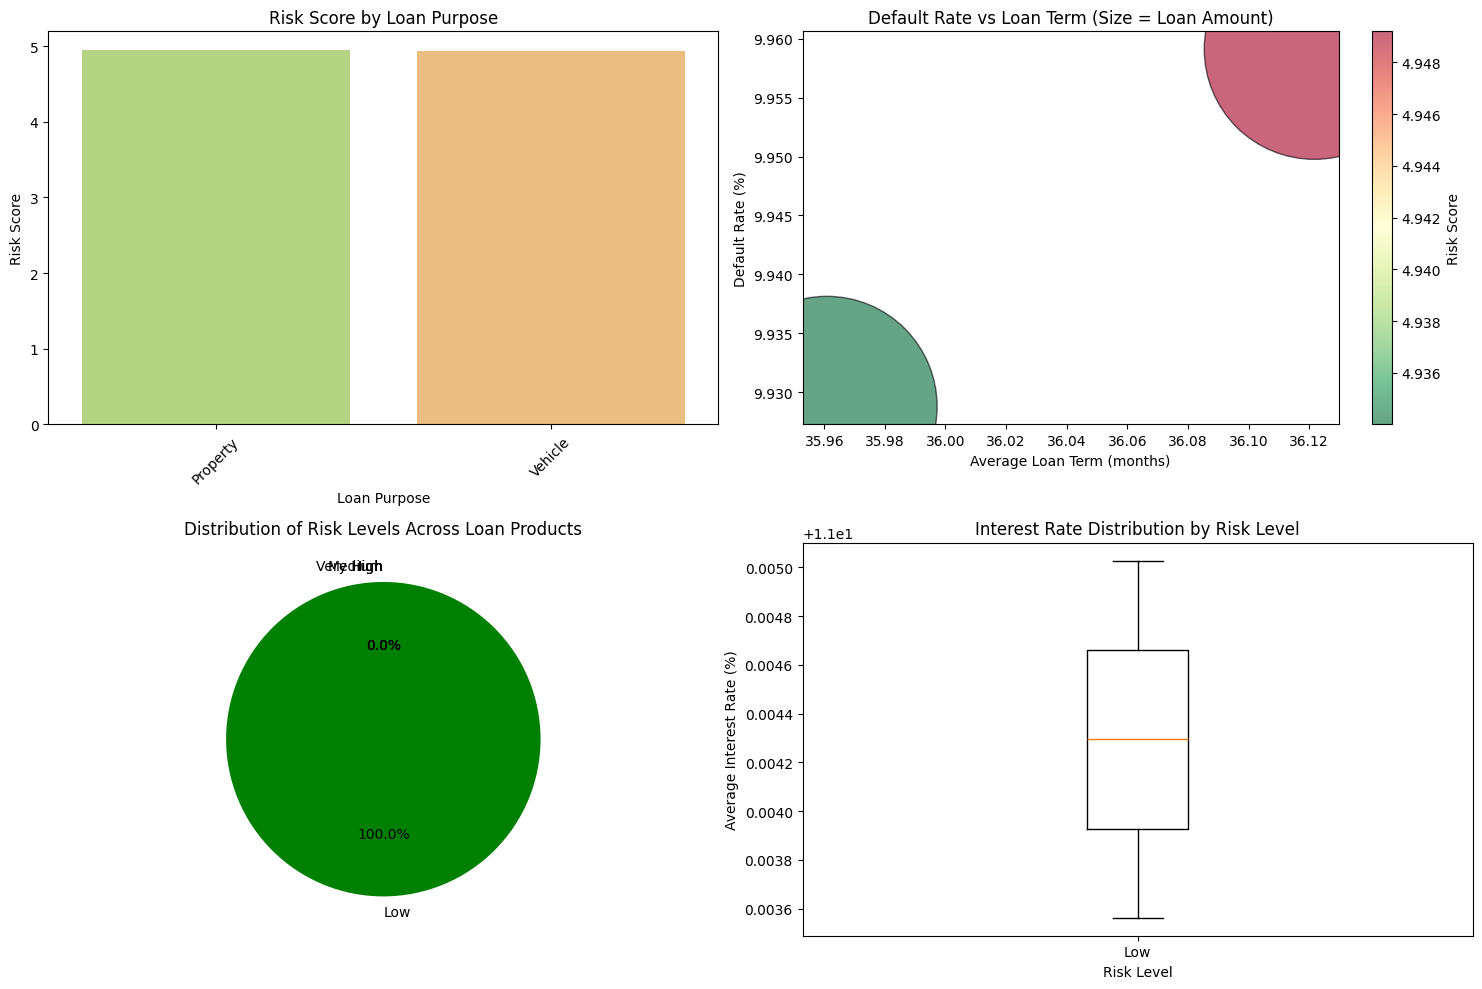

In [54]:
# Risk matrix for loan products
risk_data = loans.merge(
    defaults[["Loan_ID", "Default_Amount"]], 
    on="Loan_ID", 
    how="left"
)
risk_data["Has_Default"] = risk_data["Default_Amount"].notna().astype(int)
risk_data["Default_Amount"].fillna(0, inplace=True)

# Risk metrics by loan purpose
if "Collateral_Details" in loans.columns:
    risk_matrix = risk_data.groupby("Collateral_Details").agg({
        "Loan_ID": "count",
        "Has_Default": ["sum", "mean"],
        "Default_Amount": "mean",
        "Loan_Amount": "mean",
        "Interest_Rate": "mean",
        "Loan_Term": "mean"
    }).reset_index()
    
    risk_matrix.columns = ["Collateral_Details", "Total_Loans", "Default_Count", "Default_Rate", 
                           "Avg_Default_Amount", "Avg_Loan_Amount", "Avg_Interest_Rate", "Avg_Loan_Term"]
    risk_matrix["Default_Rate"] = risk_matrix["Default_Rate"] * 100
    
    # Calculate risk score (weighted combination)
    risk_matrix["Risk_Score"] = (
        risk_matrix["Default_Rate"] * 0.4 +  # 40% weight on default rate
        (risk_matrix["Avg_Default_Amount"] / risk_matrix["Avg_Loan_Amount"]) * 100 * 0.3 +  # 30% on default severity
        (risk_matrix["Avg_Loan_Term"] / 12) * 0.3  # 30% on loan term (longer = riskier)
    )
    
    # Rank by risk
    risk_matrix = risk_matrix.sort_values("Risk_Score", ascending=False)
    risk_matrix["Risk_Level"] = pd.cut(risk_matrix["Risk_Score"], 
                                        bins=[0, 20, 40, 60, 100],
                                        labels=["Low", "Medium", "High", "Very High"])
    
    print("Loan Product Risk Matrix:")
    print(risk_matrix)
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Risk score by loan purpose
    sns.barplot(x="Collateral_Details", y="Risk_Score", data=risk_matrix, 
                hue="Collateral_Details", palette="RdYlGn_r", ax=axes[0,0], legend=False)
    axes[0,0].set_title("Risk Score by Loan Purpose")
    axes[0,0].set_xlabel("Loan Purpose")
    axes[0,0].set_ylabel("Risk Score")
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Default rate vs loan term scatter
    scatter = axes[0,1].scatter(risk_matrix["Avg_Loan_Term"], risk_matrix["Default_Rate"],
                                s=risk_matrix["Avg_Loan_Amount"]/100,
                                c=risk_matrix["Risk_Score"], cmap="RdYlGn_r",
                                alpha=0.6, edgecolors="black")
    axes[0,1].set_title("Default Rate vs Loan Term (Size = Loan Amount)")
    axes[0,1].set_xlabel("Average Loan Term (months)")
    axes[0,1].set_ylabel("Default Rate (%)")
    plt.colorbar(scatter, ax=axes[0,1], label="Risk Score")
    
    # Risk level distribution
    risk_level_counts = risk_matrix["Risk_Level"].value_counts()
    axes[1,0].pie(risk_level_counts.values, labels=risk_level_counts.index,
                  autopct='%1.1f%%', colors=["green", "yellow", "orange", "red"],
                  startangle=90)
    axes[1,0].set_title("Distribution of Risk Levels Across Loan Products")
    
    # Interest rate by risk level
    axes[1,1].boxplot([risk_matrix[risk_matrix["Risk_Level"] == level]["Avg_Interest_Rate"] 
                        for level in ["Low", "Medium", "High", "Very High"] 
                        if level in risk_matrix["Risk_Level"].values],
                       tick_labels=[level for level in ["Low", "Medium", "High", "Very High"] 
                               if level in risk_matrix["Risk_Level"].values])
    axes[1,1].set_title("Interest Rate Distribution by Risk Level")
    axes[1,1].set_xlabel("Risk Level")
    axes[1,1].set_ylabel("Average Interest Rate (%)")
    
    plt.tight_layout()
    plt.show()

#### 18.2 Rank Loan Types by Risk Level and Suggest Mitigation Strategies


Loan Types Ranked by Risk (Highest to Lowest):
  Collateral_Details  Risk_Score Risk_Level  Default_Rate  Avg_Interest_Rate
0           Property    4.949199        Low      9.959117          11.005028
1            Vehicle    4.934013        Low      9.928771          11.003562


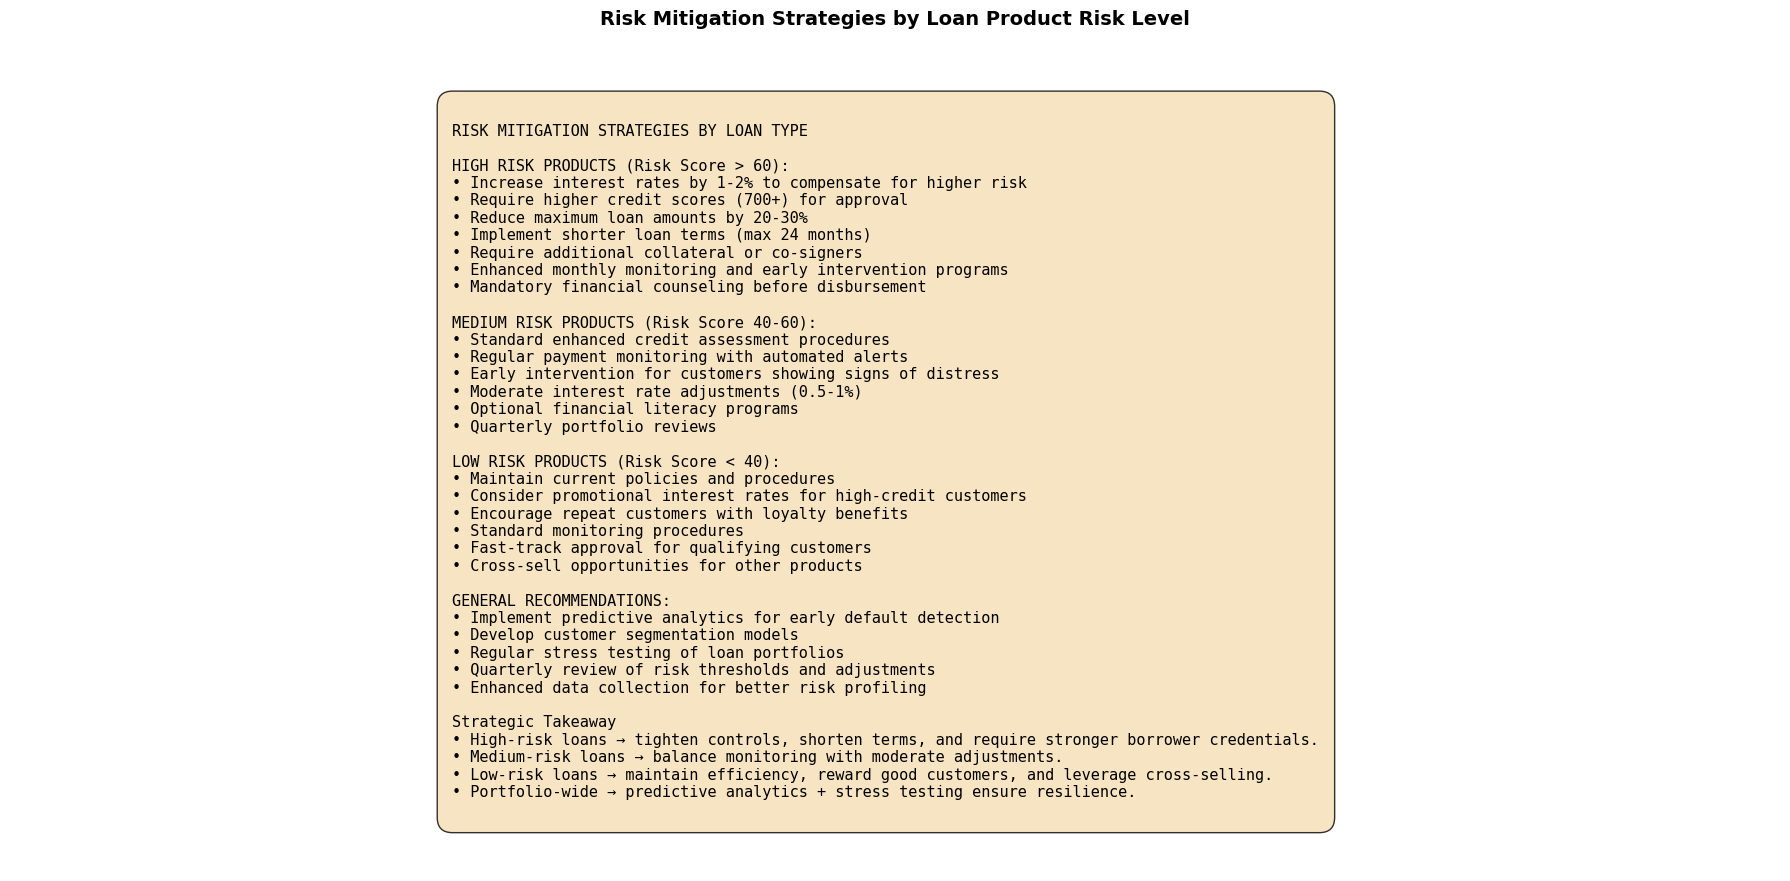

In [55]:
# Rank loan types by risk and provide mitigation strategies
print("\nLoan Types Ranked by Risk (Highest to Lowest):")
print(risk_matrix[["Collateral_Details", "Risk_Score", "Risk_Level", "Default_Rate", "Avg_Interest_Rate"]].head(10))

# Mitigation strategies visualization
fig, ax = plt.subplots(figsize=(18, 9))
ax.axis('off')

mitigation_text = """
RISK MITIGATION STRATEGIES BY LOAN TYPE

HIGH RISK PRODUCTS (Risk Score > 60):
• Increase interest rates by 1-2% to compensate for higher risk
• Require higher credit scores (700+) for approval
• Reduce maximum loan amounts by 20-30%
• Implement shorter loan terms (max 24 months)
• Require additional collateral or co-signers
• Enhanced monthly monitoring and early intervention programs
• Mandatory financial counseling before disbursement

MEDIUM RISK PRODUCTS (Risk Score 40-60):
• Standard enhanced credit assessment procedures
• Regular payment monitoring with automated alerts
• Early intervention for customers showing signs of distress
• Moderate interest rate adjustments (0.5-1%)
• Optional financial literacy programs
• Quarterly portfolio reviews

LOW RISK PRODUCTS (Risk Score < 40):
• Maintain current policies and procedures
• Consider promotional interest rates for high-credit customers
• Encourage repeat customers with loyalty benefits
• Standard monitoring procedures
• Fast-track approval for qualifying customers
• Cross-sell opportunities for other products

GENERAL RECOMMENDATIONS:
• Implement predictive analytics for early default detection
• Develop customer segmentation models
• Regular stress testing of loan portfolios
• Quarterly review of risk thresholds and adjustments
• Enhanced data collection for better risk profiling

Strategic Takeaway
• High‑risk loans → tighten controls, shorten terms, and require stronger borrower credentials.
• Medium‑risk loans → balance monitoring with moderate adjustments.
• Low‑risk loans → maintain efficiency, reward good customers, and leverage cross‑selling.
• Portfolio‑wide → predictive analytics + stress testing ensure resilience.
"""

ax.text(0.25, 0.5, mitigation_text, fontsize=11, 
        verticalalignment='center', family='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8, pad=1))
ax.set_title("Risk Mitigation Strategies by Loan Product Risk Level", 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

#### 18.3 Analyze High-Risk Customer Segments by Credit Score and Income


High-Risk Customer Segments by Credit Score and Income:
Income_Bracket   <3L  3-6L  6-10L   >10L
Credit_Bracket                          
<600            1567  4632   6236  15409
600-700           81   248    303    765
700-800           85   228    337    778
800-900           38   108    172    439


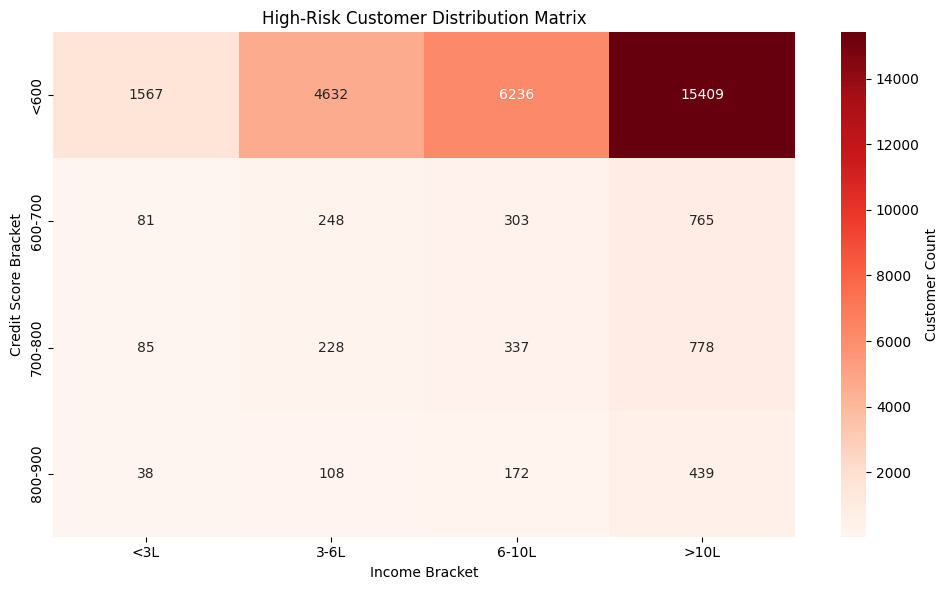


High-Risk Segment Summary:
Total High-Risk Customers: 31426
Percentage of Total Customers: 62.01%
Average Credit Score: 481
Average Default Count: 0.27


In [56]:
# High-risk customer segments
high_risk_segments = customer_behavior[
    (customer_behavior["Credit_Score"] < 600) |
    (customer_behavior["Default_Count"] > 0)
]

high_risk_by_score_income = high_risk_segments.merge(
    customers[["Customer_ID", "Annual_Income"]], 
    on="Customer_ID", 
    how="left"
)

# Create income brackets
high_risk_by_score_income["Income_Bracket"] = pd.cut(
    high_risk_by_score_income["Annual_Income"],
    bins=[0, 300000, 600000, 1000000, float('inf')],
    labels=["<3L", "3-6L", "6-10L", ">10L"]
)

high_risk_by_score_income["Credit_Bracket"] = pd.cut(
    high_risk_by_score_income["Credit_Score"],
    bins=[0, 600, 700, 800, 900],
    labels=["<600", "600-700", "700-800", "800-900"]
)

risk_segment_matrix = high_risk_by_score_income.groupby(
    ["Credit_Bracket", "Income_Bracket"], observed=False
).size().unstack(fill_value=0)

print("\nHigh-Risk Customer Segments by Credit Score and Income:")
print(risk_segment_matrix)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(risk_segment_matrix, annot=True, fmt="d", cmap="Reds", cbar_kws={'label': 'Customer Count'})
plt.title("High-Risk Customer Distribution Matrix")
plt.xlabel("Income Bracket")
plt.ylabel("Credit Score Bracket")
plt.tight_layout()
plt.show()

# Additional analysis
print("\nHigh-Risk Segment Summary:")
print(f"Total High-Risk Customers: {len(high_risk_segments)}")
print(f"Percentage of Total Customers: {(len(high_risk_segments) / len(customer_behavior)) * 100:.2f}%")
print(f"Average Credit Score: {high_risk_segments['Credit_Score'].mean():.0f}")
print(f"Average Default Count: {high_risk_segments['Default_Count'].mean():.2f}")

# 19. Time to Default Analysis

#### 19.1 Calculate Average Time from Loan Disbursement to Default for Overdue Loans

Average Time to Default: 631.38 days (21.0 months)
Median Time to Default: 561.00 days (18.7 months)
Min Time to Default: 1 days
Max Time to Default: 1809 days


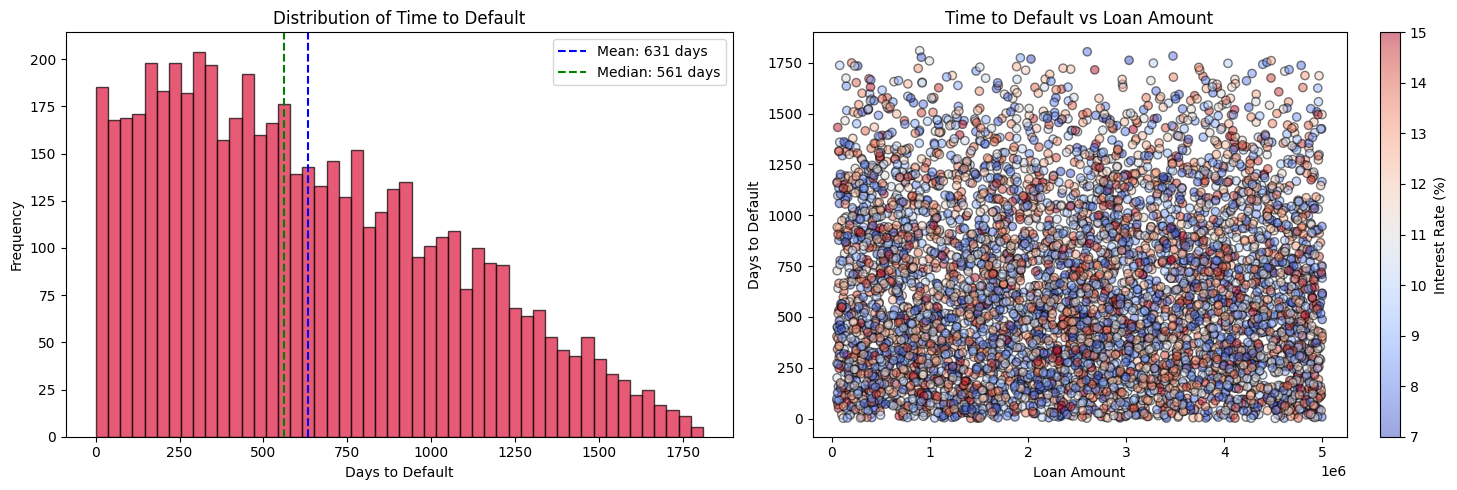

In [57]:
# Time to default analysis
time_to_default = defaults.merge(
    loans[["Loan_ID", "Disbursal_Date", "Customer_ID", "Collateral_Details", "Loan_Amount", "Interest_Rate"]], 
    on="Loan_ID", 
    how="left"
)

# Calculate days to default
time_to_default["Days_to_Default"] = (
    pd.to_datetime(time_to_default["Default_Date"]) - 
    pd.to_datetime(time_to_default["Disbursal_Date"])
).dt.days

# Filter valid entries
time_to_default = time_to_default[time_to_default["Days_to_Default"] > 0]

# Overall statistics
avg_days_to_default = time_to_default["Days_to_Default"].mean()
median_days_to_default = time_to_default["Days_to_Default"].median()

print(f"Average Time to Default: {avg_days_to_default:.2f} days ({avg_days_to_default/30:.1f} months)")
print(f"Median Time to Default: {median_days_to_default:.2f} days ({median_days_to_default/30:.1f} months)")
print(f"Min Time to Default: {time_to_default['Days_to_Default'].min()} days")
print(f"Max Time to Default: {time_to_default['Days_to_Default'].max()} days")

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of time to default
axes[0].hist(time_to_default["Days_to_Default"], bins=50, color="crimson", 
             edgecolor="black", alpha=0.7)
axes[0].axvline(avg_days_to_default, color="blue", linestyle="--", 
                label=f"Mean: {avg_days_to_default:.0f} days")
axes[0].axvline(median_days_to_default, color="green", linestyle="--", 
                label=f"Median: {median_days_to_default:.0f} days")
axes[0].set_title("Distribution of Time to Default")
axes[0].set_xlabel("Days to Default")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# Time to default vs loan amount scatter
scatter = axes[1].scatter(time_to_default["Loan_Amount"], 
                          time_to_default["Days_to_Default"],
                          c=time_to_default["Interest_Rate"],
                          cmap="coolwarm", alpha=0.5, edgecolors="black")
axes[1].set_title("Time to Default vs Loan Amount")
axes[1].set_xlabel("Loan Amount")
axes[1].set_ylabel("Days to Default")
plt.colorbar(scatter, ax=axes[1], label="Interest Rate (%)")

plt.tight_layout()
plt.show()

#### 19.2 Identify Loan Purposes with Shortest Time to Default


Time to Default by Loan Purpose:
  Collateral_Details    Avg_Days  Median_Days  Default_Count
1            Vehicle  623.817886        546.0           1845
0           Property  635.114209        568.0           3730


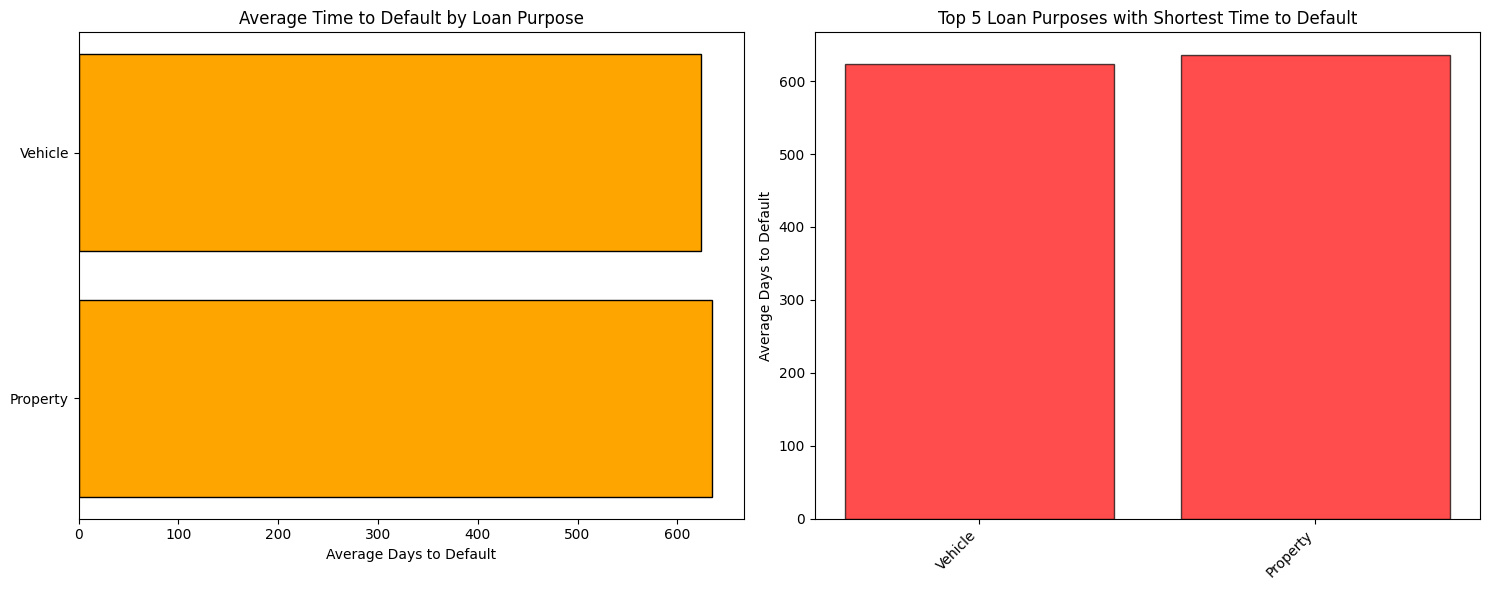

In [58]:
# Time to default by loan purpose
if "Collateral_Details" in time_to_default.columns:
    purpose_time_to_default = time_to_default.groupby("Collateral_Details")["Days_to_Default"].agg([
        "mean", "median", "count"
    ]).reset_index()
    purpose_time_to_default.columns = ["Collateral_Details", "Avg_Days", "Median_Days", "Default_Count"]
    purpose_time_to_default = purpose_time_to_default.sort_values("Avg_Days")
    
    print("\nTime to Default by Loan Purpose:")
    print(purpose_time_to_default)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Average time to default by loan purpose
    axes[0].barh(purpose_time_to_default["Collateral_Details"], 
                 purpose_time_to_default["Avg_Days"],
                 color="orange", edgecolor="black")
    axes[0].set_title("Average Time to Default by Loan Purpose")
    axes[0].set_xlabel("Average Days to Default")
    axes[0].invert_yaxis()
    
    # Shortest time to default purposes
    shortest_default = purpose_time_to_default.head(5)
    axes[1].bar(range(len(shortest_default)), shortest_default["Avg_Days"],
                color="red", edgecolor="black", alpha=0.7)
    axes[1].set_xticks(range(len(shortest_default)))
    axes[1].set_xticklabels(shortest_default["Collateral_Details"], rotation=45, ha="right")
    axes[1].set_title("Top 5 Loan Purposes with Shortest Time to Default")
    axes[1].set_ylabel("Average Days to Default")
    
    plt.tight_layout()
    plt.show()

#### 19.3 Compare Time to Default Across Customer Demographics


Time to Default by Credit Score Bracket:
  Credit_Bracket        mean  median  count
0           <600  630.688388   565.0   2394
1        600-700  642.518710   583.0    775
2        700-800  622.784163   546.0    783
3        800-900  617.195599   526.0    409

Time to Default by Income Bracket:
  Income_Bracket        mean  median  count
0            <3L  616.798319   571.0    238
1           3-6L  622.345021   552.0    713
2          6-10L  643.844169   576.0    969
3           >10L  628.217124   561.0   2441


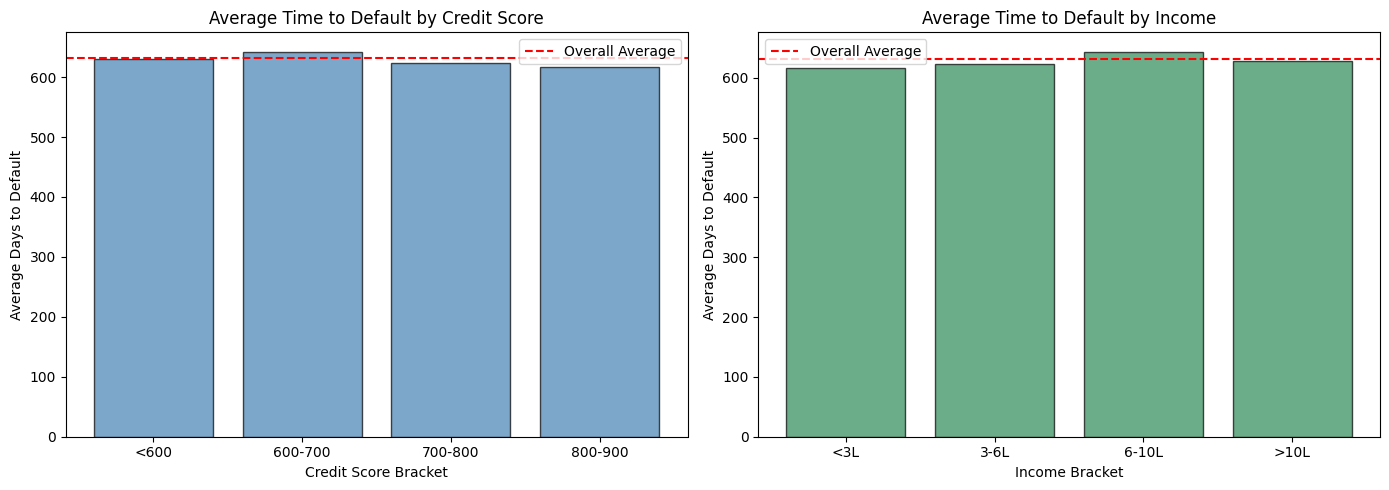

In [59]:
# Time to default by customer demographics
ttd_demographics = time_to_default.rename(columns={"Customer_ID_x": "Customer_ID"})

ttd_demographics = ttd_demographics.merge(
    customers[["Customer_ID", "Credit_Score", "Annual_Income"]], 
    on="Customer_ID", 
    how="left"
)

# By credit score bracket
ttd_demographics["Credit_Bracket"] = pd.cut(
    ttd_demographics["Credit_Score"],
    bins=[0, 600, 700, 800, 900],
    labels=["<600", "600-700", "700-800", "800-900"]
)

credit_ttd = ttd_demographics.groupby(
    "Credit_Bracket", observed=False
)["Days_to_Default"].agg([
    "mean", "median", "count"
]).reset_index()

print("\nTime to Default by Credit Score Bracket:")
print(credit_ttd)

# By income bracket
ttd_demographics["Income_Bracket"] = pd.cut(
    ttd_demographics["Annual_Income"],
    bins=[0, 300000, 600000, 1000000, float('inf')],
    labels=["<3L", "3-6L", "6-10L", ">10L"]
)

income_ttd = ttd_demographics.groupby(
    "Income_Bracket", observed=False
)["Days_to_Default"].agg([
    "mean", "median", "count"
]).reset_index()

print("\nTime to Default by Income Bracket:")
print(income_ttd)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(credit_ttd["Credit_Bracket"].astype(str), credit_ttd["mean"], 
            color="steelblue", edgecolor="black", alpha=0.7)
axes[0].set_title("Average Time to Default by Credit Score")
axes[0].set_xlabel("Credit Score Bracket")
axes[0].set_ylabel("Average Days to Default")
axes[0].axhline(avg_days_to_default, color="red", linestyle="--", label="Overall Average")
axes[0].legend()

axes[1].bar(income_ttd["Income_Bracket"].astype(str), income_ttd["mean"], 
            color="seagreen", edgecolor="black", alpha=0.7)
axes[1].set_title("Average Time to Default by Income")
axes[1].set_xlabel("Income Bracket")
axes[1].set_ylabel("Average Days to Default")
axes[1].axhline(avg_days_to_default, color="red", linestyle="--", label="Overall Average")
axes[1].legend()

plt.tight_layout()
plt.show()

# 20. Transaction Pattern Analysis

#### 20.1 Identify Customers with Irregular Repayment Patterns

Total Loans with Irregular Payment Patterns: 84373
Percentage of Irregular Patterns: 99.99%

Regular vs Irregular Payment Statistics:
   Is_Irregular  Count   Avg_Overdue  Avg_Deviation
0         False      8  14166.625000       1.625000
1          True  84373  12729.496225      33.156424


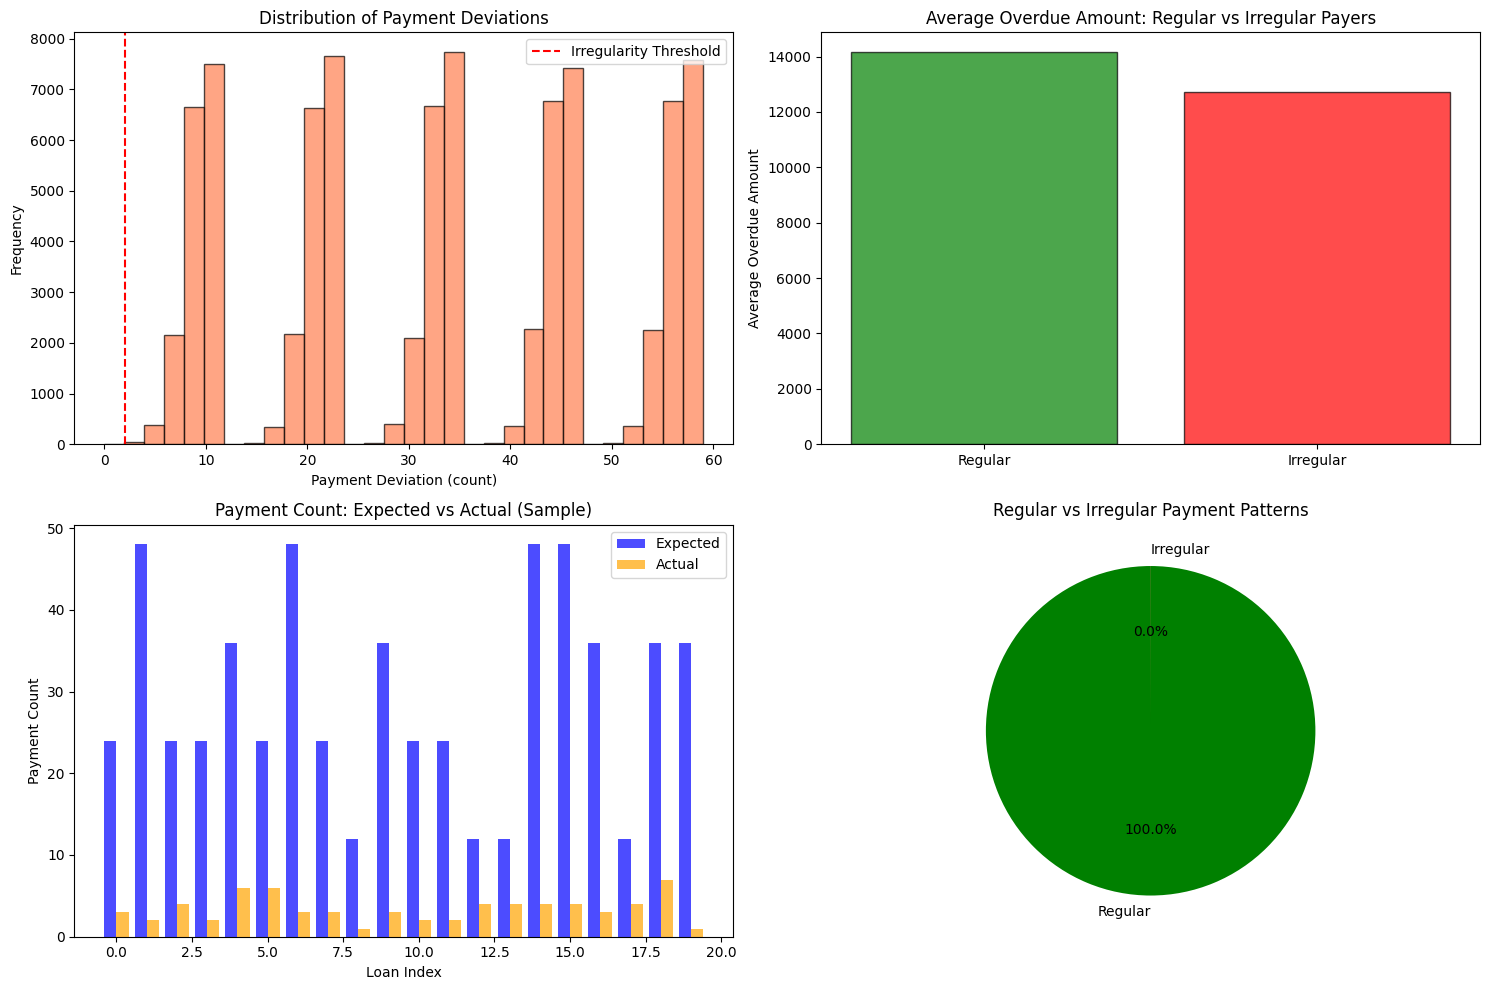

In [60]:
# Transaction pattern analysis
transactions["Transaction_Date"] = pd.to_datetime(transactions["Transaction_Date"], errors="coerce")

# EMI payment patterns
emi_payments = transactions[transactions["Payment_Type"] == "EMI"].copy()

# Count payments per loan
payments_per_loan = emi_payments.groupby("Loan_ID").agg({
    "Transaction_ID": "count",
    "Amount": ["mean", "std"]
}).reset_index()
payments_per_loan.columns = ["Loan_ID", "Payment_Count", "Avg_Payment", "Payment_Std"]

# Merge with loan data
payment_patterns = payments_per_loan.merge(
    loans[["Loan_ID", "Loan_Term", "EMI_Amount", "Overdue_Amount"]], 
    on="Loan_ID", 
    how="left"
)

# Identify irregular patterns
payment_patterns["Expected_Payments"] = payment_patterns["Loan_Term"]
payment_patterns["Payment_Deviation"] = abs(payment_patterns["Payment_Count"] - payment_patterns["Expected_Payments"])
payment_patterns["Is_Irregular"] = payment_patterns["Payment_Deviation"] > 2  # More than 2 missed/extra payments

irregular_count = payment_patterns["Is_Irregular"].sum()
print(f"Total Loans with Irregular Payment Patterns: {irregular_count}")
print(f"Percentage of Irregular Patterns: {(irregular_count / len(payment_patterns)) * 100:.2f}%")

# Characteristics of irregular payers
irregular_stats = payment_patterns.groupby("Is_Irregular").agg({
    "Loan_ID": "count",
    "Overdue_Amount": "mean",
    "Payment_Deviation": "mean"
}).reset_index()
irregular_stats.columns = ["Is_Irregular", "Count", "Avg_Overdue", "Avg_Deviation"]

print("\nRegular vs Irregular Payment Statistics:")
print(irregular_stats)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Payment deviation distribution
axes[0,0].hist(payment_patterns["Payment_Deviation"], bins=30, color="coral", 
               edgecolor="black", alpha=0.7)
axes[0,0].set_title("Distribution of Payment Deviations")
axes[0,0].set_xlabel("Payment Deviation (count)")
axes[0,0].set_ylabel("Frequency")
axes[0,0].axvline(2, color="red", linestyle="--", label="Irregularity Threshold")
axes[0,0].legend()

# Overdue amount: Regular vs Irregular
overdue_comparison = payment_patterns.groupby("Is_Irregular")["Overdue_Amount"].mean()
axes[0,1].bar(["Regular", "Irregular"], overdue_comparison.values, 
              color=["green", "red"], edgecolor="black", alpha=0.7)
axes[0,1].set_title("Average Overdue Amount: Regular vs Irregular Payers")
axes[0,1].set_ylabel("Average Overdue Amount")

# Payment count vs expected
sample_data = payment_patterns.head(20)
x = range(len(sample_data))
axes[1,0].bar([i - 0.2 for i in x], sample_data["Expected_Payments"], 
              width=0.4, label="Expected", color="blue", alpha=0.7)
axes[1,0].bar([i + 0.2 for i in x], sample_data["Payment_Count"], 
              width=0.4, label="Actual", color="orange", alpha=0.7)
axes[1,0].set_title("Payment Count: Expected vs Actual (Sample)")
axes[1,0].set_xlabel("Loan Index")
axes[1,0].set_ylabel("Payment Count")
axes[1,0].legend()

# Irregular pattern count
irregular_pie = payment_patterns["Is_Irregular"].value_counts()
axes[1,1].pie(irregular_pie.values, labels=["Regular", "Irregular"], 
              autopct='%1.1f%%', colors=["green", "red"], startangle=90)
axes[1,1].set_title("Regular vs Irregular Payment Patterns")

plt.tight_layout()
plt.show()

#### 20.2 Analyze Penalty Payments as Proportion of Total Transactions


Penalty Payment Statistics:
Average Penalty Proportion: 53.19%
Max Penalty Proportion: 100.00%
Total Penalty Transactions: 247844


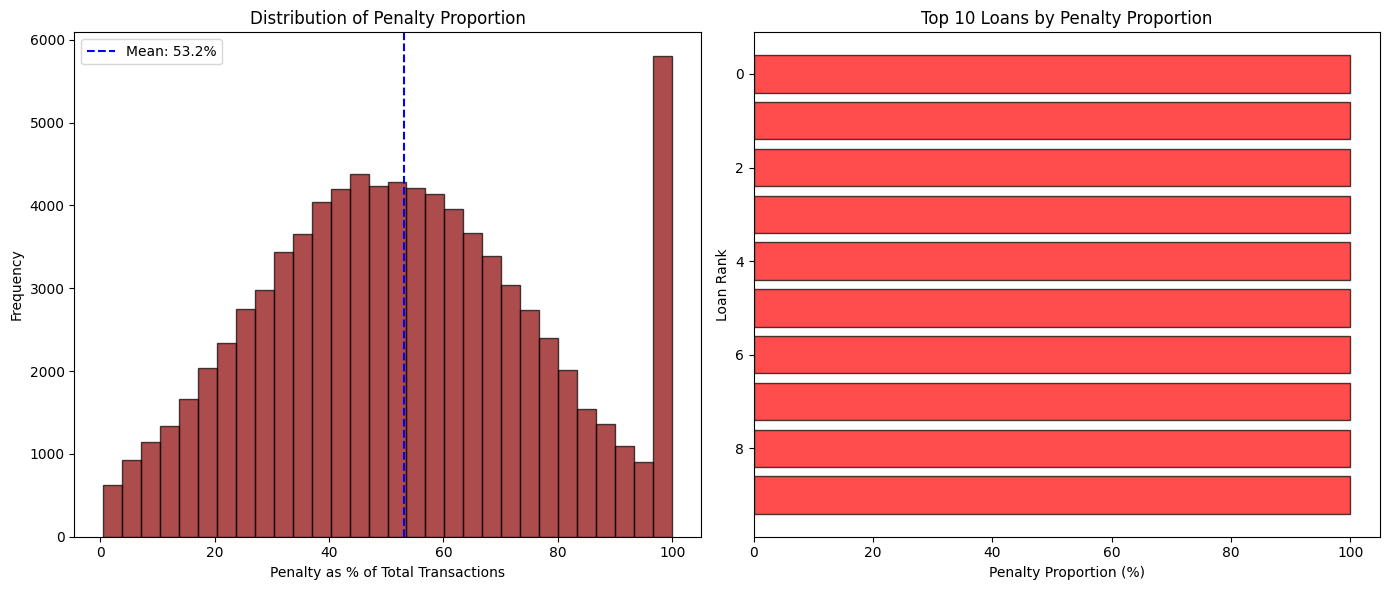

In [61]:
# Penalty payments analysis
penalty_transactions = transactions[transactions["Payment_Type"] == "Penalty"].copy()

# Penalty as proportion of total transactions
penalty_proportion = penalty_transactions.groupby("Loan_ID").agg({
    "Amount": "sum"
}).reset_index()
penalty_proportion.columns = ["Loan_ID", "Total_Penalty"]

all_transactions_sum = transactions.groupby("Loan_ID")["Amount"].sum().reset_index()
all_transactions_sum.columns = ["Loan_ID", "Total_Transactions"]

penalty_analysis = penalty_proportion.merge(all_transactions_sum, on="Loan_ID", how="left")
penalty_analysis["Penalty_Proportion"] = (penalty_analysis["Total_Penalty"] / penalty_analysis["Total_Transactions"]) * 100

print("\nPenalty Payment Statistics:")
print(f"Average Penalty Proportion: {penalty_analysis['Penalty_Proportion'].mean():.2f}%")
print(f"Max Penalty Proportion: {penalty_analysis['Penalty_Proportion'].max():.2f}%")
print(f"Total Penalty Transactions: {len(penalty_transactions)}")

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Penalty proportion distribution
axes[0].hist(penalty_analysis["Penalty_Proportion"], bins=30, 
             color="darkred", edgecolor="black", alpha=0.7)
axes[0].set_title("Distribution of Penalty Proportion")
axes[0].set_xlabel("Penalty as % of Total Transactions")
axes[0].set_ylabel("Frequency")
axes[0].axvline(penalty_analysis["Penalty_Proportion"].mean(), color="blue", 
                linestyle="--", label=f"Mean: {penalty_analysis['Penalty_Proportion'].mean():.1f}%")
axes[0].legend()

# Top loans by penalty proportion
top_penalty = penalty_analysis.nlargest(10, "Penalty_Proportion")
axes[1].barh(range(len(top_penalty)), top_penalty["Penalty_Proportion"], 
             color="red", edgecolor="black", alpha=0.7)
axes[1].set_title("Top 10 Loans by Penalty Proportion")
axes[1].set_xlabel("Penalty Proportion (%)")
axes[1].set_ylabel("Loan Rank")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

#### 20.3 Compare Transaction Amounts for Overdue vs Non-Overdue Loans


Transaction Amount Comparison:
Average Transaction (No Overdue): $25464.36
Average Transaction (Has Overdue): $25536.39


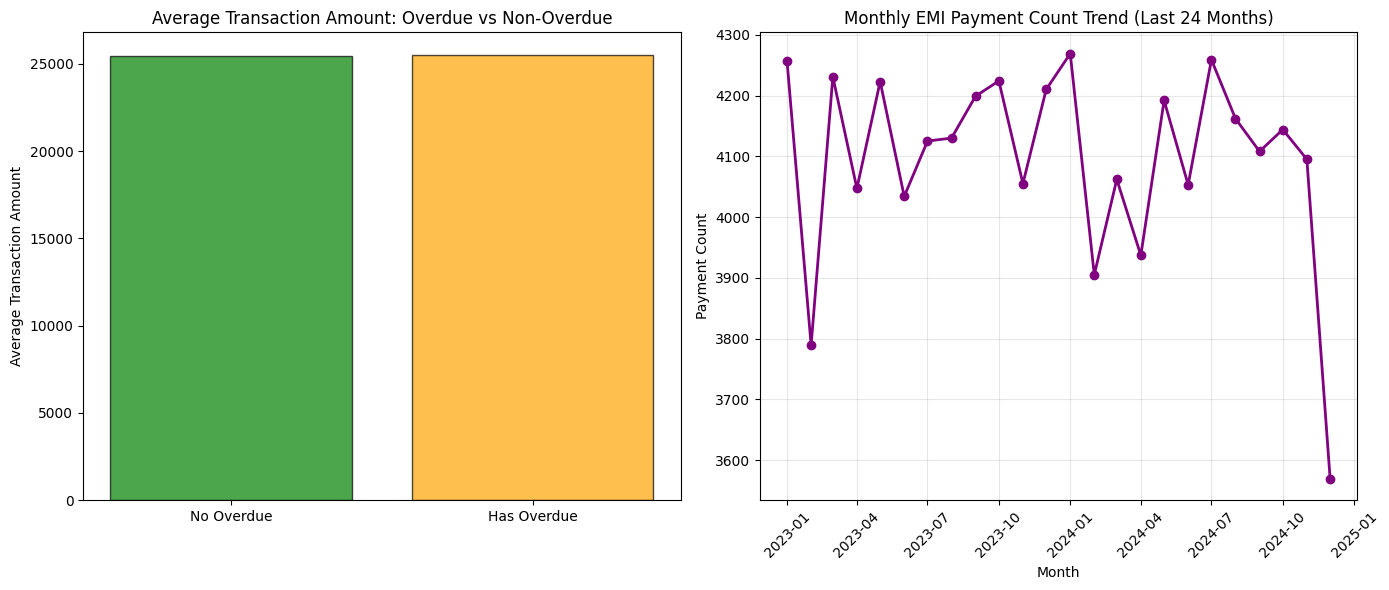


TRANSACTION PATTERN ANALYSIS SUMMARY
Total Loans Analyzed: 84381
Irregular Payment Patterns: 84373 (100.0%)
Average Payment Deviation: 33.15 payments
Total Penalty Transactions: 247844
Average Penalty Proportion: 53.19%

Key Findings:
- Irregular payers have 12729.50 average overdue
- Regular payers have 14166.62 average overdue


In [62]:
# Transaction amounts: Overdue vs Non-Overdue loans
overdue_vs_nonoverdue = loans.merge(
    transactions[transactions["Payment_Type"] == "EMI"], 
    on="Loan_ID", 
    how="left"
)
overdue_vs_nonoverdue["Has_Overdue"] = (overdue_vs_nonoverdue["Overdue_Amount"] > 0).astype(int)

transaction_comparison = overdue_vs_nonoverdue.groupby("Has_Overdue")["Amount"].mean()

print("\nTransaction Amount Comparison:")
print(f"Average Transaction (No Overdue): ${transaction_comparison.get(0, 0):.2f}")
print(f"Average Transaction (Has Overdue): ${transaction_comparison.get(1, 0):.2f}")

# Monthly payment consistency
emi_payments["Month"] = emi_payments["Transaction_Date"].dt.to_period("M")
monthly_payment_volume = emi_payments.groupby("Month").agg({
    "Amount": ["sum", "count"]
}).reset_index()
monthly_payment_volume.columns = ["Month", "Total_Amount", "Payment_Count"]
monthly_payment_volume["Month"] = monthly_payment_volume["Month"].dt.to_timestamp()

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Transaction amount comparison
axes[0].bar(["No Overdue", "Has Overdue"], transaction_comparison.values, 
            color=["green", "orange"], edgecolor="black", alpha=0.7)
axes[0].set_title("Average Transaction Amount: Overdue vs Non-Overdue")
axes[0].set_ylabel("Average Transaction Amount")

# Monthly payment consistency (last 24 months)
recent_payments = monthly_payment_volume.tail(24)
axes[1].plot(recent_payments["Month"], recent_payments["Payment_Count"], 
             marker="o", color="purple", linewidth=2)
axes[1].set_title("Monthly EMI Payment Count Trend (Last 24 Months)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Payment Count")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary insights
print("\n" + "="*60)
print("TRANSACTION PATTERN ANALYSIS SUMMARY")
print("="*60)
print(f"Total Loans Analyzed: {len(payment_patterns)}")
print(f"Irregular Payment Patterns: {irregular_count} ({(irregular_count/len(payment_patterns))*100:.1f}%)")
print(f"Average Payment Deviation: {payment_patterns['Payment_Deviation'].mean():.2f} payments")
print(f"Total Penalty Transactions: {len(penalty_transactions)}")
print(f"Average Penalty Proportion: {penalty_analysis['Penalty_Proportion'].mean():.2f}%")
print(f"\nKey Findings:")
if len(irregular_stats[irregular_stats['Is_Irregular']==True]) > 0:
    print(f"- Irregular payers have {irregular_stats[irregular_stats['Is_Irregular']==True]['Avg_Overdue'].values[0]:.2f} average overdue")
if len(irregular_stats[irregular_stats['Is_Irregular']==False]) > 0:
    print(f"- Regular payers have {irregular_stats[irregular_stats['Is_Irregular']==False]['Avg_Overdue'].values[0]:.2f} average overdue")
print("="*60)